In [9]:
from triqs.operators import *
from triqs_cthyb import Solver

# from triqs.gf import  MeshImTime, MeshReFreq, iOmega_n, inverse, GfLegendre, MeshImFreq, Gf, GfImFreq, GfImTime, Fourier
from triqs.gf import *
from triqs.gf.descriptors import MatsubaraToLegendre
# from triqs.plot.mpl_interface import plt

from h5 import *
from functools import partial
from multiprocessing import Pool, Manager
import numpy as np

import matplotlib.pyplot as plt
from  tqdm import tqdm
import sys

import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


In [10]:
sys.path.append("./src")
%load_ext autoreload
%autoreload 2
import DataBase
import ml_model
import Sample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare dataset

In [12]:

beta = [5., 20.]
U = [1.0, 5.0]
n_entries = 500
filename ='./data/databaseV11.h5'

DB_get = DataBase.db_DMFT(beta, U, n_entries, filename)

n_cycles=4000
length_cycle=1000
n_warmup_cycles=5000

DB_get.solve_db(n_cycles,
            length_cycle,
            n_warmup_cycles, n_workers=8)
DB_get.save_db()

model loaded from ./models/AUTOmodel_v4


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.0154042*c_dag('down',0)*c('down',0) + 0.0154042*c_dag('up',0)*c('up',0) + 4.63538*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.00985512*c_dag('down',0)*c('down',0) + -0.00985512*c_dag('up',0)*c('up',0) + 4.49304*c_dag('dow

  0%|          | 1/500 [00:17<2:27:31, 17.74s/it]

13:26:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.011465  
Average order         | 0.00625716
Average sign          | 0.00604916
G_l measure           | 0.0195713 
G_tau measure         | 0.0103794 
Total measure time    | 0.053722  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.141605
  Move  Insert Delta_up: 0.142022
  Move  Insert Delta_down: 0.14119
Move set Remove two operators: 0.140944
  Move  Remove Delta_up: 0.140609
  Move  Remove Delta_down: 0.141281
Move set Insert four operators: 0.025383
  Move  Insert Delta_up_up: 0.0290009
  Move  Insert Delta_up_down: 0.0219328
  Move  Insert Delta_down_up: 0.0214021
  Move  Insert Delta_down_down: 0.0292035
Move set Remove four operators: 0.0257197
  Move  Remove Delta_up_up: 0.0299279
  Move  Remove Delta_up_down: 0.0218746
  Move  Remo

  1%|          | 3/500 [00:19<42:23,  5.12s/it]  

13:26:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104659 
Average order         | 0.0062296 
Average sign          | 0.00607269
G_l measure           | 0.0293816 
G_tau measure         | 0.0121985 
Total measure time    | 0.0643483 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.116883
  Move  Insert Delta_up: 0.116777
  Move  Insert Delta_down: 0.116988
Move set Remove two operators: 0.117046
  Move  Remove Delta_up: 0.116852
  Move  Remove Delta_down: 0.11724
Move set Insert four operators: 0.0195648
  Move  Insert Delta_up_up: 0.0229764
  Move  Insert Delta_up_down: 0.0165316
  Move  Insert Delta_down_up: 0.0160446
  Move  Insert Delta_down_down: 0.022733
Move set Remove four operators: 0.0195276
  Move  Remove Delta_up_up: 0.0232215
  Move  Remove Delta_up_down: 0.0160082
  Move  Remo

  1%|          | 5/500 [00:20<24:05,  2.92s/it]

13:26:54 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103075 
Average order         | 0.006176  
Average sign          | 0.00603549
G_l measure           | 0.0267086 
G_tau measure         | 0.0117416 
Total measure time    | 0.0609692 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.117864
  Move  Insert Delta_up: 0.118328
  Move  Insert Delta_down: 0.117402
Move set Remove two operators: 0.118134
  Move  Remove Delta_up: 0.117688
  Move  Remove Delta_down: 0.11858
Move set Insert four operators: 0.0201353
  Move  Insert Delta_up_up: 0.0231043
  Move  Insert Delta_up_down: 0.0174065
  Move  Insert Delta_down_up: 0.0166136
  Move  Insert Delta_down_down: 0.0234451
Move set Remove four operators: 0.0199721
  Move  Remove Delta_up_up: 0.023668
  Move  Remove Delta_up_down: 0.0168825
  Move  Remo

  2%|▏         | 9/500 [00:30<21:58,  2.68s/it]

13:27:04  51% ETA 00:00:04 cycle 2592 of 5000
13:27:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00994211
Average order         | 0.00602144
Average sign          | 0.00594758
G_l measure           | 0.0128806 
G_tau measure         | 0.00878281
Total measure time    | 0.0435745 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.238671
  Move  Insert Delta_up: 0.238792
  Move  Insert Delta_down: 0.238551
Move set Remove two operators: 0.238901
  Move  Remove Delta_up: 0.238752
  Move  Remove Delta_down: 0.23905
Move set Insert four operators: 0.0568993
  Move  Insert Delta_up_up: 0.0583679
  Move  Insert Delta_up_down: 0.0552138
  Move  Insert Delta_down_up: 0.05468
  Move  Insert Delta_down_down: 0.0593581
Move set Remove four operators: 0.056873
  Move  Remove Delta_up_up: 0.0578393
  Move  

  2%|▏         | 10/500 [00:31<18:18,  2.24s/it]

13:27:05   0% ETA 00:00:11 cycle 42 of 5000
13:27:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103803 
Average order         | 0.00596477
Average sign          | 0.00581008
G_l measure           | 0.010688  
G_tau measure         | 0.00843152
Total measure time    | 0.0412747 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.306799
  Move  Insert Delta_up: 0.306286
  Move  Insert Delta_down: 0.307312
Move set Remove two operators: 0.307131
  Move  Remove Delta_up: 0.306546
  Move  Remove Delta_down: 0.307717
Move set Insert four operators: 0.0692487
  Move  Insert Delta_up_up: 0.0625499
  Move  Insert Delta_up_down: 0.0759198
  Move  Insert Delta_down_up: 0.0755151
  Move  Insert Delta_down_down: 0.0629348
Move set Remove four operators: 0.0688703
  Move  Remove Delta_up_up: 0.0615285
  Move

  2%|▏         | 11/500 [00:35<22:23,  2.75s/it]

13:27:09  98% ETA 00:00:00 cycle 3949 of 4000
13:27:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104923 
Average order         | 0.00608103
Average sign          | 0.00605914
G_l measure           | 0.0161119 
G_tau measure         | 0.00941499
Total measure time    | 0.0481594 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.169829
  Move  Insert Delta_up: 0.169856
  Move  Insert Delta_down: 0.169803
Move set Remove two operators: 0.16952
  Move  Remove Delta_up: 0.169054
  Move  Remove Delta_down: 0.169986
Move set Insert four operators: 0.0337171
  Move  Insert Delta_up_up: 0.0378191
  Move  Insert Delta_up_down: 0.0297229
  Move  Insert Delta_down_up: 0.0296472
  Move  Insert Delta_down_down: 0.0377337
Move set Remove four operators: 0.0338682
  Move  Remove Delta_up_up: 0.038126
  Move

  3%|▎         | 13/500 [00:36<14:50,  1.83s/it]

13:27:10  99% ETA 00:00:00 cycle 3978 of 4000
13:27:10 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00969983
Average order         | 0.00590601
Average sign          | 0.00579087
G_l measure           | 0.0137905 
G_tau measure         | 0.00833012
Total measure time    | 0.0435173 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.208975
  Move  Insert Delta_up: 0.209748
  Move  Insert Delta_down: 0.208206
Move set Remove two operators: 0.20902
  Move  Remove Delta_up: 0.209085
  Move  Remove Delta_down: 0.208954
Move set Insert four operators: 0.0477331
  Move  Insert Delta_up_up: 0.0503175
  Move  Insert Delta_up_down: 0.0453965
  Move  Insert Delta_down_up: 0.0452907
  Move  Insert Delta_down_down: 0.049953
Move set Remove four operators: 0.0475044
  Move  Remove Delta_up_up: 0.0496246
  Move

  3%|▎         | 15/500 [00:38<12:58,  1.60s/it]

13:27:12  18% ETA 00:00:09 cycle 941 of 5000
13:27:12 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00981832
Average order         | 0.00590991
Average sign          | 0.00583692
G_l measure           | 0.022408  
G_tau measure         | 0.0103164 
Total measure time    | 0.0542895 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.130748
  Move  Insert Delta_up: 0.13162
  Move  Insert Delta_down: 0.129879
Move set Remove two operators: 0.130356
  Move  Remove Delta_up: 0.130765
  Move  Remove Delta_down: 0.129948
Move set Insert four operators: 0.0227293
  Move  Insert Delta_up_up: 0.0268729
  Move  Insert Delta_up_down: 0.0188529
  Move  Insert Delta_down_up: 0.0186617
  Move  Insert Delta_down_down: 0.0265452
Move set Remove four operators: 0.0228689
  Move  Remove Delta_up_up: 0.0270648
  Move

  3%|▎         | 16/500 [00:39<12:32,  1.55s/it]

13:27:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0109011 
Average order         | 0.00610023
Average sign          | 0.00604305
G_l measure           | 0.0222784 
G_tau measure         | 0.010168  
Total measure time    | 0.0554908 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.182794
  Move  Insert Delta_up: 0.183594
  Move  Insert Delta_down: 0.181998
Move set Remove two operators: 0.183298
  Move  Remove Delta_up: 0.18327
  Move  Remove Delta_down: 0.183326
Move set Insert four operators: 0.0433413
  Move  Insert Delta_up_up: 0.0440228
  Move  Insert Delta_up_down: 0.0430197
  Move  Insert Delta_down_up: 0.0416827
  Move  Insert Delta_down_down: 0.0446452
Move set Remove four operators: 0.0429458
  Move  Remove Delta_up_up: 0.0440535
  Move  Remove Delta_up_down: 0.0420212
  Move  Rem

  3%|▎         | 17/500 [00:44<17:40,  2.20s/it]

13:27:18 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111595 
Average order         | 0.00649495
Average sign          | 0.00608789
G_l measure           | 0.0130472 
G_tau measure         | 0.00911152
Total measure time    | 0.0459011 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.350744
  Move  Insert Delta_up: 0.350867
  Move  Insert Delta_down: 0.350622
Move set Remove two operators: 0.350669
  Move  Remove Delta_up: 0.349757
  Move  Remove Delta_down: 0.351582
Move set Insert four operators: 0.108639
  Move  Insert Delta_up_up: 0.0807182
  Move  Insert Delta_up_down: 0.136028
  Move  Insert Delta_down_up: 0.136558
  Move  Insert Delta_down_down: 0.0808416
Move set Remove four operators: 0.108628
  Move  Remove Delta_up_up: 0.0807574
  Move  Remove Delta_up_down: 0.136227
  Move  Remove 

  4%|▎         | 18/500 [00:50<24:19,  3.03s/it]

13:27:24 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00998648
Average order         | 0.00609006
Average sign          | 0.00594555
G_l measure           | 0.0135472 
G_tau measure         | 0.00855368
Total measure time    | 0.0441229 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.274396
  Move  Insert Delta_up: 0.274015
  Move  Insert Delta_down: 0.274775
Move set Remove two operators: 0.274453
  Move  Remove Delta_up: 0.273259
  Move  Remove Delta_down: 0.275649
Move set Insert four operators: 0.0739518
  Move  Insert Delta_up_up: 0.0679376
  Move  Insert Delta_up_down: 0.0800606
  Move  Insert Delta_down_up: 0.0800807
  Move  Insert Delta_down_down: 0.0676849
Move set Remove four operators: 0.0738025
  Move  Remove Delta_up_up: 0.0673068
  Move  Remove Delta_up_down: 0.0808734
  Move  Re

  4%|▍         | 19/500 [00:52<22:52,  2.85s/it]

13:27:26  20% ETA 00:00:08 cycle 1032 of 5000
13:27:26  70% ETA 00:00:03 cycle 3535 of 5000
13:27:26 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0106819 
Average order         | 0.00620937
Average sign          | 0.0059911 
G_l measure           | 0.0370413 
G_tau measure         | 0.0130441 
Total measure time    | 0.0729678 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.098745
  Move  Insert Delta_up: 0.098491
  Move  Insert Delta_down: 0.0989981
Move set Remove two operators: 0.0987522
  Move  Remove Delta_up: 0.0982895
  Move  Remove Delta_down: 0.0992156
Move set Insert four operators: 0.0151569
  Move  Insert Delta_up_up: 0.0175056
  Move  Insert Delta_up_down: 0.0127509
  Move  Insert Delta_down_up: 0.0126505
  Move  Insert Delta_down_down: 0.0177311
Move set Remove four operators: 0.

  4%|▍         | 20/500 [00:54<20:57,  2.62s/it]

13:27:28 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0107258 
Average order         | 0.00612314
Average sign          | 0.00608405
G_l measure           | 0.0198721 
G_tau measure         | 0.0100497 
Total measure time    | 0.0528548 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.142625
  Move  Insert Delta_up: 0.142574
  Move  Insert Delta_down: 0.142676
Move set Remove two operators: 0.14336
  Move  Remove Delta_up: 0.142311
  Move  Remove Delta_down: 0.144412
Move set Insert four operators: 0.0272655
  Move  Insert Delta_up_up: 0.0296406
  Move  Insert Delta_up_down: 0.024565
  Move  Insert Delta_down_up: 0.0243917
  Move  Insert Delta_down_down: 0.0304865
Move set Remove four operators: 0.0268693
  Move  Remove Delta_up_up: 0.0301064
  Move  Remove Delta_up_down: 0.0236739
  Move  Remo

  4%|▍         | 22/500 [00:55<13:35,  1.71s/it]

13:27:29  22% ETA 00:00:07 cycle 1116 of 5000
13:27:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0105868 
Average order         | 0.00621337
Average sign          | 0.00619822
G_l measure           | 0.0168767 
G_tau measure         | 0.00976579
Total measure time    | 0.0496409 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.184451
  Move  Insert Delta_up: 0.184579
  Move  Insert Delta_down: 0.184324
Move set Remove two operators: 0.184679
  Move  Remove Delta_up: 0.184087
  Move  Remove Delta_down: 0.185271
Move set Insert four operators: 0.0407549
  Move  Insert Delta_up_up: 0.0426043
  Move  Insert Delta_up_down: 0.0388116
  Move  Insert Delta_down_up: 0.0384525
  Move  Insert Delta_down_down: 0.0431698
Move set Remove four operators: 0.0404802
  Move  Remove Delta_up_up: 0.0423125
  Mo

  5%|▍         | 23/500 [00:55<10:42,  1.35s/it]

13:27:29   0% ETA 00:00:11 cycle 44 of 5000
13:27:29 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:27:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101423 
Average order         | 0.00615125
Average sign          | 0.00585337
G_l measure           | 0.0154241 
G_tau measure         | 0.00909896
Total measure time    | 0.0466699 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.190703
  Move  Insert Delta_up: 0.190786
  Move  Insert Delta_down: 0.190621
Move set Remove two operators: 0.19084
  Move  Remove Delta_up: 0.190262
  Move  Remove Delta_down: 0.191418
Move set Insert four operators: 0.0398737
  Move  Insert Delta_up_up: 0.0442339
  Move  Insert Delta_up_down: 0.0355446
  Move  Insert Delta_down_up: 0.0352549
  Move  Insert Delta_down_down: 0.0444995
Move set Remove four 

  5%|▍         | 24/500 [00:56<10:01,  1.26s/it]

13:27:30  20% ETA 00:00:08 cycle 1029 of 5000
13:27:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0118817 
Average order         | 0.00604219
Average sign          | 0.00604919
G_l measure           | 0.0109568 
G_tau measure         | 0.00849106
Total measure time    | 0.043421  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.335066
  Move  Insert Delta_up: 0.334711
  Move  Insert Delta_down: 0.33542
Move set Remove two operators: 0.335133
  Move  Remove Delta_up: 0.334805
  Move  Remove Delta_down: 0.335462
Move set Insert four operators: 0.089488
  Move  Insert Delta_up_up: 0.0669795
  Move  Insert Delta_up_down: 0.112397
  Move  Insert Delta_down_up: 0.111515
  Move  Insert Delta_down_down: 0.06683
Move set Remove four operators: 0.0890834
  Move  Remove Delta_up_up: 0.0663089
  Move  Re

  5%|▌         | 25/500 [01:03<21:44,  2.75s/it]

13:27:37  98% ETA 00:00:00 cycle 3953 of 4000
13:27:37 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108253 
Average order         | 0.00590921
Average sign          | 0.00590744
G_l measure           | 0.0203238 
G_tau measure         | 0.0100335 
Total measure time    | 0.0529992 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.162698
  Move  Insert Delta_up: 0.162406
  Move  Insert Delta_down: 0.162989
Move set Remove two operators: 0.162954
  Move  Remove Delta_up: 0.162705
  Move  Remove Delta_down: 0.163203
Move set Insert four operators: 0.0343119
  Move  Insert Delta_up_up: 0.0374858
  Move  Insert Delta_up_down: 0.0314689
  Move  Insert Delta_down_up: 0.0313575
  Move  Insert Delta_down_down: 0.0369369
Move set Remove four operators: 0.034213
  Move  Remove Delta_up_up: 0.0372641
  Mov

  5%|▌         | 26/500 [01:08<26:12,  3.32s/it]

13:27:42  88% ETA 00:00:00 cycle 4402 of 5000
13:27:42 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00906161
Average order         | 0.00576599
Average sign          | 0.00562893
G_l measure           | 0.0197514 
G_tau measure         | 0.00960232
Total measure time    | 0.0498102 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.161265
  Move  Insert Delta_up: 0.161006
  Move  Insert Delta_down: 0.161524
Move set Remove two operators: 0.161023
  Move  Remove Delta_up: 0.160715
  Move  Remove Delta_down: 0.161332
Move set Insert four operators: 0.0334177
  Move  Insert Delta_up_up: 0.037355
  Move  Insert Delta_up_down: 0.0293652
  Move  Insert Delta_down_up: 0.0297578
  Move  Insert Delta_down_down: 0.0372094
Move set Remove four operators: 0.0336602
  Move  Remove Delta_up_up: 0.0368885
  Mov

  6%|▌         | 28/500 [01:11<19:39,  2.50s/it]

The local Hamiltonian of the problem:
0.0137894*c_dag('down',0)*c('down',0) + 0.0137894*c_dag('up',0)*c('up',0) + 4.09871*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:27:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101875 
Average order         | 0.00610027
Average sign          | 0.00577858
G_l measure           | 0.0263595 
G_tau measure         | 0.0106396 
Total measure time    | 0.0590656 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.116497
  Move  Insert Delta_up: 0.117092
  Move  Insert Delta_down: 0.115905
Move set Remove two operators: 0.116369
  Move  Remove Delta_up: 0.116348
  Move  Remove Delta_down: 0.116389
Move set Insert four operators: 0.018804
  Move  Insert 

  6%|▌         | 29/500 [01:17<26:45,  3.41s/it]

13:27:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0110204 
Average order         | 0.00625387
Average sign          | 0.00606904
G_l measure           | 0.0279279 
G_tau measure         | 0.0113465 
Total measure time    | 0.0626177 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.138419
  Move  Insert Delta_up: 0.138815
  Move  Insert Delta_down: 0.138025
Move set Remove two operators: 0.138244
  Move  Remove Delta_up: 0.137893
  Move  Remove Delta_down: 0.138594
Move set Insert four operators: 0.0273203
  Move  Insert Delta_up_up: 0.029749
  Move  Insert Delta_up_down: 0.0249407
  Move  Insert Delta_down_up: 0.0241627
  Move  Insert Delta_down_down: 0.0304429
Move set Remove four operators: 0.0273759
  Move  Remove Delta_up_up: 0.0299784
  Move  Remove Delta_up_down: 0.0250755
  Move  Rem

  7%|▋         | 34/500 [01:24<16:19,  2.10s/it]

13:27:58 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0112475 
Average order         | 0.00661304
Average sign          | 0.00607934
G_l measure           | 0.0110082 
G_tau measure         | 0.00865594
Total measure time    | 0.043604  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.323919
  Move  Insert Delta_up: 0.323348
  Move  Insert Delta_down: 0.324488
Move set Remove two operators: 0.323658
  Move  Remove Delta_up: 0.322833
  Move  Remove Delta_down: 0.324482
Move set Insert four operators: 0.0790054
  Move  Insert Delta_up_up: 0.0662396
  Move  Insert Delta_up_down: 0.0915317
  Move  Insert Delta_down_up: 0.0922662
  Move  Insert Delta_down_down: 0.0658756
Move set Remove four operators: 0.0787017
  Move  Remove Delta_up_up: 0.065528
  Move  Remove Delta_up_down: 0.0915875
  Move  Rem

  7%|▋         | 35/500 [01:28<19:03,  2.46s/it]

13:28:02  23% ETA 00:00:06 cycle 939 of 4000
13:28:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0109274 
Average order         | 0.00594732
Average sign          | 0.00608747
G_l measure           | 0.0171398 
G_tau measure         | 0.0101838 
Total measure time    | 0.0502857 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.198524
  Move  Insert Delta_up: 0.199099
  Move  Insert Delta_down: 0.197952
Move set Remove two operators: 0.198666
  Move  Remove Delta_up: 0.198645
  Move  Remove Delta_down: 0.198687
Move set Insert four operators: 0.0467202
  Move  Insert Delta_up_up: 0.0483144
  Move  Insert Delta_up_down: 0.0453985
  Move  Insert Delta_down_up: 0.0453763
  Move  Insert Delta_down_down: 0.0477984
Move set Remove four operators: 0.0464342
  Move  Remove Delta_up_up: 0.0479544
  Mov

  8%|▊         | 38/500 [01:29<12:03,  1.57s/it]

13:28:03  18% ETA 00:00:09 cycle 921 of 5000
13:28:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108872 
Average order         | 0.00614812
Average sign          | 0.00674939
G_l measure           | 0.0173206 
G_tau measure         | 0.00938726
Total measure time    | 0.0504926 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.165811
  Move  Insert Delta_up: 0.166047
  Move  Insert Delta_down: 0.165576
Move set Remove two operators: 0.166081
  Move  Remove Delta_up: 0.165754
  Move  Remove Delta_down: 0.166409
Move set Insert four operators: 0.0336621
  Move  Insert Delta_up_up: 0.0370482
  Move  Insert Delta_up_down: 0.0306262
  Move  Insert Delta_down_up: 0.0304144
  Move  Insert Delta_down_down: 0.0366038
Move set Remove four operators: 0.0335772
  Move  Remove Delta_up_up: 0.0376667
  Mov

  8%|▊         | 39/500 [01:31<12:56,  1.68s/it]

13:28:05  26% ETA 00:00:05 cycle 1332 of 5000
13:28:05  18% ETA 00:00:09 cycle 735 of 4000
13:28:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0105579 
Average order         | 0.00608707
Average sign          | 0.00604756
G_l measure           | 0.0153136 
G_tau measure         | 0.00961287
Total measure time    | 0.047619  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.204998
  Move  Insert Delta_up: 0.205482
  Move  Insert Delta_down: 0.204516
Move set Remove two operators: 0.204513
  Move  Remove Delta_up: 0.204535
  Move  Remove Delta_down: 0.204491
Move set Insert four operators: 0.047313
  Move  Insert Delta_up_up: 0.049247
  Move  Insert Delta_up_down: 0.0456618
  Move  Insert Delta_down_up: 0.0460403
  Move  Insert Delta_down_down: 0.04831
Move set Remove four operators: 0.0474637
 

  8%|▊         | 40/500 [01:36<16:59,  2.22s/it]

13:28:10 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0109585 
Average order         | 0.00579727
Average sign          | 0.00663702
G_l measure           | 0.0567247 
G_tau measure         | 0.0161255 
Total measure time    | 0.096243  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.087841
  Move  Insert Delta_up: 0.0882656
  Move  Insert Delta_down: 0.0874176
Move set Remove two operators: 0.0876006
  Move  Remove Delta_up: 0.0876478
  Move  Remove Delta_down: 0.0875535
Move set Insert four operators: 0.0121844
  Move  Insert Delta_up_up: 0.0145171
  Move  Insert Delta_up_down: 0.0092051
  Move  Insert Delta_down_up: 0.00986419
  Move  Insert Delta_down_down: 0.0151661
Move set Remove four operators: 0.0122866
  Move  Remove Delta_up_up: 0.0151213
  Move  Remove Delta_up_down: 0.00935523
  M

  8%|▊         | 42/500 [01:39<14:48,  1.94s/it]

13:28:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0110965 
Average order         | 0.00602756
Average sign          | 0.00605117
G_l measure           | 0.0336239 
G_tau measure         | 0.0121273 
Total measure time    | 0.0689264 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.140503
  Move  Insert Delta_up: 0.140269
  Move  Insert Delta_down: 0.140737
Move set Remove two operators: 0.141161
  Move  Remove Delta_up: 0.140643
  Move  Remove Delta_down: 0.141678
Move set Insert four operators: 0.028769
  Move  Insert Delta_up_up: 0.0322461
  Move  Insert Delta_up_down: 0.0254611
  Move  Insert Delta_down_up: 0.0252561
  Move  Insert Delta_down_down: 0.0321399
Move set Remove four operators: 0.0285518
  Move  Remove Delta_up_up: 0.0323675
  Move  Remove Delta_up_down: 0.0245025
  Move  Rem

  9%|▊         | 43/500 [01:44<19:29,  2.56s/it]

13:28:18  69% ETA 00:00:03 cycle 3463 of 5000
13:28:18 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0115301 
Average order         | 0.00624641
Average sign          | 0.00579306
G_l measure           | 0.0267471 
G_tau measure         | 0.0110258 
Total measure time    | 0.0613424 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.12789
  Move  Insert Delta_up: 0.12844
  Move  Insert Delta_down: 0.127342
Move set Remove two operators: 0.127707
  Move  Remove Delta_up: 0.128122
  Move  Remove Delta_down: 0.127293
Move set Insert four operators: 0.0225048
  Move  Insert Delta_up_up: 0.0260795
  Move  Insert Delta_up_down: 0.0189884
  Move  Insert Delta_down_up: 0.0188688
  Move  Insert Delta_down_down: 0.0261128
Move set Remove four operators: 0.0225243
  Move  Remove Delta_up_up: 0.0260213
  Move

  9%|▉         | 44/500 [01:48<22:09,  2.92s/it]

The local Hamiltonian of the problem:
0.021228*c_dag('down',0)*c('down',0) + 0.021228*c_dag('up',0)*c('up',0) + 3.94009*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:28:22   0% ETA 00:00:10 cycle 47 of 5000
13:28:22  65% ETA 00:00:02 cycle 3285 of 5000
13:28:23  45% ETA 00:00:05 cycle 1836 of 4000
13:28:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00990164
Average order         | 0.00638315
Average sign          | 0.00569448
G_l measure           | 0.0115126 
G_tau measure         | 0.00830544
Total measure time    | 0.0417973 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.283689
  Move  Insert Delta_up: 0.28386
  Move  Insert Delta_down: 0.28352
Move set Remove two operators: 0.2

  9%|▉         | 47/500 [01:55<19:43,  2.61s/it]

13:28:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.010667  
Average order         | 0.00626291
Average sign          | 0.00602925
G_l measure           | 0.0363347 
G_tau measure         | 0.0133136 
Total measure time    | 0.0726074 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.125078
  Move  Insert Delta_up: 0.125159
  Move  Insert Delta_down: 0.124997
Move set Remove two operators: 0.124932
  Move  Remove Delta_up: 0.124626
  Move  Remove Delta_down: 0.125237
Move set Insert four operators: 0.0230609
  Move  Insert Delta_up_up: 0.0264178
  Move  Insert Delta_up_down: 0.0200404
  Move  Insert Delta_down_up: 0.0193591
  Move  Insert Delta_down_down: 0.0264522
Move set Remove four operators: 0.0232103
  Move  Remove Delta_up_up: 0.0273084
  Move  Remove Delta_up_down: 0.0198174
  Move  Re

 10%|▉         | 49/500 [01:56<14:46,  1.97s/it]

13:28:30  92% ETA 00:00:00 cycle 4633 of 5000
13:28:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0102518 
Average order         | 0.00627952
Average sign          | 0.00607123
G_l measure           | 0.019962  
G_tau measure         | 0.010209  
Total measure time    | 0.0527735 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.141539
  Move  Insert Delta_up: 0.141692
  Move  Insert Delta_down: 0.141386
Move set Remove two operators: 0.141591
  Move  Remove Delta_up: 0.141048
  Move  Remove Delta_down: 0.142136
Move set Insert four operators: 0.026183
  Move  Insert Delta_up_up: 0.029162
  Move  Insert Delta_up_down: 0.0231117
  Move  Insert Delta_down_up: 0.022903
  Move  Insert Delta_down_down: 0.0295806
Move set Remove four operators: 0.026154
  Move  Remove Delta_up_up: 0.0294563
  Move  

 10%|█         | 50/500 [01:56<12:14,  1.63s/it]

13:28:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0107176 
Average order         | 0.00614154
Average sign          | 0.0060931 
G_l measure           | 0.012435  
G_tau measure         | 0.00855354
Total measure time    | 0.0439408 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.268539
  Move  Insert Delta_up: 0.267474
  Move  Insert Delta_down: 0.269601
Move set Remove two operators: 0.267967
  Move  Remove Delta_up: 0.266831
  Move  Remove Delta_down: 0.269105
Move set Insert four operators: 0.0697878
  Move  Insert Delta_up_up: 0.0626258
  Move  Insert Delta_up_down: 0.0769365
  Move  Insert Delta_down_up: 0.0767799
  Move  Insert Delta_down_down: 0.0627451
Move set Remove four operators: 0.0700051
  Move  Remove Delta_up_up: 0.0620926
  Move  Remove Delta_up_down: 0.0770635
  Move  Re

 10%|█         | 51/500 [01:57<12:03,  1.61s/it]

13:28:31  93% ETA 00:00:00 cycle 4687 of 5000
13:28:31 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0100185 
Average order         | 0.00572571
Average sign          | 0.00576229
G_l measure           | 0.00891258
G_tau measure         | 0.0077689 
Total measure time    | 0.038188  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.395348
  Move  Insert Delta_up: 0.395264
  Move  Insert Delta_down: 0.395431
Move set Remove two operators: 0.39557
  Move  Remove Delta_up: 0.395035
  Move  Remove Delta_down: 0.396105
Move set Insert four operators: 0.0937377
  Move  Insert Delta_up_up: 0.0404328
  Move  Insert Delta_up_down: 0.147053
  Move  Insert Delta_down_up: 0.146704
  Move  Insert Delta_down_down: 0.0402266
Move set Remove four operators: 0.0930797
  Move  Remove Delta_up_up: 0.0394947
  Move 

 10%|█         | 52/500 [02:05<22:58,  3.08s/it]

13:28:39  44% ETA 00:00:02 cycle 1768 of 4000
13:28:39  95% ETA 00:00:00 cycle 3833 of 4000
13:28:39  62% ETA 00:00:04 cycle 3101 of 5000
13:28:39 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108484 
Average order         | 0.00604451
Average sign          | 0.00594451
G_l measure           | 0.0316278 
G_tau measure         | 0.0116672 
Total measure time    | 0.0661324 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.131689
  Move  Insert Delta_up: 0.131772
  Move  Insert Delta_down: 0.131606
Move set Remove two operators: 0.131565
  Move  Remove Delta_up: 0.131449
  Move  Remove Delta_down: 0.131679
Move set Insert four operators: 0.0254622
  Move  Insert Delta_up_up: 0.0285691
  Move  Insert Delta_up_down: 0.0222721
  Move  Insert Delta_down_up: 0.0223458
  Move  Insert Delta_down_down: 0.

 11%|█▏        | 57/500 [02:08<09:20,  1.27s/it]

13:28:42 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0114848 
Average order         | 0.00628868
Average sign          | 0.00625845
G_l measure           | 0.0447757 
G_tau measure         | 0.0148524 
Total measure time    | 0.08366   
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.085831
  Move  Insert Delta_up: 0.0856206
  Move  Insert Delta_down: 0.086041
Move set Remove two operators: 0.0853243
  Move  Remove Delta_up: 0.0848785
  Move  Remove Delta_down: 0.08577
Move set Insert four operators: 0.011123
  Move  Insert Delta_up_up: 0.0137095
  Move  Insert Delta_up_down: 0.0089255
  Move  Insert Delta_down_up: 0.00818412
  Move  Insert Delta_down_down: 0.0136886
Move set Remove four operators: 0.0113517
  Move  Remove Delta_up_up: 0.0142972
  Move  Remove Delta_up_down: 0.00876641
  Move 

 12%|█▏        | 58/500 [02:17<18:36,  2.53s/it]

13:28:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0112929 
Average order         | 0.00622991
Average sign          | 0.0057777 
G_l measure           | 0.0238998 
G_tau measure         | 0.0105681 
Total measure time    | 0.0577684 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.136212
  Move  Insert Delta_up: 0.136693
  Move  Insert Delta_down: 0.135732
Move set Remove two operators: 0.136192
  Move  Remove Delta_up: 0.13623
  Move  Remove Delta_down: 0.136155
Move set Insert four operators: 0.0264918
  Move  Insert Delta_up_up: 0.028979
  Move  Insert Delta_up_down: 0.0242784
  Move  Insert Delta_down_up: 0.0241711
  Move  Insert Delta_down_down: 0.0285606
Move set Remove four operators: 0.0265895
  Move  Remove Delta_up_up: 0.0293881
  Move  Remove Delta_up_down: 0.02377
  Move  Remove

 12%|█▏        | 59/500 [02:20<19:59,  2.72s/it]

13:28:54  25% ETA 00:00:06 cycle 1023 of 4000
13:28:54 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0112484 
Average order         | 0.00632629
Average sign          | 0.00592385
G_l measure           | 0.0223095 
G_tau measure         | 0.0103706 
Total measure time    | 0.0561787 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.154222
  Move  Insert Delta_up: 0.155084
  Move  Insert Delta_down: 0.153364
Move set Remove two operators: 0.154169
  Move  Remove Delta_up: 0.154597
  Move  Remove Delta_down: 0.15374
Move set Insert four operators: 0.031405
  Move  Insert Delta_up_up: 0.0349196
  Move  Insert Delta_up_down: 0.0285425
  Move  Insert Delta_down_up: 0.0274738
  Move  Insert Delta_down_down: 0.0347184
Move set Remove four operators: 0.0312868
  Move  Remove Delta_up_up: 0.0347085
  Move

 12%|█▏        | 60/500 [02:23<19:05,  2.60s/it]

13:28:57  17% ETA 00:00:09 cycle 894 of 5000
13:28:57 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00995017
Average order         | 0.00613916
Average sign          | 0.00626885
G_l measure           | 0.026861  
G_tau measure         | 0.0106304 
Total measure time    | 0.0598496 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.133024
  Move  Insert Delta_up: 0.133066
  Move  Insert Delta_down: 0.132983
Move set Remove two operators: 0.132591
  Move  Remove Delta_up: 0.132721
  Move  Remove Delta_down: 0.132461
Move set Insert four operators: 0.0256989
  Move  Insert Delta_up_up: 0.0292479
  Move  Insert Delta_up_down: 0.0223177
  Move  Insert Delta_down_up: 0.0223992
  Move  Insert Delta_down_down: 0.0288499
Move set Remove four operators: 0.0258678
  Move  Remove Delta_up_up: 0.0286791
  Mov

 12%|█▏        | 61/500 [02:25<18:59,  2.60s/it]

13:28:59  38% ETA 00:00:07 cycle 1927 of 5000
13:28:59  44% ETA 00:00:05 cycle 1782 of 4000
13:28:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00989557
Average order         | 0.00614284
Average sign          | 0.00575887
G_l measure           | 0.0212431 
G_tau measure         | 0.00937069
Total measure time    | 0.0524111 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.148039
  Move  Insert Delta_up: 0.148209
  Move  Insert Delta_down: 0.147869
Move set Remove two operators: 0.147461
  Move  Remove Delta_up: 0.147024
  Move  Remove Delta_down: 0.147898
Move set Insert four operators: 0.0287
  Move  Insert Delta_up_up: 0.0321376
  Move  Insert Delta_up_down: 0.0250724
  Move  Insert Delta_down_up: 0.0254435
  Move  Insert Delta_down_down: 0.0321755
Move set Remove four operators: 0.0289419

 12%|█▏        | 62/500 [02:28<19:00,  2.60s/it]

13:29:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0102462 
Average order         | 0.00579686
Average sign          | 0.00604543
G_l measure           | 0.0363979 
G_tau measure         | 0.0141839 
Total measure time    | 0.0726703 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.13416
  Move  Insert Delta_up: 0.134779
  Move  Insert Delta_down: 0.133545
Move set Remove two operators: 0.134095
  Move  Remove Delta_up: 0.133823
  Move  Remove Delta_down: 0.134367
Move set Insert four operators: 0.0256023
  Move  Insert Delta_up_up: 0.0296008
  Move  Insert Delta_up_down: 0.0214014
  Move  Insert Delta_down_up: 0.0213855
  Move  Insert Delta_down_down: 0.0300412
Move set Remove four operators: 0.0256692
  Move  Remove Delta_up_up: 0.0299806
  Move  Remove Delta_up_down: 0.0217048
  Move  Rem

 13%|█▎        | 64/500 [02:30<14:54,  2.05s/it]

13:29:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0114397 
Average order         | 0.00653224
Average sign          | 0.00612234
G_l measure           | 0.0325376 
G_tau measure         | 0.0125902 
Total measure time    | 0.0692222 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.109575
  Move  Insert Delta_up: 0.109723
  Move  Insert Delta_down: 0.109429
Move set Remove two operators: 0.109274
  Move  Remove Delta_up: 0.109256
  Move  Remove Delta_down: 0.109293
Move set Insert four operators: 0.0171158
  Move  Insert Delta_up_up: 0.0201445
  Move  Insert Delta_up_down: 0.0141687
  Move  Insert Delta_down_up: 0.0139951
  Move  Insert Delta_down_down: 0.0201802
Move set Remove four operators: 0.0172561
  Move  Remove Delta_up_up: 0.0204083
  Move  Remove Delta_up_down: 0.0137761
  Move  Re

 13%|█▎        | 65/500 [02:31<12:19,  1.70s/it]

13:29:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0117993 
Average order         | 0.00625874
Average sign          | 0.00622526
G_l measure           | 0.0264551 
G_tau measure         | 0.0116817 
Total measure time    | 0.0624201 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.132344
  Move  Insert Delta_up: 0.132381
  Move  Insert Delta_down: 0.132306
Move set Remove two operators: 0.131925
  Move  Remove Delta_up: 0.131676
  Move  Remove Delta_down: 0.132173
Move set Insert four operators: 0.023862
  Move  Insert Delta_up_up: 0.0272906
  Move  Insert Delta_up_down: 0.0204455
  Move  Insert Delta_down_up: 0.0205856
  Move  Insert Delta_down_down: 0.0271438
Move set Remove four operators: 0.0241015
  Move  Remove Delta_up_up: 0.0275245
  Move  Remove Delta_up_down: 0.0209249
  Move  Rem

 13%|█▎        | 66/500 [02:39<22:58,  3.18s/it]

13:29:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0119655 
Average order         | 0.00629202
Average sign          | 0.00619341
G_l measure           | 0.0208423 
G_tau measure         | 0.0107171 
Total measure time    | 0.0560103 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.175317
  Move  Insert Delta_up: 0.176032
  Move  Insert Delta_down: 0.174607
Move set Remove two operators: 0.174427
  Move  Remove Delta_up: 0.174236
  Move  Remove Delta_down: 0.174619
Move set Insert four operators: 0.0395677
  Move  Insert Delta_up_up: 0.0411183
  Move  Insert Delta_up_down: 0.0377381
  Move  Insert Delta_down_up: 0.0379359
  Move  Insert Delta_down_down: 0.0414919
Move set Remove four operators: 0.0399516
  Move  Remove Delta_up_up: 0.0411817
  Move  Remove Delta_up_down: 0.038428
  Move  Rem

 13%|█▎        | 67/500 [02:40<19:53,  2.76s/it]

13:29:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103566 
Average order         | 0.00593022
Average sign          | 0.00585772
G_l measure           | 0.0130634 
G_tau measure         | 0.00878604
Total measure time    | 0.043994  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.270003
  Move  Insert Delta_up: 0.270388
  Move  Insert Delta_down: 0.269619
Move set Remove two operators: 0.270975
  Move  Remove Delta_up: 0.270401
  Move  Remove Delta_down: 0.27155
Move set Insert four operators: 0.0728485
  Move  Insert Delta_up_up: 0.0665848
  Move  Insert Delta_up_down: 0.0784516
  Move  Insert Delta_down_up: 0.0787209
  Move  Insert Delta_down_down: 0.0676059
Move set Remove four operators: 0.0724786
  Move  Remove Delta_up_up: 0.0662471
  Move  Remove Delta_up_down: 0.0780861
  Move  Rem

 14%|█▎        | 68/500 [02:46<25:50,  3.59s/it]

13:29:20  64% ETA 00:00:02 cycle 2595 of 4000
13:29:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00926646
Average order         | 0.00574683
Average sign          | 0.00570261
G_l measure           | 0.0378164 
G_tau measure         | 0.0118269 
Total measure time    | 0.0703592 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.113174
  Move  Insert Delta_up: 0.113863
  Move  Insert Delta_down: 0.112486
Move set Remove two operators: 0.112991
  Move  Remove Delta_up: 0.113566
  Move  Remove Delta_down: 0.112418
Move set Insert four operators: 0.0193959
  Move  Insert Delta_up_up: 0.022591
  Move  Insert Delta_up_down: 0.016074
  Move  Insert Delta_down_up: 0.0160745
  Move  Insert Delta_down_down: 0.0228675
Move set Remove four operators: 0.0195666
  Move  Remove Delta_up_up: 0.0231738
  Move

 14%|█▍        | 71/500 [02:47<13:21,  1.87s/it]

13:29:21 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104365 
Average order         | 0.00600919
Average sign          | 0.00586125
G_l measure           | 0.0188159 
G_tau measure         | 0.00964851
Total measure time    | 0.0507713 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.184916
  Move  Insert Delta_up: 0.184991
  Move  Insert Delta_down: 0.184842
Move set Remove two operators: 0.184591
  Move  Remove Delta_up: 0.18416
  Move  Remove Delta_down: 0.185023
Move set Insert four operators: 0.0434879
  Move  Insert Delta_up_up: 0.0447609
  Move  Insert Delta_up_down: 0.0426006
  Move  Insert Delta_down_up: 0.0420601
  Move  Insert Delta_down_down: 0.0445336
Move set Remove four operators: 0.0435923
  Move  Remove Delta_up_up: 0.0447404
  Move  Remove Delta_up_down: 0.0426698
  Move  Rem

 14%|█▍        | 72/500 [02:49<13:32,  1.90s/it]

13:29:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0107115 
Average order         | 0.00621834
Average sign          | 0.00587485
G_l measure           | 0.0207137 
G_tau measure         | 0.00986785
Total measure time    | 0.0533863 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.180134
  Move  Insert Delta_up: 0.179891
  Move  Insert Delta_down: 0.180377
Move set Remove two operators: 0.179892
  Move  Remove Delta_up: 0.179205
  Move  Remove Delta_down: 0.18058
Move set Insert four operators: 0.0428981
  Move  Insert Delta_up_up: 0.0424986
  Move  Insert Delta_up_down: 0.0433323
  Move  Insert Delta_down_up: 0.042969
  Move  Insert Delta_down_down: 0.0427914
Move set Remove four operators: 0.0430232
  Move  Remove Delta_up_up: 0.0427317
  Move  Remove Delta_up_down: 0.0436096
  Move  Remo

 15%|█▍        | 74/500 [02:58<19:56,  2.81s/it]

13:29:32  91% ETA 00:00:01 cycle 4581 of 5000
13:29:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0110673 
Average order         | 0.00612491
Average sign          | 0.00585621
G_l measure           | 0.0264646 
G_tau measure         | 0.011334  
Total measure time    | 0.0608471 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129997
  Move  Insert Delta_up: 0.130726
  Move  Insert Delta_down: 0.129271
Move set Remove two operators: 0.129704
  Move  Remove Delta_up: 0.129502
  Move  Remove Delta_down: 0.129907
Move set Insert four operators: 0.023846
  Move  Insert Delta_up_up: 0.0258456
  Move  Insert Delta_up_down: 0.0214569
  Move  Insert Delta_down_up: 0.0216706
  Move  Insert Delta_down_down: 0.0264371
Move set Remove four operators: 0.0240847
  Move  Remove Delta_up_up: 0.0269452
  Mov

 15%|█▌        | 75/500 [03:00<19:19,  2.73s/it]

13:29:34 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0113669 
Average order         | 0.00630939
Average sign          | 0.00613445
G_l measure           | 0.0458652 
G_tau measure         | 0.0146929 
Total measure time    | 0.0843688 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0871479
  Move  Insert Delta_up: 0.0872625
  Move  Insert Delta_down: 0.0870336
Move set Remove two operators: 0.087588
  Move  Remove Delta_up: 0.0874999
  Move  Remove Delta_down: 0.0876759
Move set Insert four operators: 0.0120239
  Move  Insert Delta_up_up: 0.0148147
  Move  Insert Delta_up_down: 0.0092509
  Move  Insert Delta_down_up: 0.00906295
  Move  Insert Delta_down_down: 0.0149803
Move set Remove four operators: 0.0118265
  Move  Remove Delta_up_up: 0.0147551
  Move  Remove Delta_up_down: 0.00901748
  M

 15%|█▌        | 76/500 [03:01<15:35,  2.21s/it]

13:29:35 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104312 
Average order         | 0.00598842
Average sign          | 0.00587199
G_l measure           | 0.0167329 
G_tau measure         | 0.00919288
Total measure time    | 0.0482174 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.220446
  Move  Insert Delta_up: 0.220668
  Move  Insert Delta_down: 0.220226
Move set Remove two operators: 0.220452
  Move  Remove Delta_up: 0.220293
  Move  Remove Delta_down: 0.220611
Move set Insert four operators: 0.0562025
  Move  Insert Delta_up_up: 0.054399
  Move  Insert Delta_up_down: 0.057641
  Move  Insert Delta_down_up: 0.0580381
  Move  Insert Delta_down_down: 0.054727
Move set Remove four operators: 0.0560412
  Move  Remove Delta_up_up: 0.0544754
  Move  Remove Delta_up_down: 0.0573379
  Move  Remov

 15%|█▌        | 77/500 [03:04<17:29,  2.48s/it]

13:29:38 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0105208 
Average order         | 0.00671201
Average sign          | 0.00598646
G_l measure           | 0.0179909 
G_tau measure         | 0.00934812
Total measure time    | 0.0505582 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.154906
  Move  Insert Delta_up: 0.154943
  Move  Insert Delta_down: 0.15487
Move set Remove two operators: 0.154876
  Move  Remove Delta_up: 0.153814
  Move  Remove Delta_down: 0.155942
Move set Insert four operators: 0.0295231
  Move  Insert Delta_up_up: 0.0339783
  Move  Insert Delta_up_down: 0.0250776
  Move  Insert Delta_down_up: 0.024863
  Move  Insert Delta_down_down: 0.0342253
Move set Remove four operators: 0.0294386
  Move  Remove Delta_up_up: 0.0342979
  Move  Remove Delta_up_down: 0.024802
  Move  Remov

 16%|█▌        | 78/500 [03:12<27:22,  3.89s/it]

13:29:46   0% ETA 00:00:10 cycle 38 of 4000
13:29:46  54% ETA 00:00:06 cycle 2711 of 5000
13:29:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0117521 
Average order         | 0.00644309
Average sign          | 0.00633688
G_l measure           | 0.0894308 
G_tau measure         | 0.0220563 
Total measure time    | 0.136019  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0624944
  Move  Insert Delta_up: 0.0628008
  Move  Insert Delta_down: 0.0621888
Move set Remove two operators: 0.0625835
  Move  Remove Delta_up: 0.0625383
  Move  Remove Delta_down: 0.0626287
Move set Insert four operators: 0.0068044
  Move  Insert Delta_up_up: 0.00847296
  Move  Insert Delta_up_down: 0.00508987
  Move  Insert Delta_down_up: 0.00500507
  Move  Insert Delta_down_down: 0.00865933
Move set Remove four operators

 16%|█▋        | 82/500 [03:21<20:22,  2.92s/it]

13:29:55 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103138 
Average order         | 0.00606779
Average sign          | 0.00598611
G_l measure           | 0.0736816 
G_tau measure         | 0.0171566 
Total measure time    | 0.113206  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0744648
  Move  Insert Delta_up: 0.0747477
  Move  Insert Delta_down: 0.0741828
Move set Remove two operators: 0.0742134
  Move  Remove Delta_up: 0.074373
  Move  Remove Delta_down: 0.0740541
Move set Insert four operators: 0.00923204
  Move  Insert Delta_up_up: 0.0112755
  Move  Insert Delta_up_down: 0.00736542
  Move  Insert Delta_down_up: 0.00672459
  Move  Insert Delta_down_down: 0.0115711
Move set Remove four operators: 0.0093385
  Move  Remove Delta_up_up: 0.0115341
  Move  Remove Delta_up_down: 0.00714182
 

 17%|█▋        | 83/500 [03:23<18:40,  2.69s/it]

13:29:57 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0106193 
Average order         | 0.00678643
Average sign          | 0.00583746
G_l measure           | 0.036152  
G_tau measure         | 0.0131847 
Total measure time    | 0.0725799 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.116461
  Move  Insert Delta_up: 0.116219
  Move  Insert Delta_down: 0.116703
Move set Remove two operators: 0.116026
  Move  Remove Delta_up: 0.116093
  Move  Remove Delta_down: 0.115959
Move set Insert four operators: 0.0199577
  Move  Insert Delta_up_up: 0.0233843
  Move  Insert Delta_up_down: 0.0167633
  Move  Insert Delta_down_up: 0.0165576
  Move  Insert Delta_down_down: 0.0231405
Move set Remove four operators: 0.020173
  Move  Remove Delta_up_up: 0.0229761
  Move  Remove Delta_up_down: 0.0171937
  Move  Rem

 17%|█▋        | 84/500 [03:24<17:10,  2.48s/it]

13:29:58 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0106395 
Average order         | 0.0062714 
Average sign          | 0.00610524
G_l measure           | 0.0197732 
G_tau measure         | 0.0103091 
Total measure time    | 0.0530984 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.21004
  Move  Insert Delta_up: 0.210693
  Move  Insert Delta_down: 0.209389
Move set Remove two operators: 0.209918
  Move  Remove Delta_up: 0.209248
  Move  Remove Delta_down: 0.210589
Move set Insert four operators: 0.0539351
  Move  Insert Delta_up_up: 0.0528882
  Move  Insert Delta_up_down: 0.0542904
  Move  Insert Delta_down_up: 0.0546145
  Move  Insert Delta_down_down: 0.0539496
Move set Remove four operators: 0.0537053
  Move  Remove Delta_up_up: 0.0537293
  Move  Remove Delta_up_down: 0.0544142
  Move  Rem

 17%|█▋        | 86/500 [03:25<12:13,  1.77s/it]

13:29:59  24% ETA 00:00:06 cycle 962 of 4000
13:29:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.01007   
Average order         | 0.00596077
Average sign          | 0.00603894
G_l measure           | 0.0424568 
G_tau measure         | 0.0120212 
Total measure time    | 0.0765477 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.130452
  Move  Insert Delta_up: 0.130619
  Move  Insert Delta_down: 0.130285
Move set Remove two operators: 0.131096
  Move  Remove Delta_up: 0.130632
  Move  Remove Delta_down: 0.131559
Move set Insert four operators: 0.0254819
  Move  Insert Delta_up_up: 0.0287675
  Move  Insert Delta_up_down: 0.0218718
  Move  Insert Delta_down_up: 0.0216402
  Move  Insert Delta_down_down: 0.0296805
Move set Remove four operators: 0.0252453
  Move  Remove Delta_up_up: 0.0289877
  Mov

 17%|█▋        | 87/500 [03:31<17:41,  2.57s/it]

13:30:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111901 
Average order         | 0.0102812 
Average sign          | 0.00624246
G_l measure           | 0.0214585 
G_tau measure         | 0.0105836 
Total measure time    | 0.0597558 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.16566
  Move  Insert Delta_up: 0.165588
  Move  Insert Delta_down: 0.165733
Move set Remove two operators: 0.165541
  Move  Remove Delta_up: 0.164911
  Move  Remove Delta_down: 0.166171
Move set Insert four operators: 0.0346685
  Move  Insert Delta_up_up: 0.0380714
  Move  Insert Delta_up_down: 0.0319386
  Move  Insert Delta_down_up: 0.0310925
  Move  Insert Delta_down_down: 0.0375917
Move set Remove four operators: 0.0346382
  Move  Remove Delta_up_up: 0.038144
  Move  Remove Delta_up_down: 0.0317702
  Move  Remo

 18%|█▊        | 88/500 [03:32<15:31,  2.26s/it]

13:30:06  23% ETA 00:00:07 cycle 919 of 4000
13:30:06  76% ETA 00:00:02 cycle 3802 of 5000
13:30:06 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101199 
Average order         | 0.00597923
Average sign          | 0.00585807
G_l measure           | 0.0517831 
G_tau measure         | 0.013996  
Total measure time    | 0.0877363 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.104347
  Move  Insert Delta_up: 0.104884
  Move  Insert Delta_down: 0.103813
Move set Remove two operators: 0.104664
  Move  Remove Delta_up: 0.104277
  Move  Remove Delta_down: 0.105051
Move set Insert four operators: 0.0171314
  Move  Insert Delta_up_up: 0.0202077
  Move  Insert Delta_up_down: 0.0138363
  Move  Insert Delta_down_up: 0.0135507
  Move  Insert Delta_down_down: 0.0209516
Move set Remove four operators: 0.01695

 18%|█▊        | 90/500 [03:39<18:38,  2.73s/it]

13:30:13  80% ETA 00:00:01 cycle 4024 of 5000
13:30:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0115227 
Average order         | 0.00654188
Average sign          | 0.00602766
G_l measure           | 0.0165651 
G_tau measure         | 0.00946194
Total measure time    | 0.0501193 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.186864
  Move  Insert Delta_up: 0.187879
  Move  Insert Delta_down: 0.185856
Move set Remove two operators: 0.185809
  Move  Remove Delta_up: 0.18528
  Move  Remove Delta_down: 0.186339
Move set Insert four operators: 0.0390943
  Move  Insert Delta_up_up: 0.0436806
  Move  Insert Delta_up_down: 0.0347536
  Move  Insert Delta_down_up: 0.0347083
  Move  Insert Delta_down_down: 0.0432729
Move set Remove four operators: 0.0392326
  Move  Remove Delta_up_up: 0.0442697
  Mov

 18%|█▊        | 91/500 [03:42<18:24,  2.70s/it]

13:30:16 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00987941
Average order         | 0.00585873
Average sign          | 0.00555236
G_l measure           | 0.0149271 
G_tau measure         | 0.00900621
Total measure time    | 0.0452238 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.265025
  Move  Insert Delta_up: 0.266004
  Move  Insert Delta_down: 0.264051
Move set Remove two operators: 0.264749
  Move  Remove Delta_up: 0.265119
  Move  Remove Delta_down: 0.264377
Move set Insert four operators: 0.0742063
  Move  Insert Delta_up_up: 0.0665583
  Move  Insert Delta_up_down: 0.0814268
  Move  Insert Delta_down_up: 0.0814175
  Move  Insert Delta_down_down: 0.0674123
Move set Remove four operators: 0.074332
  Move  Remove Delta_up_up: 0.0665722
  Move  Remove Delta_up_down: 0.0813783
  Move  Rem

 18%|█▊        | 92/500 [03:43<15:28,  2.28s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.00192915*c_dag('down',0)*c('down',0) + 0.00192915*c_dag('up',0)*c('up',0) + 3.75858*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:30:17  81% ETA 00:00:01 cycle 3247 of 4000
13:30:17   0% ETA 00:00:13 cycle 37 of 5000
13:30:17  28% ETA 00:00:05 cycle 1156 of 4000
13:30:18  42% ETA 00:00:06 cycle 2130 of 5000
13:30:18  15% ETA 00:00:11 cycle 791 of 5000
13:30:18  81% ETA 00:00:02 cycle 4090 of 5000


 19%|█▊        | 93/500 [03:45<15:03,  2.22s/it]

13:30:19  18% ETA 00:00:09 cycle 733 of 4000
13:30:19 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108868 
Average order         | 0.00621275
Average sign          | 0.00588547
G_l measure           | 0.0171757 
G_tau measure         | 0.0101438 
Total measure time    | 0.0503045 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.189646
  Move  Insert Delta_up: 0.189961
  Move  Insert Delta_down: 0.189333
Move set Remove two operators: 0.189638
  Move  Remove Delta_up: 0.189664
  Move  Remove Delta_down: 0.189613
Move set Insert four operators: 0.0417027
  Move  Insert Delta_up_up: 0.0445186
  Move  Insert Delta_up_down: 0.0393324
  Move  Insert Delta_down_up: 0.0392484
  Move  Insert Delta_down_down: 0.0437241
Move set Remove four operators: 0.0415634
  Move  Remove Delta_up_up: 0.0438768
  Mov

 19%|█▉        | 94/500 [03:47<14:54,  2.20s/it]

13:30:21 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0141442 
Average order         | 0.00620768
Average sign          | 0.006011  
G_l measure           | 0.0349821 
G_tau measure         | 0.0121861 
Total measure time    | 0.073531  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.112777
  Move  Insert Delta_up: 0.1136
  Move  Insert Delta_down: 0.111958
Move set Remove two operators: 0.112672
  Move  Remove Delta_up: 0.112655
  Move  Remove Delta_down: 0.11269
Move set Insert four operators: 0.0187848
  Move  Insert Delta_up_up: 0.0218998
  Move  Insert Delta_up_down: 0.0155458
  Move  Insert Delta_down_up: 0.0149399
  Move  Insert Delta_down_down: 0.0227683
Move set Remove four operators: 0.0187767
  Move  Remove Delta_up_up: 0.0225166
  Move  Remove Delta_up_down: 0.0153968
  Move  Remov

 19%|█▉        | 95/500 [03:54<23:50,  3.53s/it]

13:30:28  92% ETA 00:00:00 cycle 4626 of 5000
13:30:28  48% ETA 00:00:04 cycle 2411 of 5000
13:30:28 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0109677 
Average order         | 0.00622035
Average sign          | 0.00606583
G_l measure           | 0.0697982 
G_tau measure         | 0.0181202 
Total measure time    | 0.111172  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0894877
  Move  Insert Delta_up: 0.0897358
  Move  Insert Delta_down: 0.0892407
Move set Remove two operators: 0.0888747
  Move  Remove Delta_up: 0.0886689
  Move  Remove Delta_down: 0.0890804
Move set Insert four operators: 0.012587
  Move  Insert Delta_up_up: 0.0152915
  Move  Insert Delta_up_down: 0.00988284
  Move  Insert Delta_down_up: 0.00965254
  Move  Insert Delta_down_down: 0.0155336
Move set Remove four operators:

 19%|█▉        | 97/500 [03:57<17:34,  2.62s/it]

13:30:31 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0131163 
Average order         | 0.00601097
Average sign          | 0.00588235
G_l measure           | 0.0452509 
G_tau measure         | 0.0142259 
Total measure time    | 0.0844864 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.124135
  Move  Insert Delta_up: 0.124638
  Move  Insert Delta_down: 0.123633
Move set Remove two operators: 0.123754
  Move  Remove Delta_up: 0.123909
  Move  Remove Delta_down: 0.1236
Move set Insert four operators: 0.0224258
  Move  Insert Delta_up_up: 0.0259042
  Move  Insert Delta_up_down: 0.018927
  Move  Insert Delta_down_up: 0.018603
  Move  Insert Delta_down_down: 0.0262839
Move set Remove four operators: 0.0225768
  Move  Remove Delta_up_up: 0.026496
  Move  Remove Delta_up_down: 0.0186653
  Move  Remove 

 20%|█▉        | 98/500 [04:00<18:07,  2.71s/it]

13:30:34 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00962933
Average order         | 0.00598159
Average sign          | 0.00591077
G_l measure           | 0.0453228 
G_tau measure         | 0.013643  
Total measure time    | 0.0804874 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0972938
  Move  Insert Delta_up: 0.0974182
  Move  Insert Delta_down: 0.0971697
Move set Remove two operators: 0.0973786
  Move  Remove Delta_up: 0.0967375
  Move  Remove Delta_down: 0.0980183
Move set Insert four operators: 0.0148718
  Move  Insert Delta_up_up: 0.0176064
  Move  Insert Delta_up_down: 0.0117079
  Move  Insert Delta_down_up: 0.0117409
  Move  Insert Delta_down_down: 0.0184444
Move set Remove four operators: 0.0148125
  Move  Remove Delta_up_up: 0.0182873
  Move  Remove Delta_up_down: 0.0118948
  Mo

 20%|█▉        | 99/500 [04:06<23:15,  3.48s/it]

13:30:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0102249 
Average order         | 0.00595235
Average sign          | 0.00592699
G_l measure           | 0.0379675 
G_tau measure         | 0.0132367 
Total measure time    | 0.0733084 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.125105
  Move  Insert Delta_up: 0.125954
  Move  Insert Delta_down: 0.124259
Move set Remove two operators: 0.124815
  Move  Remove Delta_up: 0.125377
  Move  Remove Delta_down: 0.124254
Move set Insert four operators: 0.0231033
  Move  Insert Delta_up_up: 0.026498
  Move  Insert Delta_up_down: 0.0199724
  Move  Insert Delta_down_up: 0.0195321
  Move  Insert Delta_down_down: 0.0264421
Move set Remove four operators: 0.0232637
  Move  Remove Delta_up_up: 0.0272675
  Move  Remove Delta_up_down: 0.0194283
  Move  Rem

 20%|██        | 102/500 [04:07<12:36,  1.90s/it]

13:30:41 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00970282
Average order         | 0.00987477
Average sign          | 0.00568318
G_l measure           | 0.0381153 
G_tau measure         | 0.0124555 
Total measure time    | 0.0758315 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.101238
  Move  Insert Delta_up: 0.101696
  Move  Insert Delta_down: 0.100779
Move set Remove two operators: 0.100803
  Move  Remove Delta_up: 0.100844
  Move  Remove Delta_down: 0.100762
Move set Insert four operators: 0.0156804
  Move  Insert Delta_up_up: 0.0185032
  Move  Insert Delta_up_down: 0.0127783
  Move  Insert Delta_down_up: 0.0126464
  Move  Insert Delta_down_down: 0.0188088
Move set Remove four operators: 0.0158525
  Move  Remove Delta_up_up: 0.0189874
  Move  Remove Delta_up_down: 0.0129434
  Move  Re

 21%|██        | 104/500 [04:09<10:48,  1.64s/it]

13:30:43  21% ETA 00:00:07 cycle 1053 of 5000
13:30:43 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0096047 
Average order         | 0.0057875 
Average sign          | 0.00569797
G_l measure           | 0.00841873
G_tau measure         | 0.011124  
Total measure time    | 0.0406329 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.375431
  Move  Insert Delta_up: 0.375857
  Move  Insert Delta_down: 0.375006
Move set Remove two operators: 0.375648
  Move  Remove Delta_up: 0.37564
  Move  Remove Delta_down: 0.375656
Move set Insert four operators: 0.0755042
  Move  Insert Delta_up_up: 0.0386383
  Move  Insert Delta_up_down: 0.112407
  Move  Insert Delta_down_up: 0.111553
  Move  Insert Delta_down_down: 0.0392062
Move set Remove four operators: 0.0749504
  Move  Remove Delta_up_up: 0.0382145
  Move 

 21%|██        | 105/500 [04:13<13:18,  2.02s/it]

13:30:47  70% ETA 00:00:01 cycle 2813 of 4000
13:30:47 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00956413
Average order         | 0.0059048 
Average sign          | 0.00583278
G_l measure           | 0.00960288
G_tau measure         | 0.00811036
Total measure time    | 0.039015  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.324875
  Move  Insert Delta_up: 0.325386
  Move  Insert Delta_down: 0.324364
Move set Remove two operators: 0.32504
  Move  Remove Delta_up: 0.325402
  Move  Remove Delta_down: 0.324678
Move set Insert four operators: 0.0674791
  Move  Insert Delta_up_up: 0.0587942
  Move  Insert Delta_up_down: 0.0759879
  Move  Insert Delta_down_up: 0.0764476
  Move  Insert Delta_down_down: 0.0586203
Move set Remove four operators: 0.0668826
  Move  Remove Delta_up_up: 0.0575902
  Mov

 21%|██        | 106/500 [04:15<12:57,  1.97s/it]

13:30:48  26% ETA 00:00:05 cycle 1078 of 4000
13:30:49 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0102571 
Average order         | 0.00583857
Average sign          | 0.00588666
G_l measure           | 0.0126886 
G_tau measure         | 0.00875859
Total measure time    | 0.0434295 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.239962
  Move  Insert Delta_up: 0.24019
  Move  Insert Delta_down: 0.239736
Move set Remove two operators: 0.240285
  Move  Remove Delta_up: 0.239961
  Move  Remove Delta_down: 0.240608
Move set Insert four operators: 0.0540848
  Move  Insert Delta_up_up: 0.0586237
  Move  Insert Delta_up_down: 0.0493245
  Move  Insert Delta_down_up: 0.0497241
  Move  Insert Delta_down_down: 0.0586902
Move set Remove four operators: 0.0538383
  Move  Remove Delta_up_up: 0.0585818
  Mov

 21%|██▏       | 107/500 [04:19<16:16,  2.48s/it]

13:30:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0121903 
Average order         | 0.00645264
Average sign          | 0.00626186
G_l measure           | 0.0123982 
G_tau measure         | 0.00886617
Total measure time    | 0.0461692 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.334974
  Move  Insert Delta_up: 0.335098
  Move  Insert Delta_down: 0.33485
Move set Remove two operators: 0.335058
  Move  Remove Delta_up: 0.334762
  Move  Remove Delta_down: 0.335356
Move set Insert four operators: 0.0919536
  Move  Insert Delta_up_up: 0.0723458
  Move  Insert Delta_up_down: 0.112778
  Move  Insert Delta_down_up: 0.110393
  Move  Insert Delta_down_down: 0.0721187
Move set Remove four operators: 0.091758
  Move  Remove Delta_up_up: 0.0715478
  Move  Remove Delta_up_down: 0.111499
  Move  Remove 

 22%|██▏       | 108/500 [04:21<15:49,  2.42s/it]

13:30:55  20% ETA 00:00:08 cycle 1014 of 5000
13:30:55  97% ETA 00:00:00 cycle 4860 of 5000
13:30:55 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0110501 
Average order         | 0.0063377 
Average sign          | 0.00605642
G_l measure           | 0.0126232 
G_tau measure         | 0.00957042
Total measure time    | 0.0456378 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.302834
  Move  Insert Delta_up: 0.3037
  Move  Insert Delta_down: 0.301968
Move set Remove two operators: 0.30231
  Move  Remove Delta_up: 0.303145
  Move  Remove Delta_down: 0.301475
Move set Insert four operators: 0.0832907
  Move  Insert Delta_up_up: 0.072062
  Move  Insert Delta_up_down: 0.0952041
  Move  Insert Delta_down_up: 0.0935921
  Move  Insert Delta_down_down: 0.0721469
Move set Remove four operators: 0.0834403


 22%|██▏       | 109/500 [04:26<19:27,  2.99s/it]

13:31:00 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103069 
Average order         | 0.00617431
Average sign          | 0.0058157 
G_l measure           | 0.020615  
G_tau measure         | 0.00969709
Total measure time    | 0.0526089 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.172566
  Move  Insert Delta_up: 0.172613
  Move  Insert Delta_down: 0.172519
Move set Remove two operators: 0.171802
  Move  Remove Delta_up: 0.171306
  Move  Remove Delta_down: 0.172297
Move set Insert four operators: 0.0346312
  Move  Insert Delta_up_up: 0.0384035
  Move  Insert Delta_up_down: 0.0310341
  Move  Insert Delta_down_up: 0.0307408
  Move  Insert Delta_down_down: 0.0383725
Move set Remove four operators: 0.0348972
  Move  Remove Delta_up_up: 0.0393496
  Move  Remove Delta_up_down: 0.0306004
  Move  Re

 22%|██▏       | 110/500 [04:30<21:10,  3.26s/it]

13:31:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0100494 
Average order         | 0.00608368
Average sign          | 0.00584405
G_l measure           | 0.053928  
G_tau measure         | 0.0149471 
Total measure time    | 0.0908523 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0889308
  Move  Insert Delta_up: 0.089465
  Move  Insert Delta_down: 0.0883985
Move set Remove two operators: 0.0888821
  Move  Remove Delta_up: 0.0888958
  Move  Remove Delta_down: 0.0888685
Move set Insert four operators: 0.012667
  Move  Insert Delta_up_up: 0.0150266
  Move  Insert Delta_up_down: 0.00993197
  Move  Insert Delta_down_up: 0.00991641
  Move  Insert Delta_down_down: 0.0158092
Move set Remove four operators: 0.0126617
  Move  Remove Delta_up_up: 0.0154882
  Move  Remove Delta_up_down: 0.0100821
  Mo

 23%|██▎       | 113/500 [04:31<11:31,  1.79s/it]

13:31:05 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:31:05   0% ETA 00:00:11 cycle 36 of 4000
13:31:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00959457
Average order         | 0.00587544
Average sign          | 0.00570724
G_l measure           | 0.0128649 
G_tau measure         | 0.00842623
Total measure time    | 0.0424684 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.326846
  Move  Insert Delta_up: 0.327071
  Move  Insert Delta_down: 0.326621
Move set Remove two operators: 0.327559
  Move  Remove Delta_up: 0.327048
  Move  Remove Delta_down: 0.328071
Move set Insert four operators: 0.100643
  Move  Insert Delta_up_up: 0.0795891
  Move  Insert Delta_up_down: 0.120887
  Move  Insert Delta_down_up: 0.122088
  Move  Insert Delta_down_down: 0.0798632
Move set Remove four op

 23%|██▎       | 114/500 [04:35<14:36,  2.27s/it]

13:31:09  29% ETA 00:00:05 cycle 1183 of 4000
13:31:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101805 
Average order         | 0.00597787
Average sign          | 0.00600021
G_l measure           | 0.0223595 
G_tau measure         | 0.0100799 
Total measure time    | 0.0545979 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.152455
  Move  Insert Delta_up: 0.152619
  Move  Insert Delta_down: 0.152292
Move set Remove two operators: 0.1518
  Move  Remove Delta_up: 0.151476
  Move  Remove Delta_down: 0.152124
Move set Insert four operators: 0.0310023
  Move  Insert Delta_up_up: 0.0340234
  Move  Insert Delta_up_down: 0.0281345
  Move  Insert Delta_down_up: 0.0279498
  Move  Insert Delta_down_down: 0.0339284
Move set Remove four operators: 0.031275
  Move  Remove Delta_up_up: 0.0340169
  Move 

 23%|██▎       | 115/500 [04:40<18:39,  2.91s/it]

13:31:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104446 
Average order         | 0.00695398
Average sign          | 0.00601525
G_l measure           | 0.0369905 
G_tau measure         | 0.0122998 
Total measure time    | 0.0727041 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.111781
  Move  Insert Delta_up: 0.112052
  Move  Insert Delta_down: 0.111512
Move set Remove two operators: 0.112002
  Move  Remove Delta_up: 0.111622
  Move  Remove Delta_down: 0.112383
Move set Insert four operators: 0.0190278
  Move  Insert Delta_up_up: 0.0223362
  Move  Insert Delta_up_down: 0.0157198
  Move  Insert Delta_down_up: 0.015365
  Move  Insert Delta_down_down: 0.0226971
Move set Remove four operators: 0.0189022
  Move  Remove Delta_up_up: 0.0227086
  Move  Remove Delta_up_down: 0.0155182
  Move  Rem

 23%|██▎       | 116/500 [04:42<16:57,  2.65s/it]

13:31:16 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104792 
Average order         | 0.00598397
Average sign          | 0.00659509
G_l measure           | 0.0189084 
G_tau measure         | 0.0099643 
Total measure time    | 0.0519309 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.168303
  Move  Insert Delta_up: 0.168487
  Move  Insert Delta_down: 0.16812
Move set Remove two operators: 0.168764
  Move  Remove Delta_up: 0.168436
  Move  Remove Delta_down: 0.169093
Move set Insert four operators: 0.0358333
  Move  Insert Delta_up_up: 0.0388201
  Move  Insert Delta_up_down: 0.0331895
  Move  Insert Delta_down_up: 0.0331121
  Move  Insert Delta_down_down: 0.0382219
Move set Remove four operators: 0.0354616
  Move  Remove Delta_up_up: 0.0384873
  Move  Remove Delta_up_down: 0.0323075
  Move  Rem

 24%|██▍       | 119/500 [04:49<15:16,  2.41s/it]

13:31:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00929448
Average order         | 0.00577403
Average sign          | 0.00578757
G_l measure           | 0.0183884 
G_tau measure         | 0.00890996
Total measure time    | 0.0481545 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.158798
  Move  Insert Delta_up: 0.158656
  Move  Insert Delta_down: 0.15894
Move set Remove two operators: 0.159123
  Move  Remove Delta_up: 0.158742
  Move  Remove Delta_down: 0.159504
Move set Insert four operators: 0.0313019
  Move  Insert Delta_up_up: 0.0348329
  Move  Insert Delta_up_down: 0.0272935
  Move  Insert Delta_down_up: 0.0270326
  Move  Insert Delta_down_down: 0.0360788
Move set Remove four operators: 0.0312212
  Move  Remove Delta_up_up: 0.0348583
  Move  Remove Delta_up_down: 0.0273092
  Move  Rem

 24%|██▍       | 122/500 [04:55<14:33,  2.31s/it]

13:31:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108933 
Average order         | 0.00619679
Average sign          | 0.00580669
G_l measure           | 0.0126789 
G_tau measure         | 0.0087028 
Total measure time    | 0.0442784 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.314888
  Move  Insert Delta_up: 0.315811
  Move  Insert Delta_down: 0.313964
Move set Remove two operators: 0.313635
  Move  Remove Delta_up: 0.314102
  Move  Remove Delta_down: 0.313168
Move set Insert four operators: 0.0839545
  Move  Insert Delta_up_up: 0.0703018
  Move  Insert Delta_up_down: 0.0978189
  Move  Insert Delta_down_up: 0.0966522
  Move  Insert Delta_down_down: 0.07091
Move set Remove four operators: 0.084361
  Move  Remove Delta_up_up: 0.071098
  Move  Remove Delta_up_down: 0.0978506
  Move  Remove

 25%|██▍       | 123/500 [04:58<14:53,  2.37s/it]

13:31:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103538 
Average order         | 0.00618909
Average sign          | 0.00597   
G_l measure           | 0.0326813 
G_tau measure         | 0.0122492 
Total measure time    | 0.0674434 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.134536
  Move  Insert Delta_up: 0.134541
  Move  Insert Delta_down: 0.134531
Move set Remove two operators: 0.134673
  Move  Remove Delta_up: 0.134056
  Move  Remove Delta_down: 0.135291
Move set Insert four operators: 0.0263051
  Move  Insert Delta_up_up: 0.0298996
  Move  Insert Delta_up_down: 0.0226984
  Move  Insert Delta_down_up: 0.0225475
  Move  Insert Delta_down_down: 0.0300913
Move set Remove four operators: 0.0261812
  Move  Remove Delta_up_up: 0.0301468
  Move  Remove Delta_up_down: 0.0221418
  Move  Re

 25%|██▍       | 124/500 [04:59<13:35,  2.17s/it]

13:31:33 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.010373  
Average order         | 0.00594206
Average sign          | 0.00592899
G_l measure           | 0.0223411 
G_tau measure         | 0.0092497 
Total measure time    | 0.0538348 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.152056
  Move  Insert Delta_up: 0.152369
  Move  Insert Delta_down: 0.151743
Move set Remove two operators: 0.152236
  Move  Remove Delta_up: 0.152112
  Move  Remove Delta_down: 0.15236
Move set Insert four operators: 0.029701
  Move  Insert Delta_up_up: 0.0325477
  Move  Insert Delta_up_down: 0.0269295
  Move  Insert Delta_down_up: 0.0267169
  Move  Insert Delta_down_down: 0.032642
Move set Remove four operators: 0.0296664
  Move  Remove Delta_up_up: 0.0332344
  Move  Remove Delta_up_down: 0.0266747
  Move  Remov

 25%|██▌       | 125/500 [05:01<13:22,  2.14s/it]

13:31:35 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0096227 
Average order         | 0.00593033
Average sign          | 0.00585916
G_l measure           | 0.0170359 
G_tau measure         | 0.00895366
Total measure time    | 0.0474018 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.168639
  Move  Insert Delta_up: 0.16897
  Move  Insert Delta_down: 0.16831
Move set Remove two operators: 0.16901
  Move  Remove Delta_up: 0.168314
  Move  Remove Delta_down: 0.169706
Move set Insert four operators: 0.0349086
  Move  Insert Delta_up_up: 0.0377469
  Move  Insert Delta_up_down: 0.0319578
  Move  Insert Delta_down_up: 0.0320955
  Move  Insert Delta_down_down: 0.037846
Move set Remove four operators: 0.0345332
  Move  Remove Delta_up_up: 0.0379708
  Move  Remove Delta_up_down: 0.0315107
  Move  Remove

 25%|██▌       | 127/500 [05:06<13:50,  2.23s/it]

13:31:40  87% ETA 00:00:00 cycle 4355 of 5000
13:31:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111064 
Average order         | 0.00656112
Average sign          | 0.00616017
G_l measure           | 0.0333395 
G_tau measure         | 0.012711  
Total measure time    | 0.0698781 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.10872
  Move  Insert Delta_up: 0.109027
  Move  Insert Delta_down: 0.108414
Move set Remove two operators: 0.10857
  Move  Remove Delta_up: 0.108413
  Move  Remove Delta_down: 0.108728
Move set Insert four operators: 0.0179083
  Move  Insert Delta_up_up: 0.0205224
  Move  Insert Delta_up_down: 0.0147814
  Move  Insert Delta_down_up: 0.0153774
  Move  Insert Delta_down_down: 0.0209795
Move set Remove four operators: 0.0179279
  Move  Remove Delta_up_up: 0.0205637
  Move

 26%|██▌       | 128/500 [05:10<16:24,  2.65s/it]

13:31:44  85% ETA 00:00:01 cycle 4280 of 5000
13:31:44  27% ETA 00:00:05 cycle 1105 of 4000
13:31:44 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111927 
Average order         | 0.00622023
Average sign          | 0.00619221
G_l measure           | 0.0348514 
G_tau measure         | 0.0131197 
Total measure time    | 0.0715762 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.125555
  Move  Insert Delta_up: 0.125627
  Move  Insert Delta_down: 0.125483
Move set Remove two operators: 0.125509
  Move  Remove Delta_up: 0.125055
  Move  Remove Delta_down: 0.125964
Move set Insert four operators: 0.0225932
  Move  Insert Delta_up_up: 0.0259868
  Move  Insert Delta_up_down: 0.0188764
  Move  Insert Delta_down_up: 0.0191859
  Move  Insert Delta_down_down: 0.0263458
Move set Remove four operators: 0.0225

 26%|██▌       | 130/500 [05:16<17:07,  2.78s/it]

13:31:50 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0104979 
Average order         | 0.00632996
Average sign          | 0.00616909
G_l measure           | 0.018647  
G_tau measure         | 0.0101169 
Total measure time    | 0.0517608 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.175557
  Move  Insert Delta_up: 0.175417
  Move  Insert Delta_down: 0.175696
Move set Remove two operators: 0.175182
  Move  Remove Delta_up: 0.174586
  Move  Remove Delta_down: 0.17578
Move set Insert four operators: 0.0377568
  Move  Insert Delta_up_up: 0.0402963
  Move  Insert Delta_up_down: 0.0351532
  Move  Insert Delta_down_up: 0.0354892
  Move  Insert Delta_down_down: 0.0401039
Move set Remove four operators: 0.0379672
  Move  Remove Delta_up_up: 0.0403103
  Move  Remove Delta_up_down: 0.0354301
  Move  Rem

 26%|██▌       | 131/500 [05:17<14:41,  2.39s/it]

13:31:51  96% ETA 00:00:00 cycle 3857 of 4000
13:31:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00976729
Average order         | 0.00610298
Average sign          | 0.00603871
G_l measure           | 0.0145682 
G_tau measure         | 0.00938313
Total measure time    | 0.0458604 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.267401
  Move  Insert Delta_up: 0.267709
  Move  Insert Delta_down: 0.267094
Move set Remove two operators: 0.268421
  Move  Remove Delta_up: 0.268089
  Move  Remove Delta_down: 0.268754
Move set Insert four operators: 0.0776436
  Move  Insert Delta_up_up: 0.0690621
  Move  Insert Delta_up_down: 0.0858727
  Move  Insert Delta_down_up: 0.0861003
  Move  Insert Delta_down_down: 0.0694543
Move set Remove four operators: 0.0772249
  Move  Remove Delta_up_up: 0.0689219
  Mo

 26%|██▋       | 132/500 [05:22<17:28,  2.85s/it]

13:31:56 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00997687
Average order         | 0.00996546
Average sign          | 0.00595937
G_l measure           | 0.0368394 
G_tau measure         | 0.012384  
Total measure time    | 0.0751251 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.123083
  Move  Insert Delta_up: 0.122925
  Move  Insert Delta_down: 0.123239
Move set Remove two operators: 0.123302
  Move  Remove Delta_up: 0.12333
  Move  Remove Delta_down: 0.123274
Move set Insert four operators: 0.0229923
  Move  Insert Delta_up_up: 0.0271034
  Move  Insert Delta_up_down: 0.0194605
  Move  Insert Delta_down_up: 0.0188901
  Move  Insert Delta_down_down: 0.026541
Move set Remove four operators: 0.0229352
  Move  Remove Delta_up_up: 0.026237
  Move  Remove Delta_up_down: 0.019809
  Move  Remove

 27%|██▋       | 136/500 [05:29<14:03,  2.32s/it]

13:32:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101061 
Average order         | 0.00603553
Average sign          | 0.00581386
G_l measure           | 0.0225249 
G_tau measure         | 0.0103236 
Total measure time    | 0.054804  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.13623
  Move  Insert Delta_up: 0.137732
  Move  Insert Delta_down: 0.134739
Move set Remove two operators: 0.136407
  Move  Remove Delta_up: 0.136811
  Move  Remove Delta_down: 0.136003
Move set Insert four operators: 0.0240828
  Move  Insert Delta_up_up: 0.0283705
  Move  Insert Delta_up_down: 0.0198053
  Move  Insert Delta_down_up: 0.0198328
  Move  Insert Delta_down_down: 0.0283678
Move set Remove four operators: 0.0240373
  Move  Remove Delta_up_up: 0.0284469
  Move  Remove Delta_up_down: 0.0202278
  Move  Rem

 28%|██▊       | 138/500 [05:30<10:32,  1.75s/it]

13:32:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00997321
Average order         | 0.00585704
Average sign          | 0.00572141
G_l measure           | 0.0200896 
G_tau measure         | 0.00939526
Total measure time    | 0.0510366 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.160807
  Move  Insert Delta_up: 0.161042
  Move  Insert Delta_down: 0.160575
Move set Remove two operators: 0.160039
  Move  Remove Delta_up: 0.159241
  Move  Remove Delta_down: 0.160837
Move set Insert four operators: 0.0324932
  Move  Insert Delta_up_up: 0.0362042
  Move  Insert Delta_up_down: 0.0287557
  Move  Insert Delta_down_up: 0.0285448
  Move  Insert Delta_down_down: 0.0364654
Move set Remove four operators: 0.0328034
  Move  Remove Delta_up_up: 0.0373137
  Move  Remove Delta_up_down: 0.0289168
  Move  Re

 28%|██▊       | 139/500 [05:33<11:46,  1.96s/it]

13:32:07 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0090232 
Average order         | 0.00571121
Average sign          | 0.00547642
G_l measure           | 0.0178678 
G_tau measure         | 0.00910098
Total measure time    | 0.0471796 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.148355
  Move  Insert Delta_up: 0.148983
  Move  Insert Delta_down: 0.14773
Move set Remove two operators: 0.1478
  Move  Remove Delta_up: 0.14763
  Move  Remove Delta_down: 0.147971
Move set Insert four operators: 0.027708
  Move  Insert Delta_up_up: 0.0315577
  Move  Insert Delta_up_down: 0.0240032
  Move  Insert Delta_down_up: 0.0241414
  Move  Insert Delta_down_down: 0.0311538
Move set Remove four operators: 0.0279293
  Move  Remove Delta_up_up: 0.0323392
  Move  Remove Delta_up_down: 0.0237815
  Move  Remove 

 28%|██▊       | 140/500 [05:35<11:51,  1.98s/it]

13:32:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00988641
Average order         | 0.00592846
Average sign          | 0.00589772
G_l measure           | 0.0126144 
G_tau measure         | 0.0084246 
Total measure time    | 0.0427516 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.242691
  Move  Insert Delta_up: 0.242985
  Move  Insert Delta_down: 0.242397
Move set Remove two operators: 0.242303
  Move  Remove Delta_up: 0.243015
  Move  Remove Delta_down: 0.241591
Move set Insert four operators: 0.0593537
  Move  Insert Delta_up_up: 0.059265
  Move  Insert Delta_up_down: 0.0604531
  Move  Insert Delta_down_up: 0.0597708
  Move  Insert Delta_down_down: 0.0579099
Move set Remove four operators: 0.0595616
  Move  Remove Delta_up_up: 0.0581053
  Move  Remove Delta_up_down: 0.0610957
  Move  Rem

 28%|██▊       | 142/500 [05:49<22:58,  3.85s/it]

13:32:23  17% ETA 00:00:10 cycle 692 of 4000
The local Hamiltonian of the problem:
0.0211117*c_dag('down',0)*c('down',0) + 0.0211117*c_dag('up',0)*c('up',0) + 4.98799*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:32:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111068 
Average order         | 0.00642118
Average sign          | 0.00629931
G_l measure           | 0.114837  
G_tau measure         | 0.0271689 
Total measure time    | 0.165833  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0567012
  Move  Insert Delta_up: 0.0567888
  Move  Insert Delta_down: 0.0566139
Move set Remove two operators: 0.0567235
  Move  Remove Delta_up: 0.0566865
  Move  Remove Delta_down: 0.0567605
Move 

 29%|██▉       | 145/500 [05:50<13:46,  2.33s/it]

13:32:24 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00972317
Average order         | 0.00591849
Average sign          | 0.00576016
G_l measure           | 0.0344008 
G_tau measure         | 0.0115023 
Total measure time    | 0.0673049 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.115667
  Move  Insert Delta_up: 0.116176
  Move  Insert Delta_down: 0.115159
Move set Remove two operators: 0.115749
  Move  Remove Delta_up: 0.115824
  Move  Remove Delta_down: 0.115674
Move set Insert four operators: 0.0201385
  Move  Insert Delta_up_up: 0.0231329
  Move  Insert Delta_up_down: 0.017198
  Move  Insert Delta_down_up: 0.0168936
  Move  Insert Delta_down_down: 0.0233427
Move set Remove four operators: 0.0200685
  Move  Remove Delta_up_up: 0.02316
  Move  Remove Delta_up_down: 0.0170013
  Move  Remov

 29%|██▉       | 147/500 [05:57<15:32,  2.64s/it]

13:32:31  64% ETA 00:00:04 cycle 3209 of 5000
13:32:31   1% ETA 00:00:05 cycle 76 of 4000
13:32:31 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00976982
Average order         | 0.00608802
Average sign          | 0.0058505 
G_l measure           | 0.0281342 
G_tau measure         | 0.0171325 
Total measure time    | 0.066975  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.160866
  Move  Insert Delta_up: 0.160846
  Move  Insert Delta_down: 0.160886
Move set Remove two operators: 0.160804
  Move  Remove Delta_up: 0.160701
  Move  Remove Delta_down: 0.160907
Move set Insert four operators: 0.0356442
  Move  Insert Delta_up_up: 0.0388381
  Move  Insert Delta_up_down: 0.0331718
  Move  Insert Delta_down_up: 0.0323395
  Move  Insert Delta_down_down: 0.0382494
Move set Remove four operators: 0.035799

 30%|███       | 150/500 [05:58<10:00,  1.71s/it]

13:32:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103272 
Average order         | 0.00624718
Average sign          | 0.00616683
G_l measure           | 0.0140041 
G_tau measure         | 0.00931204
Total measure time    | 0.0460574 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.219523
  Move  Insert Delta_up: 0.220053
  Move  Insert Delta_down: 0.218995
Move set Remove two operators: 0.219514
  Move  Remove Delta_up: 0.219605
  Move  Remove Delta_down: 0.219422
Move set Insert four operators: 0.0504993
  Move  Insert Delta_up_up: 0.0521686
  Move  Insert Delta_up_down: 0.0497598
  Move  Insert Delta_down_up: 0.0489293
  Move  Insert Delta_down_down: 0.0511483
Move set Remove four operators: 0.0504238
  Move  Remove Delta_up_up: 0.0525963
  Move  Remove Delta_up_down: 0.0485116
  Move  Re

 30%|███       | 151/500 [06:00<10:05,  1.74s/it]

13:32:34 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0100268 
Average order         | 0.00611151
Average sign          | 0.00592427
G_l measure           | 0.0128263 
G_tau measure         | 0.0090295 
Total measure time    | 0.0439183 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.242837
  Move  Insert Delta_up: 0.243484
  Move  Insert Delta_down: 0.242192
Move set Remove two operators: 0.242975
  Move  Remove Delta_up: 0.243175
  Move  Remove Delta_down: 0.242774
Move set Insert four operators: 0.0577906
  Move  Insert Delta_up_up: 0.0584764
  Move  Insert Delta_up_down: 0.0572703
  Move  Insert Delta_down_up: 0.0569067
  Move  Insert Delta_down_down: 0.05851
Move set Remove four operators: 0.057579
  Move  Remove Delta_up_up: 0.0584872
  Move  Remove Delta_up_down: 0.0561636
  Move  Remov

 30%|███       | 152/500 [06:09<18:31,  3.19s/it]

13:32:43 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00999731
Average order         | 0.00623105
Average sign          | 0.00594127
G_l measure           | 0.0221898 
G_tau measure         | 0.00982157
Total measure time    | 0.054181  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.126183
  Move  Insert Delta_up: 0.126428
  Move  Insert Delta_down: 0.125939
Move set Remove two operators: 0.126118
  Move  Remove Delta_up: 0.125468
  Move  Remove Delta_down: 0.12677
Move set Insert four operators: 0.0222434
  Move  Insert Delta_up_up: 0.0252105
  Move  Insert Delta_up_down: 0.0192369
  Move  Insert Delta_down_up: 0.0190729
  Move  Insert Delta_down_down: 0.0254735
Move set Remove four operators: 0.0223422
  Move  Remove Delta_up_up: 0.0255453
  Move  Remove Delta_up_down: 0.0194224
  Move  Rem

 31%|███       | 153/500 [06:11<16:09,  2.79s/it]

13:32:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0105354 
Average order         | 0.00647794
Average sign          | 0.00644062
G_l measure           | 0.0206009 
G_tau measure         | 0.0103149 
Total measure time    | 0.0543698 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.162935
  Move  Insert Delta_up: 0.162756
  Move  Insert Delta_down: 0.163114
Move set Remove two operators: 0.162943
  Move  Remove Delta_up: 0.162276
  Move  Remove Delta_down: 0.163612
Move set Insert four operators: 0.0349487
  Move  Insert Delta_up_up: 0.0370826
  Move  Insert Delta_up_down: 0.0325142
  Move  Insert Delta_down_up: 0.0333513
  Move  Insert Delta_down_down: 0.0368623
Move set Remove four operators: 0.0349295
  Move  Remove Delta_up_up: 0.0380026
  Move  Remove Delta_up_down: 0.0321292
  Move  Re

 31%|███       | 155/500 [06:12<11:25,  1.99s/it]

13:32:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0142415 
Average order         | 0.00654808
Average sign          | 0.0061096 
G_l measure           | 0.0562647 
G_tau measure         | 0.0154127 
Total measure time    | 0.0985765 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0862137
  Move  Insert Delta_up: 0.0866797
  Move  Insert Delta_down: 0.085749
Move set Remove two operators: 0.0862664
  Move  Remove Delta_up: 0.0862537
  Move  Remove Delta_down: 0.0862791
Move set Insert four operators: 0.0118492
  Move  Insert Delta_up_up: 0.0142841
  Move  Insert Delta_up_down: 0.00925181
  Move  Insert Delta_down_up: 0.00902804
  Move  Insert Delta_down_down: 0.0148462
Move set Remove four operators: 0.0118006
  Move  Remove Delta_up_up: 0.014628
  Move  Remove Delta_up_down: 0.00916436
  M

 31%|███       | 156/500 [06:12<09:17,  1.62s/it]

13:32:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0100215 
Average order         | 0.00606753
Average sign          | 0.00585665
G_l measure           | 0.0301457 
G_tau measure         | 0.0111413 
Total measure time    | 0.0632326 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.115193
  Move  Insert Delta_up: 0.115344
  Move  Insert Delta_down: 0.115042
Move set Remove two operators: 0.114624
  Move  Remove Delta_up: 0.114343
  Move  Remove Delta_down: 0.114906
Move set Insert four operators: 0.0190249
  Move  Insert Delta_up_up: 0.0222388
  Move  Insert Delta_up_down: 0.0159257
  Move  Insert Delta_down_up: 0.0156445
  Move  Insert Delta_down_down: 0.0223429
Move set Remove four operators: 0.0193512
  Move  Remove Delta_up_up: 0.0226244
  Move  Remove Delta_up_down: 0.0160054
  Move  Re

 31%|███▏      | 157/500 [06:16<11:38,  2.04s/it]

13:32:50  31% ETA 00:00:10 cycle 1574 of 5000
13:32:50 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00889651
Average order         | 0.00578185
Average sign          | 0.0055906 
G_l measure           | 0.0227662 
G_tau measure         | 0.00939389
Total measure time    | 0.0524291 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.160687
  Move  Insert Delta_up: 0.161447
  Move  Insert Delta_down: 0.159932
Move set Remove two operators: 0.160067
  Move  Remove Delta_up: 0.160463
  Move  Remove Delta_down: 0.159671
Move set Insert four operators: 0.0341306
  Move  Insert Delta_up_up: 0.0374212
  Move  Insert Delta_up_down: 0.030783
  Move  Insert Delta_down_up: 0.0308445
  Move  Insert Delta_down_down: 0.0374833
Move set Remove four operators: 0.0343504
  Move  Remove Delta_up_up: 0.0376612
  Mov

 32%|███▏      | 159/500 [06:17<08:15,  1.45s/it]

13:32:51  38% ETA 00:00:07 cycle 1915 of 5000
13:32:51  99% ETA 00:00:00 cycle 3969 of 4000
13:32:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00894152
Average order         | 0.00574375
Average sign          | 0.00566631
G_l measure           | 0.0133307 
G_tau measure         | 0.00837619
Total measure time    | 0.0420585 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.288104
  Move  Insert Delta_up: 0.288442
  Move  Insert Delta_down: 0.287765
Move set Remove two operators: 0.28801
  Move  Remove Delta_up: 0.287895
  Move  Remove Delta_down: 0.288125
Move set Insert four operators: 0.0876464
  Move  Insert Delta_up_up: 0.0727821
  Move  Insert Delta_up_down: 0.10297
  Move  Insert Delta_down_up: 0.1019
  Move  Insert Delta_down_down: 0.0729379
Move set Remove four operators: 0.0876746
  

 32%|███▏      | 160/500 [06:21<12:16,  2.17s/it]

13:32:55 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00925312
Average order         | 0.00582603
Average sign          | 0.00575502
G_l measure           | 0.0127667 
G_tau measure         | 0.00827625
Total measure time    | 0.0418771 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.267387
  Move  Insert Delta_up: 0.267861
  Move  Insert Delta_down: 0.266914
Move set Remove two operators: 0.267839
  Move  Remove Delta_up: 0.267144
  Move  Remove Delta_down: 0.268535
Move set Insert four operators: 0.0697465
  Move  Insert Delta_up_up: 0.0622315
  Move  Insert Delta_up_down: 0.0775272
  Move  Insert Delta_down_up: 0.0769343
  Move  Insert Delta_down_down: 0.0622501
Move set Remove four operators: 0.0694984
  Move  Remove Delta_up_up: 0.0615382
  Move  Remove Delta_up_down: 0.0781937
  Move  Re

 32%|███▏      | 161/500 [06:28<18:04,  3.20s/it]

13:33:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00844036
Average order         | 0.00561007
Average sign          | 0.00539553
G_l measure           | 0.0466455 
G_tau measure         | 0.0113826 
Total measure time    | 0.0774741 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0867943
  Move  Insert Delta_up: 0.0868398
  Move  Insert Delta_down: 0.0867489
Move set Remove two operators: 0.0866792
  Move  Remove Delta_up: 0.0865438
  Move  Remove Delta_down: 0.0868143
Move set Insert four operators: 0.0121958
  Move  Insert Delta_up_up: 0.0148403
  Move  Insert Delta_up_down: 0.00965684
  Move  Insert Delta_down_up: 0.00958144
  Move  Insert Delta_down_down: 0.0147184
Move set Remove four operators: 0.0121802
  Move  Remove Delta_up_up: 0.0151129
  Move  Remove Delta_up_down: 0.00984687
 

 33%|███▎      | 163/500 [06:31<14:20,  2.55s/it]

13:33:05  47% ETA 00:00:05 cycle 2389 of 5000
13:33:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00848097
Average order         | 0.00561398
Average sign          | 0.00554043
G_l measure           | 0.031588  
G_tau measure         | 0.0105682 
Total measure time    | 0.0617915 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.136323
  Move  Insert Delta_up: 0.137243
  Move  Insert Delta_down: 0.135407
Move set Remove two operators: 0.136062
  Move  Remove Delta_up: 0.136004
  Move  Remove Delta_down: 0.136121
Move set Insert four operators: 0.0271516
  Move  Insert Delta_up_up: 0.0300276
  Move  Insert Delta_up_down: 0.0235957
  Move  Insert Delta_down_up: 0.0237717
  Move  Insert Delta_down_down: 0.0312283
Move set Remove four operators: 0.0272428
  Move  Remove Delta_up_up: 0.0309115
  Mo

 33%|███▎      | 167/500 [06:36<10:04,  1.81s/it]

13:33:10  57% ETA 00:00:05 cycle 2892 of 5000
13:33:10  55% ETA 00:00:03 cycle 2763 of 5000
13:33:10 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0107892 
Average order         | 0.0057442 
Average sign          | 0.00553083
G_l measure           | 0.0157367 
G_tau measure         | 0.00822312
Total measure time    | 0.046024  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.177349
  Move  Insert Delta_up: 0.17768
  Move  Insert Delta_down: 0.177019
Move set Remove two operators: 0.177759
  Move  Remove Delta_up: 0.177406
  Move  Remove Delta_down: 0.178111
Move set Insert four operators: 0.0381097
  Move  Insert Delta_up_up: 0.0409132
  Move  Insert Delta_up_down: 0.0352
  Move  Insert Delta_down_up: 0.0350637
  Move  Insert Delta_down_down: 0.0412975
Move set Remove four operators: 0.0378523


 34%|███▎      | 168/500 [06:42<14:17,  2.58s/it]

13:33:16 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00955605
Average order         | 0.00602615
Average sign          | 0.00598211
G_l measure           | 0.0166273 
G_tau measure         | 0.00911646
Total measure time    | 0.0473081 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.17275
  Move  Insert Delta_up: 0.172281
  Move  Insert Delta_down: 0.173217
Move set Remove two operators: 0.1735
  Move  Remove Delta_up: 0.173382
  Move  Remove Delta_down: 0.173618
Move set Insert four operators: 0.0367512
  Move  Insert Delta_up_up: 0.0397408
  Move  Insert Delta_up_down: 0.0345166
  Move  Insert Delta_down_up: 0.0338792
  Move  Insert Delta_down_down: 0.0388838
Move set Remove four operators: 0.0364066
  Move  Remove Delta_up_up: 0.0388173
  Move  Remove Delta_up_down: 0.033693
  Move  Remove

 34%|███▍      | 169/500 [06:43<12:34,  2.28s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.00842504*c_dag('down',0)*c('down',0) + 0.00842504*c_dag('up',0)*c('up',0) + 2.66855*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:33:18   0% ETA 00:00:11 cycle 45 of 5000
13:33:18 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00908338
Average order         | 0.00585387
Average sign          | 0.00571911
G_l measure           | 0.0096558 
G_tau measure         | 0.00749769
Total measure time    | 0.0378099 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.329395
  Move  Insert Delta_up: 0.328887
  Move  Insert Delta_down: 0.329901
Move set Remove two op

 34%|███▍      | 170/500 [06:47<14:34,  2.65s/it]

13:33:21 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00872124
Average order         | 0.00577801
Average sign          | 0.00566615
G_l measure           | 0.0254904 
G_tau measure         | 0.00956676
Total measure time    | 0.0552226 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.160743
  Move  Insert Delta_up: 0.160375
  Move  Insert Delta_down: 0.161108
Move set Remove two operators: 0.160284
  Move  Remove Delta_up: 0.159478
  Move  Remove Delta_down: 0.161089
Move set Insert four operators: 0.0360645
  Move  Insert Delta_up_up: 0.0382298
  Move  Insert Delta_up_down: 0.0339754
  Move  Insert Delta_down_up: 0.0339836
  Move  Insert Delta_down_down: 0.0380753
Move set Remove four operators: 0.0363086
  Move  Remove Delta_up_up: 0.0386229
  Move  Remove Delta_up_down: 0.0339732
  Move  Re

 35%|███▌      | 175/500 [06:51<08:16,  1.53s/it]

13:33:25   1% ETA 00:00:06 cycle 62 of 4000
13:33:25 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:33:25  77% ETA 00:00:02 cycle 3893 of 5000
13:33:25   2% ETA 00:00:04 cycle 79 of 4000
13:33:25 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00956232
Average order         | 0.00600956
Average sign          | 0.00586478
G_l measure           | 0.00990934
G_tau measure         | 0.00808742
Total measure time    | 0.0394334 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.368699
  Move  Insert Delta_up: 0.36898
  Move  Insert Delta_down: 0.368419
Move set Remove two operators: 0.368778
  Move  Remove Delta_up: 0.368479
  Move  Remove Delta_down: 0.369078
Move set Insert four operators: 0.102126
  Move  Insert Delta_up_up: 0.0628826
  Move  Insert Delta_up_down: 0.141387
  Move  Insert 

 35%|███▌      | 176/500 [06:59<13:08,  2.43s/it]

13:33:33  36% ETA 00:00:03 cycle 1820 of 5000
13:33:33 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00935081
Average order         | 0.0059216 
Average sign          | 0.00574584
G_l measure           | 0.0409998 
G_tau measure         | 0.0123133 
Total measure time    | 0.0743313 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.105484
  Move  Insert Delta_up: 0.105971
  Move  Insert Delta_down: 0.104999
Move set Remove two operators: 0.10592
  Move  Remove Delta_up: 0.105898
  Move  Remove Delta_down: 0.105942
Move set Insert four operators: 0.0174126
  Move  Insert Delta_up_up: 0.0207515
  Move  Insert Delta_up_down: 0.0144207
  Move  Insert Delta_down_up: 0.0136639
  Move  Insert Delta_down_down: 0.020842
Move set Remove four operators: 0.0172148
  Move  Remove Delta_up_up: 0.0205725
  Move

 35%|███▌      | 177/500 [07:02<13:26,  2.50s/it]

13:33:36  15% ETA 00:00:11 cycle 790 of 5000
13:33:36  50% ETA 00:00:04 cycle 2510 of 5000
13:33:36 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0101746 
Average order         | 0.00785552
Average sign          | 0.00746687
G_l measure           | 0.0139056 
G_tau measure         | 0.00860775
Total measure time    | 0.0480103 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.219881
  Move  Insert Delta_up: 0.220148
  Move  Insert Delta_down: 0.219615
Move set Remove two operators: 0.219173
  Move  Remove Delta_up: 0.218637
  Move  Remove Delta_down: 0.219711
Move set Insert four operators: 0.053567
  Move  Insert Delta_up_up: 0.0532732
  Move  Insert Delta_up_down: 0.0539357
  Move  Insert Delta_down_up: 0.054384
  Move  Insert Delta_down_down: 0.0526671
Move set Remove four operators: 0.0537041

 36%|███▋      | 182/500 [07:04<07:24,  1.40s/it]

13:33:38  43% ETA 00:00:06 cycle 2160 of 5000
13:33:38  35% ETA 00:00:03 cycle 1421 of 4000
13:33:38 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00927366
Average order         | 0.00643705
Average sign          | 0.00589267
G_l measure           | 0.0164889 
G_tau measure         | 0.00880789
Total measure time    | 0.0469002 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.180402
  Move  Insert Delta_up: 0.180978
  Move  Insert Delta_down: 0.17983
Move set Remove two operators: 0.181046
  Move  Remove Delta_up: 0.180212
  Move  Remove Delta_down: 0.181881
Move set Insert four operators: 0.0411001
  Move  Insert Delta_up_up: 0.0413062
  Move  Insert Delta_up_down: 0.0407299
  Move  Insert Delta_down_up: 0.0403765
  Move  Insert Delta_down_down: 0.0419928
Move set Remove four operators: 0.04077

 37%|███▋      | 183/500 [07:20<17:58,  3.40s/it]

13:33:55  60% ETA 00:00:03 cycle 3020 of 5000
The local Hamiltonian of the problem:
0.00445257*c_dag('down',0)*c('down',0) + 0.00445257*c_dag('up',0)*c('up',0) + 1.14216*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:33:55   0% ETA 00:00:17 cycle 28 of 5000
13:33:56  50% ETA 00:00:04 cycle 2500 of 5000
13:33:56  46% ETA 00:00:05 cycle 1856 of 4000
13:33:56 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:33:56   1% ETA 00:00:06 cycle 57 of 4000
13:33:56  24% ETA 00:00:06 cycle 959 of 4000
13:33:57 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:33:57  18% ETA 00:00:09 cycle 910 of 5000
13:33:57   2% ETA 00:00:03 cycle 100 of 4000
13:33:57  36% ETA 00:00:08 cycle 1811 of 5000
13:33:57 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:33:58   1% ETA 00:00:09 cycle 39 of 4000
13:33:58  29% ETA 00:00:05 cycle 1180 of 4000
13:33:59  54% ETA 00:00:01 

 38%|███▊      | 189/500 [07:28<11:36,  2.24s/it]

13:34:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00931888
Average order         | 0.00585589
Average sign          | 0.00582075
G_l measure           | 0.0548296 
G_tau measure         | 0.0143715 
Total measure time    | 0.0901966 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0941604
  Move  Insert Delta_up: 0.0946091
  Move  Insert Delta_down: 0.0937133
Move set Remove two operators: 0.0940076
  Move  Remove Delta_up: 0.0939115
  Move  Remove Delta_down: 0.0941035
Move set Insert four operators: 0.0140191
  Move  Insert Delta_up_up: 0.0168605
  Move  Insert Delta_up_down: 0.0111615
  Move  Insert Delta_down_up: 0.0107307
  Move  Insert Delta_down_down: 0.0173413
Move set Remove four operators: 0.0140421
  Move  Remove Delta_up_up: 0.0172656
  Move  Remove Delta_up_down: 0.0109233
  Mo

 38%|███▊      | 192/500 [07:29<09:00,  1.75s/it]

13:34:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00840194
Average order         | 0.00553416
Average sign          | 0.00538045
G_l measure           | 0.0276215 
G_tau measure         | 0.00923351
Total measure time    | 0.0561716 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.118497
  Move  Insert Delta_up: 0.118375
  Move  Insert Delta_down: 0.118618
Move set Remove two operators: 0.118532
  Move  Remove Delta_up: 0.117931
  Move  Remove Delta_down: 0.119134
Move set Insert four operators: 0.0211609
  Move  Insert Delta_up_up: 0.0237391
  Move  Insert Delta_up_down: 0.0183364
  Move  Insert Delta_down_up: 0.0182855
  Move  Insert Delta_down_down: 0.0243002
Move set Remove four operators: 0.0211637
  Move  Remove Delta_up_up: 0.0243504
  Move  Remove Delta_up_down: 0.0176203
  Move  Re

 39%|███▊      | 193/500 [07:34<10:33,  2.06s/it]

13:34:08 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00949553
Average order         | 0.00600411
Average sign          | 0.00585189
G_l measure           | 0.0280319 
G_tau measure         | 0.010805  
Total measure time    | 0.0601884 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.118404
  Move  Insert Delta_up: 0.118699
  Move  Insert Delta_down: 0.118109
Move set Remove two operators: 0.118407
  Move  Remove Delta_up: 0.118771
  Move  Remove Delta_down: 0.118044
Move set Insert four operators: 0.0204433
  Move  Insert Delta_up_up: 0.0238074
  Move  Insert Delta_up_down: 0.0176638
  Move  Insert Delta_down_up: 0.0170916
  Move  Insert Delta_down_down: 0.0232412
Move set Remove four operators: 0.0204191
  Move  Remove Delta_up_up: 0.0235503
  Move  Remove Delta_up_down: 0.0172584
  Move  Re

 39%|███▉      | 196/500 [07:39<09:46,  1.93s/it]

13:34:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00832443
Average order         | 0.00551615
Average sign          | 0.00560265
G_l measure           | 0.0386962 
G_tau measure         | 0.0104131 
Total measure time    | 0.0685525 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.124849
  Move  Insert Delta_up: 0.125563
  Move  Insert Delta_down: 0.124137
Move set Remove two operators: 0.124725
  Move  Remove Delta_up: 0.124886
  Move  Remove Delta_down: 0.124564
Move set Insert four operators: 0.0234112
  Move  Insert Delta_up_up: 0.0271455
  Move  Insert Delta_up_down: 0.0190155
  Move  Insert Delta_down_up: 0.0198924
  Move  Insert Delta_down_down: 0.0276189
Move set Remove four operators: 0.0235002
  Move  Remove Delta_up_up: 0.0273934
  Move  Remove Delta_up_down: 0.0198987
  Move  Re

 39%|███▉      | 197/500 [07:46<13:42,  2.71s/it]

13:34:20  21% ETA 00:00:07 cycle 1085 of 5000
13:34:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00906823
Average order         | 0.00599351
Average sign          | 0.00572283
G_l measure           | 0.0788047 
G_tau measure         | 0.0174287 
Total measure time    | 0.117018  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0906955
  Move  Insert Delta_up: 0.0909706
  Move  Insert Delta_down: 0.0904214
Move set Remove two operators: 0.0908433
  Move  Remove Delta_up: 0.0905197
  Move  Remove Delta_down: 0.0911663
Move set Insert four operators: 0.0130249
  Move  Insert Delta_up_up: 0.0154183
  Move  Insert Delta_up_down: 0.010281
  Move  Insert Delta_down_up: 0.0101875
  Move  Insert Delta_down_down: 0.0162267
Move set Remove four operators: 0.0129261
  Move  Remove Delta_up_up: 0.0159791

 40%|████      | 200/500 [07:47<09:08,  1.83s/it]

13:34:21 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00850944
Average order         | 0.00557019
Average sign          | 0.0055241 
G_l measure           | 0.0163988 
G_tau measure         | 0.00838772
Total measure time    | 0.0443903 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.215204
  Move  Insert Delta_up: 0.215316
  Move  Insert Delta_down: 0.215093
Move set Remove two operators: 0.215022
  Move  Remove Delta_up: 0.214084
  Move  Remove Delta_down: 0.215961
Move set Insert four operators: 0.0538871
  Move  Insert Delta_up_up: 0.0531591
  Move  Insert Delta_up_down: 0.0537043
  Move  Insert Delta_down_up: 0.0544084
  Move  Insert Delta_down_down: 0.0542782
Move set Remove four operators: 0.0540381
  Move  Remove Delta_up_up: 0.0538217
  Move  Remove Delta_up_down: 0.0546573
  Move  Re

 40%|████      | 201/500 [07:49<09:04,  1.82s/it]

13:34:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00955794
Average order         | 0.00587008
Average sign          | 0.00571009
G_l measure           | 0.0237033 
G_tau measure         | 0.00981508
Total measure time    | 0.0546565 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.144113
  Move  Insert Delta_up: 0.144625
  Move  Insert Delta_down: 0.143603
Move set Remove two operators: 0.143935
  Move  Remove Delta_up: 0.144033
  Move  Remove Delta_down: 0.143837
Move set Insert four operators: 0.0291853
  Move  Insert Delta_up_up: 0.031914
  Move  Insert Delta_up_down: 0.0267532
  Move  Insert Delta_down_up: 0.0261972
  Move  Insert Delta_down_down: 0.0318897
Move set Remove four operators: 0.0291815
  Move  Remove Delta_up_up: 0.0322752
  Move  Remove Delta_up_down: 0.0259555
  Move  Rem

 41%|████      | 203/500 [07:52<08:32,  1.72s/it]

13:34:26  48% ETA 00:00:04 cycle 2445 of 5000
13:34:26  95% ETA 00:00:00 cycle 4796 of 5000
13:34:26 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0087081 
Average order         | 0.0056037 
Average sign          | 0.00553104
G_l measure           | 0.0396642 
G_tau measure         | 0.0107339 
Total measure time    | 0.0702409 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0901491
  Move  Insert Delta_up: 0.090515
  Move  Insert Delta_down: 0.0897837
Move set Remove two operators: 0.0903178
  Move  Remove Delta_up: 0.0903231
  Move  Remove Delta_down: 0.0903125
Move set Insert four operators: 0.0126889
  Move  Insert Delta_up_up: 0.0153339
  Move  Insert Delta_up_down: 0.0101233
  Move  Insert Delta_down_up: 0.00996739
  Move  Insert Delta_down_down: 0.0153487
Move set Remove four operators: 

 41%|████      | 204/500 [07:53<07:20,  1.49s/it]

13:34:27 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00829398
Average order         | 0.00551244
Average sign          | 0.00540183
G_l measure           | 0.00918933
G_tau measure         | 0.00736441
Total measure time    | 0.035762  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.325781
  Move  Insert Delta_up: 0.325592
  Move  Insert Delta_down: 0.325969
Move set Remove two operators: 0.325011
  Move  Remove Delta_up: 0.324634
  Move  Remove Delta_down: 0.325389
Move set Insert four operators: 0.0747268
  Move  Insert Delta_up_up: 0.061919
  Move  Insert Delta_up_down: 0.0870898
  Move  Insert Delta_down_up: 0.0877197
  Move  Insert Delta_down_down: 0.0620811
Move set Remove four operators: 0.074809
  Move  Remove Delta_up_up: 0.0615201
  Move  Remove Delta_up_down: 0.086712
  Move  Remov

 41%|████      | 205/500 [07:58<10:59,  2.23s/it]

13:34:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00826827
Average order         | 0.00555453
Average sign          | 0.00546753
G_l measure           | 0.00860929
G_tau measure         | 0.00737983
Total measure time    | 0.0352794 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.354048
  Move  Insert Delta_up: 0.353875
  Move  Insert Delta_down: 0.354222
Move set Remove two operators: 0.353766
  Move  Remove Delta_up: 0.35354
  Move  Remove Delta_down: 0.353992
Move set Insert four operators: 0.0781427
  Move  Insert Delta_up_up: 0.0528467
  Move  Insert Delta_up_down: 0.10286
  Move  Insert Delta_down_up: 0.102699
  Move  Insert Delta_down_down: 0.0539995
Move set Remove four operators: 0.0776227
  Move  Remove Delta_up_up: 0.0519729
  Move  Remove Delta_up_down: 0.102231
  Move  Remove 

 41%|████      | 206/500 [07:59<10:06,  2.06s/it]

13:34:33 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00870406
Average order         | 0.00560689
Average sign          | 0.00565271
G_l measure           | 0.0103545 
G_tau measure         | 0.00741305
Total measure time    | 0.0377312 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.288885
  Move  Insert Delta_up: 0.288384
  Move  Insert Delta_down: 0.289385
Move set Remove two operators: 0.288451
  Move  Remove Delta_up: 0.288354
  Move  Remove Delta_down: 0.288547
Move set Insert four operators: 0.0715318
  Move  Insert Delta_up_up: 0.0652574
  Move  Insert Delta_up_down: 0.0783861
  Move  Insert Delta_down_up: 0.0783656
  Move  Insert Delta_down_down: 0.0640506
Move set Remove four operators: 0.0714907
  Move  Remove Delta_up_up: 0.0640438
  Move  Remove Delta_up_down: 0.0789013
  Move  Re

 41%|████▏     | 207/500 [08:09<19:35,  4.01s/it]

13:34:43  99% ETA 00:00:00 cycle 4988 of 5000
13:34:43 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:34:43   1% ETA 00:00:06 cycle 58 of 4000
13:34:43 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00918242
Average order         | 0.00580889
Average sign          | 0.00584549
G_l measure           | 0.0534931 
G_tau measure         | 0.0138439 
Total measure time    | 0.0881738 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0934454
  Move  Insert Delta_up: 0.0931106
  Move  Insert Delta_down: 0.0937794
Move set Remove two operators: 0.0936202
  Move  Remove Delta_up: 0.0931832
  Move  Remove Delta_down: 0.0940564
Move set Insert four operators: 0.0142811
  Move  Insert Delta_up_up: 0.0167185
  Move  Insert Delta_up_down: 0.0120241
  Move  Insert Delta_down_up: 0.0113447
  Move  In

 42%|████▏     | 210/500 [08:15<13:45,  2.85s/it]

[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00954237
Average order         | 0.00618912
Average sign          | 0.00597279
G_l measure           | 0.0300924 
G_tau measure         | 0.0110787 
Total measure time    | 0.0628753 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.132724
  Move  Insert Delta_up: 0.132994
  Move  Insert Delta_down: 0.132456
Move set Remove two operators: 0.132399
  Move  Remove Delta_up: 0.132253
  Move  Remove Delta_down: 0.132546
Move set Insert four operators: 0.0250868
  Move  Insert Delta_up_up: 0.0283327
  Move  Insert Delta_up_down: 0.0216765
  Move  Insert Delta_down_up: 0.0214757
  Move  Insert Delta_down_down: 0.0288857
Move set Remove four operators: 0.0251577
  Move  Remove Delta_up_up: 0.0283691
  Move  Remove Delta_up_down: 0.0219835
  Move  Remove Delta_down_up: 0.0217004
  Move  Remove Delta_down_down: 0.0285814
Move  Shift one operator: 0.668801
[Rank 0] Warmup laste

 43%|████▎     | 213/500 [08:18<10:24,  2.18s/it]

13:34:52 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:34:52 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00941344
Average order         | 0.00591339
Average sign          | 0.00583842
G_l measure           | 0.0122787 
G_tau measure         | 0.00811576
Total measure time    | 0.0415597 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.284367
  Move  Insert Delta_up: 0.285109
  Move  Insert Delta_down: 0.283629
Move set Remove two operators: 0.283687
  Move  Remove Delta_up: 0.282991
  Move  Remove Delta_down: 0.284383
Move set Insert four operators: 0.075836
  Move  Insert Delta_up_up: 0.0688545
  Move  Insert Delta_up_down: 0.0824048
  Move  Insert Delta_down_up: 0.0820456
  Move  Insert Delta_down_down: 0.0699743
Move set Remove four operators: 0.0759567
  Move  Remove Delta_up

 43%|████▎     | 216/500 [08:33<14:59,  3.17s/it]

13:35:07  24% ETA 00:00:06 cycle 1215 of 5000
13:35:07 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.01312   
Average order         | 0.0148599 
Average sign          | 0.00562434
G_l measure           | 0.163051  
G_tau measure         | 0.0294107 
Total measure time    | 0.226066  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0555434
  Move  Insert Delta_up: 0.055892
  Move  Insert Delta_down: 0.0551961
Move set Remove two operators: 0.055798
  Move  Remove Delta_up: 0.0561113
  Move  Remove Delta_down: 0.0554854
Move set Insert four operators: 0.00553804
  Move  Insert Delta_up_up: 0.00714132
  Move  Insert Delta_up_down: 0.00395659
  Move  Insert Delta_down_up: 0.0039291
  Move  Insert Delta_down_down: 0.0071347
Move set Remove four operators: 0.00538339
  Move  Remove Delta_up_up: 0.0069

 44%|████▍     | 221/500 [08:34<08:11,  1.76s/it]

13:35:08 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0132142 
Average order         | 0.00577765
Average sign          | 0.0057028 
G_l measure           | 0.0113074 
G_tau measure         | 0.00783316
Total measure time    | 0.0438351 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.272801
  Move  Insert Delta_up: 0.273306
  Move  Insert Delta_down: 0.272297
Move set Remove two operators: 0.273142
  Move  Remove Delta_up: 0.272988
  Move  Remove Delta_down: 0.273297
Move set Insert four operators: 0.0653626
  Move  Insert Delta_up_up: 0.0634281
  Move  Insert Delta_up_down: 0.067534
  Move  Insert Delta_down_up: 0.0670809
  Move  Insert Delta_down_down: 0.0633972
Move set Remove four operators: 0.0650419
  Move  Remove Delta_up_up: 0.0631254
  Move  Remove Delta_up_down: 0.0661702
  Move  Rem

Insert error : recovering ... 


13:35:09  22% ETA 00:00:07 cycle 1111 of 5000
13:35:09  47% ETA 00:00:05 cycle 2355 of 5000
13:35:10  28% ETA 00:00:11 cycle 1420 of 5000
13:35:10  24% ETA 00:00:06 cycle 1204 of 5000
13:35:10 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:35:10   1% ETA 00:00:06 cycle 56 of 4000
13:35:10  84% ETA 00:00:01 cycle 3388 of 4000
13:35:10  49% ETA 00:00:04 cycle 2452 of 5000
13:35:11  50% ETA 00:00:04 cycle 2529 of 5000
13:35:12  87% ETA 00:00:01 cycle 3512 of 4000
13:35:12 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00944778
Average order         | 0.0062094 
Average sign          | 0.00618872
G_l measure           | 0.026337  
G_tau measure         | 0.0105071 
Total measure time    | 0.05869   
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.127774
  Move  Insert Delta_up: 0.12835
 

 44%|████▍     | 222/500 [08:39<10:00,  2.16s/it]

13:35:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0128552 
Average order         | 0.00659093
Average sign          | 0.00560147
G_l measure           | 0.041975  
G_tau measure         | 0.011476  
Total measure time    | 0.0784986 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.100839
  Move  Insert Delta_up: 0.101478
  Move  Insert Delta_down: 0.100203
Move set Remove two operators: 0.101051
  Move  Remove Delta_up: 0.101274
  Move  Remove Delta_down: 0.100828
Move set Insert four operators: 0.0161575
  Move  Insert Delta_up_up: 0.0186409
  Move  Insert Delta_up_down: 0.0131943
  Move  Insert Delta_down_up: 0.0132312
  Move  Insert Delta_down_down: 0.0195815
Move set Remove four operators: 0.0159545
  Move  Remove Delta_up_up: 0.0187977
  Move  Remove Delta_up_down: 0.0132014
  Move  Re

 45%|████▍     | 224/500 [08:46<11:51,  2.58s/it]

13:35:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00936102
Average order         | 0.00648383
Average sign          | 0.00592036
G_l measure           | 0.018935  
G_tau measure         | 0.00939814
Total measure time    | 0.0500984 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.203336
  Move  Insert Delta_up: 0.20381
  Move  Insert Delta_down: 0.202863
Move set Remove two operators: 0.203194
  Move  Remove Delta_up: 0.202569
  Move  Remove Delta_down: 0.20382
Move set Insert four operators: 0.0513643
  Move  Insert Delta_up_up: 0.0512873
  Move  Insert Delta_up_down: 0.0508938
  Move  Insert Delta_down_up: 0.051417
  Move  Insert Delta_down_down: 0.0518615
Move set Remove four operators: 0.051413
  Move  Remove Delta_up_up: 0.0515901
  Move  Remove Delta_up_down: 0.0518822
  Move  Remove

 45%|████▌     | 225/500 [08:49<12:03,  2.63s/it]

13:35:23  29% ETA 00:00:05 cycle 1177 of 4000
13:35:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00943124
Average order         | 0.00590266
Average sign          | 0.00604128
G_l measure           | 0.0120716 
G_tau measure         | 0.00784936
Total measure time    | 0.0412962 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.245642
  Move  Insert Delta_up: 0.244837
  Move  Insert Delta_down: 0.246444
Move set Remove two operators: 0.244902
  Move  Remove Delta_up: 0.244155
  Move  Remove Delta_down: 0.245649
Move set Insert four operators: 0.0551189
  Move  Insert Delta_up_up: 0.0584973
  Move  Insert Delta_up_down: 0.0512713
  Move  Insert Delta_down_up: 0.0525199
  Move  Insert Delta_down_down: 0.0582055
Move set Remove four operators: 0.0552646
  Move  Remove Delta_up_up: 0.0582298
  Mo

 45%|████▌     | 226/500 [08:58<16:31,  3.62s/it]

13:35:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00854781
Average order         | 0.00561469
Average sign          | 0.00564541
G_l measure           | 0.0736535 
G_tau measure         | 0.0144914 
Total measure time    | 0.107953  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0828799
  Move  Insert Delta_up: 0.0831047
  Move  Insert Delta_down: 0.0826558
Move set Remove two operators: 0.0828271
  Move  Remove Delta_up: 0.0825091
  Move  Remove Delta_down: 0.0831442
Move set Insert four operators: 0.0113899
  Move  Insert Delta_up_up: 0.013532
  Move  Insert Delta_up_down: 0.00889129
  Move  Insert Delta_down_up: 0.00880492
  Move  Insert Delta_down_down: 0.0143454
Move set Remove four operators: 0.011361
  Move  Remove Delta_up_up: 0.0140418
  Move  Remove Delta_up_down: 0.00872083
  M

 46%|████▋     | 232/500 [09:03<08:56,  2.00s/it]

13:35:37 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:35:37   0% ETA 00:00:10 cycle 36 of 4000
13:35:37 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00847469
Average order         | 0.00561874
Average sign          | 0.00546624
G_l measure           | 0.00997571
G_tau measure         | 0.0071624 
Total measure time    | 0.0366978 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.367704
  Move  Insert Delta_up: 0.367736
  Move  Insert Delta_down: 0.367673
Move set Remove two operators: 0.367827
  Move  Remove Delta_up: 0.366988
  Move  Remove Delta_down: 0.368666
Move set Insert four operators: 0.10741
  Move  Insert Delta_up_up: 0.0742668
  Move  Insert Delta_up_down: 0.140416
  Move  Insert Delta_down_up: 0.139884
  Move  Insert Delta_down_down: 0.0748394
Move set Remove four ope

 47%|████▋     | 234/500 [09:12<11:26,  2.58s/it]

13:35:46  58% ETA 00:00:05 cycle 2349 of 4000
13:35:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00836334
Average order         | 0.00551154
Average sign          | 0.00556099
G_l measure           | 0.0581308 
G_tau measure         | 0.0122365 
Total measure time    | 0.0898031 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0914474
  Move  Insert Delta_up: 0.091897
  Move  Insert Delta_down: 0.0909992
Move set Remove two operators: 0.0917529
  Move  Remove Delta_up: 0.0920869
  Move  Remove Delta_down: 0.0914198
Move set Insert four operators: 0.0138675
  Move  Insert Delta_up_up: 0.0167361
  Move  Insert Delta_up_down: 0.010882
  Move  Insert Delta_down_up: 0.0107879
  Move  Insert Delta_down_down: 0.0170717
Move set Remove four operators: 0.013693
  Move  Remove Delta_up_up: 0.0164147
 

 47%|████▋     | 235/500 [09:14<10:38,  2.41s/it]

13:35:48   0% ETA 00:00:11 cycle 41 of 5000
13:35:48 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00951576
Average order         | 0.00593888
Average sign          | 0.00587653
G_l measure           | 0.0208873 
G_tau measure         | 0.00993746
Total measure time    | 0.052156  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.181077
  Move  Insert Delta_up: 0.180213
  Move  Insert Delta_down: 0.181937
Move set Remove two operators: 0.180889
  Move  Remove Delta_up: 0.180191
  Move  Remove Delta_down: 0.181588
Move set Insert four operators: 0.0433284
  Move  Insert Delta_up_up: 0.0443727
  Move  Insert Delta_up_down: 0.0428213
  Move  Insert Delta_down_up: 0.0418045
  Move  Insert Delta_down_down: 0.044328
Move set Remove four operators: 0.0433058
  Move  Remove Delta_up_up: 0.0437187
  Move 

 47%|████▋     | 236/500 [09:17<10:55,  2.48s/it]

13:35:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00918231
Average order         | 0.0059033 
Average sign          | 0.00577843
G_l measure           | 0.0930687 
G_tau measure         | 0.0190603 
Total measure time    | 0.132993  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0720361
  Move  Insert Delta_up: 0.0725249
  Move  Insert Delta_down: 0.0715496
Move set Remove two operators: 0.0715073
  Move  Remove Delta_up: 0.0717183
  Move  Remove Delta_down: 0.0712969
Move set Insert four operators: 0.00852384
  Move  Insert Delta_up_up: 0.0105441
  Move  Insert Delta_up_down: 0.0063706
  Move  Insert Delta_down_up: 0.00642092
  Move  Insert Delta_down_down: 0.0107711
Move set Remove four operators: 0.00875782
  Move  Remove Delta_up_up: 0.011054
  Move  Remove Delta_up_down: 0.00657724
 

 47%|████▋     | 237/500 [09:17<09:31,  2.17s/it]

13:35:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00967196
Average order         | 0.00598358
Average sign          | 0.00576937
G_l measure           | 0.0347505 
G_tau measure         | 0.011917  
Total measure time    | 0.0680924 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.100005
  Move  Insert Delta_up: 0.0997064
  Move  Insert Delta_down: 0.100302
Move set Remove two operators: 0.100144
  Move  Remove Delta_up: 0.0997169
  Move  Remove Delta_down: 0.100571
Move set Insert four operators: 0.0154116
  Move  Insert Delta_up_up: 0.0179028
  Move  Insert Delta_up_down: 0.012746
  Move  Insert Delta_down_up: 0.0125822
  Move  Insert Delta_down_down: 0.0184239
Move set Remove four operators: 0.0154295
  Move  Remove Delta_up_up: 0.0178629
  Move  Remove Delta_up_down: 0.0123929
  Move  R

 48%|████▊     | 240/500 [09:20<06:53,  1.59s/it]

13:35:54 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00966596
Average order         | 0.00590993
Average sign          | 0.00572848
G_l measure           | 0.0206749 
G_tau measure         | 0.009663  
Total measure time    | 0.0516423 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.148097
  Move  Insert Delta_up: 0.14795
  Move  Insert Delta_down: 0.148243
Move set Remove two operators: 0.148516
  Move  Remove Delta_up: 0.14814
  Move  Remove Delta_down: 0.148894
Move set Insert four operators: 0.0290023
  Move  Insert Delta_up_up: 0.0324002
  Move  Insert Delta_up_down: 0.026088
  Move  Insert Delta_down_up: 0.0255517
  Move  Insert Delta_down_down: 0.0319825
Move set Remove four operators: 0.0288757
  Move  Remove Delta_up_up: 0.0319409
  Move  Remove Delta_up_down: 0.0256956
  Move  Remov

 48%|████▊     | 241/500 [09:23<08:07,  1.88s/it]

13:35:57 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00851307
Average order         | 0.00561261
Average sign          | 0.00554681
G_l measure           | 0.0179668 
G_tau measure         | 0.00858349
Total measure time    | 0.0462227 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.199921
  Move  Insert Delta_up: 0.20007
  Move  Insert Delta_down: 0.199772
Move set Remove two operators: 0.199707
  Move  Remove Delta_up: 0.198789
  Move  Remove Delta_down: 0.200627
Move set Insert four operators: 0.0506076
  Move  Insert Delta_up_up: 0.0505537
  Move  Insert Delta_up_down: 0.0514776
  Move  Insert Delta_down_up: 0.0504005
  Move  Insert Delta_down_down: 0.0499955
Move set Remove four operators: 0.0506061
  Move  Remove Delta_up_up: 0.0505527
  Move  Remove Delta_up_down: 0.0512047
  Move  Rem

 48%|████▊     | 242/500 [09:33<14:50,  3.45s/it]

13:36:07 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00841289
Average order         | 0.005526  
Average sign          | 0.00545972
G_l measure           | 0.0374887 
G_tau measure         | 0.0103494 
Total measure time    | 0.0672368 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.094337
  Move  Insert Delta_up: 0.0945906
  Move  Insert Delta_down: 0.0940842
Move set Remove two operators: 0.0944133
  Move  Remove Delta_up: 0.0941571
  Move  Remove Delta_down: 0.0946694
Move set Insert four operators: 0.0137193
  Move  Insert Delta_up_up: 0.0162719
  Move  Insert Delta_up_down: 0.0109268
  Move  Insert Delta_down_up: 0.010975
  Move  Insert Delta_down_down: 0.0167245
Move set Remove four operators: 0.0137357
  Move  Remove Delta_up_up: 0.0167041
  Move  Remove Delta_up_down: 0.0112296
  Move

 49%|████▊     | 243/500 [09:38<16:38,  3.88s/it]

13:36:12  95% ETA 00:00:00 cycle 4764 of 5000
13:36:12 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00959267
Average order         | 0.00591121
Average sign          | 0.00584285
G_l measure           | 0.0321841 
G_tau measure         | 0.0115    
Total measure time    | 0.0650308 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.134771
  Move  Insert Delta_up: 0.134953
  Move  Insert Delta_down: 0.134591
Move set Remove two operators: 0.134958
  Move  Remove Delta_up: 0.134447
  Move  Remove Delta_down: 0.13547
Move set Insert four operators: 0.0261534
  Move  Insert Delta_up_up: 0.0291758
  Move  Insert Delta_up_down: 0.0229153
  Move  Insert Delta_down_up: 0.0223897
  Move  Insert Delta_down_down: 0.0301502
Move set Remove four operators: 0.0260788
  Move  Remove Delta_up_up: 0.0296617
  Mov

 49%|████▉     | 247/500 [09:42<09:21,  2.22s/it]

13:36:16 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00865589
Average order         | 0.00575264
Average sign          | 0.00560387
G_l measure           | 0.0626339 
G_tau measure         | 0.0141667 
Total measure time    | 0.096813  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.066506
  Move  Insert Delta_up: 0.0668157
  Move  Insert Delta_down: 0.0661973
Move set Remove two operators: 0.0663294
  Move  Remove Delta_up: 0.0664976
  Move  Remove Delta_down: 0.0661614
Move set Insert four operators: 0.00730532
  Move  Insert Delta_up_up: 0.0089147
  Move  Insert Delta_up_down: 0.00568869
  Move  Insert Delta_down_up: 0.00553759
  Move  Insert Delta_down_down: 0.00908922
Move set Remove four operators: 0.00738105
  Move  Remove Delta_up_up: 0.00923277
  Move  Remove Delta_up_down: 0.0056132

 50%|█████     | 251/500 [09:48<07:37,  1.84s/it]

13:36:21 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:36:22 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00955642
Average order         | 0.00590989
Average sign          | 0.00573383
G_l measure           | 0.0125442 
G_tau measure         | 0.00855028
Total measure time    | 0.0422946 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.225641
  Move  Insert Delta_up: 0.225144
  Move  Insert Delta_down: 0.226137
Move set Remove two operators: 0.225963
  Move  Remove Delta_up: 0.22478
  Move  Remove Delta_down: 0.227148
Move set Insert four operators: 0.0534377
  Move  Insert Delta_up_up: 0.0545818
  Move  Insert Delta_up_down: 0.051621
  Move  Insert Delta_down_up: 0.0524219
  Move  Insert Delta_down_down: 0.0551398
Move set Remove four operators: 0.053039
  Move  Remove Delta_up_u

 50%|█████     | 252/500 [09:51<08:31,  2.06s/it]

13:36:25 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00942638
Average order         | 0.0059625 
Average sign          | 0.00583948
G_l measure           | 0.0101676 
G_tau measure         | 0.00788759
Total measure time    | 0.0392835 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.354116
  Move  Insert Delta_up: 0.353422
  Move  Insert Delta_down: 0.354808
Move set Remove two operators: 0.353588
  Move  Remove Delta_up: 0.353012
  Move  Remove Delta_down: 0.354163
Move set Insert four operators: 0.092819
  Move  Insert Delta_up_up: 0.0685109
  Move  Insert Delta_up_down: 0.116746
  Move  Insert Delta_down_up: 0.116663
  Move  Insert Delta_down_down: 0.0692635
Move set Remove four operators: 0.0928583
  Move  Remove Delta_up_up: 0.0686559
  Move  Remove Delta_up_down: 0.116501
  Move  Remove

 51%|█████     | 254/500 [09:51<06:14,  1.52s/it]

13:36:25 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0083487 
Average order         | 0.00618459
Average sign          | 0.00569936
G_l measure           | 0.00836003
G_tau measure         | 0.00712893
Total measure time    | 0.0357216 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.373549
  Move  Insert Delta_up: 0.372731
  Move  Insert Delta_down: 0.374365
Move set Remove two operators: 0.372968
  Move  Remove Delta_up: 0.37244
  Move  Remove Delta_down: 0.373495
Move set Insert four operators: 0.0845039
  Move  Insert Delta_up_up: 0.0482979
  Move  Insert Delta_up_down: 0.12122
  Move  Insert Delta_down_up: 0.119856
  Move  Insert Delta_down_down: 0.0484342
Move set Remove four operators: 0.0840993
  Move  Remove Delta_up_up: 0.0474851
  Move  Remove Delta_up_down: 0.119803
  Move  Remove 

 51%|█████     | 255/500 [09:58<10:03,  2.46s/it]

13:36:32  75% ETA 00:00:02 cycle 3786 of 5000
13:36:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00902638
Average order         | 0.00571835
Average sign          | 0.00565778
G_l measure           | 0.034595  
G_tau measure         | 0.0108601 
Total measure time    | 0.0658576 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.103552
  Move  Insert Delta_up: 0.103443
  Move  Insert Delta_down: 0.103661
Move set Remove two operators: 0.103909
  Move  Remove Delta_up: 0.10353
  Move  Remove Delta_down: 0.104286
Move set Insert four operators: 0.0164903
  Move  Insert Delta_up_up: 0.0194148
  Move  Insert Delta_up_down: 0.0133993
  Move  Insert Delta_down_up: 0.0134703
  Move  Insert Delta_down_down: 0.0196937
Move set Remove four operators: 0.0163522
  Move  Remove Delta_up_up: 0.0196969
  Mov

 52%|█████▏    | 259/500 [10:05<08:26,  2.10s/it]

13:36:39 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00954796
Average order         | 0.00602802
Average sign          | 0.00603376
G_l measure           | 0.0155145 
G_tau measure         | 0.00899291
Total measure time    | 0.0461172 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.174406
  Move  Insert Delta_up: 0.174867
  Move  Insert Delta_down: 0.173948
Move set Remove two operators: 0.174641
  Move  Remove Delta_up: 0.173914
  Move  Remove Delta_down: 0.175369
Move set Insert four operators: 0.0345895
  Move  Insert Delta_up_up: 0.0391896
  Move  Insert Delta_up_down: 0.0303925
  Move  Insert Delta_down_up: 0.0292483
  Move  Insert Delta_down_down: 0.0395606
Move set Remove four operators: 0.0344631
  Move  Remove Delta_up_up: 0.0391037
  Move  Remove Delta_up_down: 0.0303015
  Move  Re

 52%|█████▏    | 260/500 [10:08<08:51,  2.21s/it]

13:36:42 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00911752
Average order         | 0.00577308
Average sign          | 0.00575007
G_l measure           | 0.00977265
G_tau measure         | 0.00746533
Total measure time    | 0.0378786 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.32009
  Move  Insert Delta_up: 0.321114
  Move  Insert Delta_down: 0.319067
Move set Remove two operators: 0.320106
  Move  Remove Delta_up: 0.321318
  Move  Remove Delta_down: 0.318892
Move set Insert four operators: 0.0746564
  Move  Insert Delta_up_up: 0.0636255
  Move  Insert Delta_up_down: 0.0858007
  Move  Insert Delta_down_up: 0.0857594
  Move  Insert Delta_down_down: 0.0633462
Move set Remove four operators: 0.0742449
  Move  Remove Delta_up_up: 0.0628569
  Move  Remove Delta_up_down: 0.0849275
  Move  Rem

 52%|█████▏    | 261/500 [10:11<09:30,  2.39s/it]

13:36:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00951136
Average order         | 0.00598326
Average sign          | 0.00582091
G_l measure           | 0.020762  
G_tau measure         | 0.00953237
Total measure time    | 0.05161   
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.159468
  Move  Insert Delta_up: 0.159809
  Move  Insert Delta_down: 0.159128
Move set Remove two operators: 0.159305
  Move  Remove Delta_up: 0.158876
  Move  Remove Delta_down: 0.159735
Move set Insert four operators: 0.0331099
  Move  Insert Delta_up_up: 0.036579
  Move  Insert Delta_up_down: 0.0302661
  Move  Insert Delta_down_up: 0.0292163
  Move  Insert Delta_down_down: 0.0364065
Move set Remove four operators: 0.0329247
  Move  Remove Delta_up_up: 0.0369062
  Move  Remove Delta_up_down: 0.0293118
  Move  Rem

 53%|█████▎    | 266/500 [10:15<05:43,  1.47s/it]

13:36:49 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00967274
Average order         | 0.00590068
Average sign          | 0.00579838
G_l measure           | 0.0117103 
G_tau measure         | 0.00833554
Total measure time    | 0.0414176 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.260724
  Move  Insert Delta_up: 0.261041
  Move  Insert Delta_down: 0.260408
Move set Remove two operators: 0.260376
  Move  Remove Delta_up: 0.260087
  Move  Remove Delta_down: 0.260665
Move set Insert four operators: 0.0602026
  Move  Insert Delta_up_up: 0.0615356
  Move  Insert Delta_up_down: 0.058309
  Move  Insert Delta_down_up: 0.059027
  Move  Insert Delta_down_down: 0.0619574
Move set Remove four operators: 0.0603611
  Move  Remove Delta_up_up: 0.060649
  Move  Remove Delta_up_down: 0.0599354
  Move  Remov

 53%|█████▎    | 267/500 [10:18<06:30,  1.67s/it]

13:36:52 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00826172
Average order         | 0.0054348 
Average sign          | 0.00541185
G_l measure           | 0.0156129 
G_tau measure         | 0.00807332
Total measure time    | 0.0427946 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.190711
  Move  Insert Delta_up: 0.191197
  Move  Insert Delta_down: 0.190227
Move set Remove two operators: 0.190631
  Move  Remove Delta_up: 0.190274
  Move  Remove Delta_down: 0.190988
Move set Insert four operators: 0.0425536
  Move  Insert Delta_up_up: 0.0440081
  Move  Insert Delta_up_down: 0.0413596
  Move  Insert Delta_down_up: 0.0405103
  Move  Insert Delta_down_down: 0.0443497
Move set Remove four operators: 0.0425237
  Move  Remove Delta_up_up: 0.0443742
  Move  Remove Delta_up_down: 0.0412295
  Move  Re

 54%|█████▎    | 268/500 [10:22<07:41,  1.99s/it]

13:36:56 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00870642
Average order         | 0.00570934
Average sign          | 0.00554324
G_l measure           | 0.0102702 
G_tau measure         | 0.00755617
Total measure time    | 0.0377854 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.279789
  Move  Insert Delta_up: 0.280227
  Move  Insert Delta_down: 0.279352
Move set Remove two operators: 0.280273
  Move  Remove Delta_up: 0.28093
  Move  Remove Delta_down: 0.279616
Move set Insert four operators: 0.0598851
  Move  Insert Delta_up_up: 0.064374
  Move  Insert Delta_up_down: 0.0556956
  Move  Insert Delta_down_up: 0.0564484
  Move  Insert Delta_down_down: 0.0630595
Move set Remove four operators: 0.0593725
  Move  Remove Delta_up_up: 0.0629092
  Move  Remove Delta_up_down: 0.0559298
  Move  Remo

 54%|█████▍    | 269/500 [10:29<11:22,  2.95s/it]

13:37:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00970037
Average order         | 0.00592169
Average sign          | 0.00594036
G_l measure           | 0.0234194 
G_tau measure         | 0.0104683 
Total measure time    | 0.0554501 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.147413
  Move  Insert Delta_up: 0.148506
  Move  Insert Delta_down: 0.146323
Move set Remove two operators: 0.147429
  Move  Remove Delta_up: 0.148208
  Move  Remove Delta_down: 0.146649
Move set Insert four operators: 0.0304874
  Move  Insert Delta_up_up: 0.0320345
  Move  Insert Delta_up_down: 0.0290865
  Move  Insert Delta_down_up: 0.0289488
  Move  Insert Delta_down_down: 0.0318877
Move set Remove four operators: 0.0304314
  Move  Remove Delta_up_up: 0.0316287
  Move  Remove Delta_up_down: 0.0297751
  Move  Re

 54%|█████▍    | 271/500 [10:30<08:27,  2.22s/it]

13:37:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0090194 
Average order         | 0.00607137
Average sign          | 0.00578619
G_l measure           | 0.0396753 
G_tau measure         | 0.0118066 
Total measure time    | 0.0723589 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108261
  Move  Insert Delta_up: 0.108699
  Move  Insert Delta_down: 0.107825
Move set Remove two operators: 0.108052
  Move  Remove Delta_up: 0.108189
  Move  Remove Delta_down: 0.107916
Move set Insert four operators: 0.018017
  Move  Insert Delta_up_up: 0.0216066
  Move  Insert Delta_up_down: 0.0146453
  Move  Insert Delta_down_up: 0.0141122
  Move  Insert Delta_down_down: 0.0217256
Move set Remove four operators: 0.0180662
  Move  Remove Delta_up_up: 0.0216671
  Move  Remove Delta_up_down: 0.0148445
  Move  Rem

 55%|█████▍    | 274/500 [10:37<08:21,  2.22s/it]

13:37:11 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:37:11  19% ETA 00:00:08 cycle 774 of 4000
13:37:11 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00993833
Average order         | 0.00602891
Average sign          | 0.00582716
G_l measure           | 0.020681  
G_tau measure         | 0.00969359
Total measure time    | 0.052169  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.159204
  Move  Insert Delta_up: 0.158923
  Move  Insert Delta_down: 0.159483
Move set Remove two operators: 0.159034
  Move  Remove Delta_up: 0.158555
  Move  Remove Delta_down: 0.159513
Move set Insert four operators: 0.0326833
  Move  Insert Delta_up_up: 0.035977
  Move  Insert Delta_up_down: 0.029334
  Move  Insert Delta_down_up: 0.0296037
  Move  Insert Delta_down_down: 0.0358292
Move set Remove four 

 55%|█████▌    | 275/500 [10:42<10:10,  2.71s/it]

13:37:16  77% ETA 00:00:02 cycle 3876 of 5000
13:37:16 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00955106
Average order         | 0.00598051
Average sign          | 0.00587252
G_l measure           | 0.0633393 
G_tau measure         | 0.0159102 
Total measure time    | 0.100654  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0737316
  Move  Insert Delta_up: 0.0744359
  Move  Insert Delta_down: 0.0730297
Move set Remove two operators: 0.0734497
  Move  Remove Delta_up: 0.0739383
  Move  Remove Delta_down: 0.0729628
Move set Insert four operators: 0.00887595
  Move  Insert Delta_up_up: 0.0110499
  Move  Insert Delta_up_down: 0.00704384
  Move  Insert Delta_down_up: 0.0065642
  Move  Insert Delta_down_down: 0.0108591
Move set Remove four operators: 0.00899651
  Move  Remove Delta_up_up: 0.011

 55%|█████▌    | 277/500 [10:43<07:14,  1.95s/it]

13:37:17 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0088216 
Average order         | 0.00565779
Average sign          | 0.00558066
G_l measure           | 0.0150526 
G_tau measure         | 0.00797348
Total measure time    | 0.0430861 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.24936
  Move  Insert Delta_up: 0.250201
  Move  Insert Delta_down: 0.248523
Move set Remove two operators: 0.250033
  Move  Remove Delta_up: 0.249985
  Move  Remove Delta_down: 0.250081
Move set Insert four operators: 0.0715834
  Move  Insert Delta_up_up: 0.0653816
  Move  Insert Delta_up_down: 0.0779429
  Move  Insert Delta_down_up: 0.078043
  Move  Insert Delta_down_down: 0.0649072
Move set Remove four operators: 0.0711506
  Move  Remove Delta_up_up: 0.0645968
  Move  Remove Delta_up_down: 0.0778773
  Move  Remo

 56%|█████▌    | 279/500 [10:46<06:53,  1.87s/it]

13:37:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00921015
Average order         | 0.00583187
Average sign          | 0.00581839
G_l measure           | 0.0492287 
G_tau measure         | 0.0129597 
Total measure time    | 0.0830488 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0851627
  Move  Insert Delta_up: 0.0854296
  Move  Insert Delta_down: 0.0848966
Move set Remove two operators: 0.085484
  Move  Remove Delta_up: 0.0858424
  Move  Remove Delta_down: 0.0851268
Move set Insert four operators: 0.0116695
  Move  Insert Delta_up_up: 0.0144489
  Move  Insert Delta_up_down: 0.0090444
  Move  Insert Delta_down_up: 0.00886281
  Move  Insert Delta_down_down: 0.01434
Move set Remove four operators: 0.0115001
  Move  Remove Delta_up_up: 0.0141156
  Move  Remove Delta_up_down: 0.00878347
  Mov

 56%|█████▋    | 282/500 [10:56<08:41,  2.39s/it]

13:37:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00935637
Average order         | 0.00603535
Average sign          | 0.00582005
G_l measure           | 0.0530484 
G_tau measure         | 0.0138156 
Total measure time    | 0.0880757 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0965119
  Move  Insert Delta_up: 0.0969276
  Move  Insert Delta_down: 0.0960974
Move set Remove two operators: 0.0967411
  Move  Remove Delta_up: 0.0969742
  Move  Remove Delta_down: 0.0965083
Move set Insert four operators: 0.0148485
  Move  Insert Delta_up_up: 0.0177523
  Move  Insert Delta_up_down: 0.0121086
  Move  Insert Delta_down_up: 0.0113757
  Move  Insert Delta_down_down: 0.0181804
Move set Remove four operators: 0.0147
  Move  Remove Delta_up_up: 0.0176684
  Move  Remove Delta_up_down: 0.0118453
  Move 

 57%|█████▋    | 284/500 [10:57<06:52,  1.91s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.00612041*c_dag('down',0)*c('down',0) + 0.00612041*c_dag('up',0)*c('up',0) + 1.38198*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:37:31   1% ETA 00:00:06 cycle 80 of 5000
13:37:32  48% ETA 00:00:04 cycle 2436 of 5000
13:37:32  63% ETA 00:00:02 cycle 2539 of 4000
13:37:32  18% ETA 00:00:09 cycle 907 of 5000
13:37:32  20% ETA 00:00:08 cycle 814 of 4000
13:37:33  28% ETA 00:00:05 cycle 1123 of 4000
13:37:33  19% ETA 00:00:08 cycle 996 of 5000
13:37:33  27% ETA 00:00:05 cycle 1350 of 5000
13:37:34  57% ETA 00:00:03 cycle 2864 of 5000
13:37:34 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation 

 57%|█████▋    | 286/500 [11:06<09:22,  2.63s/it]

13:37:40  26% ETA 00:00:05 cycle 1071 of 4000
13:37:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00909177
Average order         | 0.00599401
Average sign          | 0.00577655
G_l measure           | 0.0384813 
G_tau measure         | 0.0117541 
Total measure time    | 0.0710977 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0937396
  Move  Insert Delta_up: 0.0938968
  Move  Insert Delta_down: 0.0935828
Move set Remove two operators: 0.0930225
  Move  Remove Delta_up: 0.0926846
  Move  Remove Delta_down: 0.0933609
Move set Insert four operators: 0.0132823
  Move  Insert Delta_up_up: 0.0157357
  Move  Insert Delta_up_down: 0.0107553
  Move  Insert Delta_down_up: 0.010482
  Move  Insert Delta_down_down: 0.0161698
Move set Remove four operators: 0.0136231
  Move  Remove Delta_up_up: 0.0163857

 58%|█████▊    | 290/500 [11:06<05:07,  1.47s/it]

13:37:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00810677
Average order         | 0.00547824
Average sign          | 0.00539962
G_l measure           | 0.00934892
G_tau measure         | 0.0073541 
Total measure time    | 0.0356877 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.299224
  Move  Insert Delta_up: 0.299515
  Move  Insert Delta_down: 0.298933
Move set Remove two operators: 0.298375
  Move  Remove Delta_up: 0.298326
  Move  Remove Delta_down: 0.298423
Move set Insert four operators: 0.0605722
  Move  Insert Delta_up_up: 0.0574617
  Move  Insert Delta_up_down: 0.0629083
  Move  Insert Delta_down_up: 0.0635
  Move  Insert Delta_down_down: 0.0583958
Move set Remove four operators: 0.0606953
  Move  Remove Delta_up_up: 0.0577407
  Move  Remove Delta_up_down: 0.0630409
  Move  Remov

 58%|█████▊    | 291/500 [11:12<07:10,  2.06s/it]

13:37:46  71% ETA 00:00:01 cycle 2861 of 4000
13:37:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00950024
Average order         | 0.00592773
Average sign          | 0.00587668
G_l measure           | 0.0104998 
G_tau measure         | 0.00808133
Total measure time    | 0.0398858 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.293863
  Move  Insert Delta_up: 0.294573
  Move  Insert Delta_down: 0.293154
Move set Remove two operators: 0.293569
  Move  Remove Delta_up: 0.293509
  Move  Remove Delta_down: 0.293629
Move set Insert four operators: 0.06557
  Move  Insert Delta_up_up: 0.063422
  Move  Insert Delta_up_down: 0.0672242
  Move  Insert Delta_down_up: 0.0676018
  Move  Insert Delta_down_down: 0.0640174
Move set Remove four operators: 0.065406
  Move  Remove Delta_up_up: 0.0635308
  Move  

 58%|█████▊    | 292/500 [11:17<08:55,  2.58s/it]

13:37:51  60% ETA 00:00:05 cycle 3020 of 5000
13:37:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00993404
Average order         | 0.00645103
Average sign          | 0.00594532
G_l measure           | 0.0360098 
G_tau measure         | 0.0121776 
Total measure time    | 0.0705178 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.10618
  Move  Insert Delta_up: 0.106632
  Move  Insert Delta_down: 0.10573
Move set Remove two operators: 0.105736
  Move  Remove Delta_up: 0.105742
  Move  Remove Delta_down: 0.105731
Move set Insert four operators: 0.0167663
  Move  Insert Delta_up_up: 0.0196437
  Move  Insert Delta_up_down: 0.0137336
  Move  Insert Delta_down_up: 0.0137196
  Move  Insert Delta_down_down: 0.0199924
Move set Remove four operators: 0.0170007
  Move  Remove Delta_up_up: 0.0201841
  Move

 59%|█████▉    | 296/500 [11:29<09:25,  2.77s/it]

13:38:03  63% ETA 00:00:04 cycle 3198 of 5000
13:38:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00905031
Average order         | 0.00573069
Average sign          | 0.00563915
G_l measure           | 0.0896704 
G_tau measure         | 0.0176047 
Total measure time    | 0.127695  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0605225
  Move  Insert Delta_up: 0.0608813
  Move  Insert Delta_down: 0.060165
Move set Remove two operators: 0.0605865
  Move  Remove Delta_up: 0.0606405
  Move  Remove Delta_down: 0.0605326
Move set Insert four operators: 0.00631937
  Move  Insert Delta_up_up: 0.00775788
  Move  Insert Delta_up_down: 0.00478044
  Move  Insert Delta_down_up: 0.00456865
  Move  Insert Delta_down_down: 0.00817961
Move set Remove four operators: 0.00626766
  Move  Remove Delta_up_up: 0.0

 60%|█████▉    | 299/500 [11:33<07:33,  2.26s/it]

13:38:07  64% ETA 00:00:02 cycle 2582 of 4000
13:38:07 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00936505
Average order         | 0.00590013
Average sign          | 0.00575341
G_l measure           | 0.0450156 
G_tau measure         | 0.0127869 
Total measure time    | 0.078821  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.107498
  Move  Insert Delta_up: 0.107797
  Move  Insert Delta_down: 0.1072
Move set Remove two operators: 0.107417
  Move  Remove Delta_up: 0.107399
  Move  Remove Delta_down: 0.107436
Move set Insert four operators: 0.0174511
  Move  Insert Delta_up_up: 0.0207174
  Move  Insert Delta_up_down: 0.0143538
  Move  Insert Delta_down_up: 0.0137716
  Move  Insert Delta_down_down: 0.0209697
Move set Remove four operators: 0.0174665
  Move  Remove Delta_up_up: 0.0213548
  Move

 60%|██████    | 301/500 [11:35<06:21,  1.92s/it]

13:38:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00855515
Average order         | 0.00567298
Average sign          | 0.00544758
G_l measure           | 0.0471409 
G_tau measure         | 0.0113692 
Total measure time    | 0.0781858 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.107397
  Move  Insert Delta_up: 0.107762
  Move  Insert Delta_down: 0.107033
Move set Remove two operators: 0.106705
  Move  Remove Delta_up: 0.106684
  Move  Remove Delta_down: 0.106725
Move set Insert four operators: 0.0176291
  Move  Insert Delta_up_up: 0.0209988
  Move  Insert Delta_up_down: 0.0139297
  Move  Insert Delta_down_up: 0.0140545
  Move  Insert Delta_down_down: 0.0215596
Move set Remove four operators: 0.0180023
  Move  Remove Delta_up_up: 0.0212882
  Move  Remove Delta_up_down: 0.0145318
  Move  Re

 60%|██████    | 302/500 [11:35<05:46,  1.75s/it]

13:38:09  81% ETA 00:00:01 cycle 4091 of 5000
13:38:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00856578
Average order         | 0.00553293
Average sign          | 0.00558017
G_l measure           | 0.0306679 
G_tau measure         | 0.0110796 
Total measure time    | 0.0614264 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.106358
  Move  Insert Delta_up: 0.106664
  Move  Insert Delta_down: 0.106053
Move set Remove two operators: 0.106247
  Move  Remove Delta_up: 0.10612
  Move  Remove Delta_down: 0.106374
Move set Insert four operators: 0.016538
  Move  Insert Delta_up_up: 0.0200681
  Move  Insert Delta_up_down: 0.0131772
  Move  Insert Delta_down_up: 0.0128157
  Move  Insert Delta_down_down: 0.020107
Move set Remove four operators: 0.0165552
  Move  Remove Delta_up_up: 0.0202809
  Move 

 61%|██████    | 303/500 [11:37<05:35,  1.70s/it]

13:38:11  22% ETA 00:00:07 cycle 1114 of 5000
13:38:11 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00847781
Average order         | 0.00568544
Average sign          | 0.00542284
G_l measure           | 0.0380727 
G_tau measure         | 0.0104491 
Total measure time    | 0.0681079 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.10679
  Move  Insert Delta_up: 0.106934
  Move  Insert Delta_down: 0.106647
Move set Remove two operators: 0.107106
  Move  Remove Delta_up: 0.107122
  Move  Remove Delta_down: 0.107089
Move set Insert four operators: 0.0178056
  Move  Insert Delta_up_up: 0.0213005
  Move  Insert Delta_up_down: 0.0145389
  Move  Insert Delta_down_up: 0.0144774
  Move  Insert Delta_down_down: 0.0209261
Move set Remove four operators: 0.0176335
  Move  Remove Delta_up_up: 0.0209161
  Mov

 61%|██████    | 304/500 [11:45<09:31,  2.91s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.0217146*c_dag('down',0)*c('down',0) + 0.0217146*c_dag('up',0)*c('up',0) + 2.62108*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:38:19 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00993372
Average order         | 0.00616341
Average sign          | 0.00590498
G_l measure           | 0.0152979 
G_tau measure         | 0.00880657
Total measure time    | 0.0461066 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.186821
  Move  Insert Delta_up: 0.187279
  Move  Insert Delta_down: 0.186366
Move set Remove two operators: 0.186888
  Move  Remove Delta_up: 0.1

 61%|██████▏   | 307/500 [11:52<08:37,  2.68s/it]

13:38:26 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00828398
Average order         | 0.0055086 
Average sign          | 0.00547227
G_l measure           | 0.0322387 
G_tau measure         | 0.00928797
Total measure time    | 0.0607915 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.114711
  Move  Insert Delta_up: 0.114893
  Move  Insert Delta_down: 0.114529
Move set Remove two operators: 0.114793
  Move  Remove Delta_up: 0.114611
  Move  Remove Delta_down: 0.114975
Move set Insert four operators: 0.0189391
  Move  Insert Delta_up_up: 0.0224601
  Move  Insert Delta_up_down: 0.0159346
  Move  Insert Delta_down_up: 0.0152258
  Move  Insert Delta_down_down: 0.0221594
Move set Remove four operators: 0.0189341
  Move  Remove Delta_up_up: 0.0228595
  Move  Remove Delta_up_down: 0.0155607
  Move  Re

 62%|██████▏   | 309/500 [11:54<07:07,  2.24s/it]

13:38:28 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00926921
Average order         | 0.00593077
Average sign          | 0.0057947 
G_l measure           | 0.0322516 
G_tau measure         | 0.0108687 
Total measure time    | 0.064115  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.122089
  Move  Insert Delta_up: 0.121688
  Move  Insert Delta_down: 0.122488
Move set Remove two operators: 0.121741
  Move  Remove Delta_up: 0.121302
  Move  Remove Delta_down: 0.122179
Move set Insert four operators: 0.021795
  Move  Insert Delta_up_up: 0.0252866
  Move  Insert Delta_up_down: 0.0185384
  Move  Insert Delta_down_up: 0.0184658
  Move  Insert Delta_down_down: 0.024926
Move set Remove four operators: 0.0219247
  Move  Remove Delta_up_up: 0.0254079
  Move  Remove Delta_up_down: 0.0186013
  Move  Remo

 62%|██████▏   | 312/500 [12:04<08:03,  2.57s/it]

The local Hamiltonian of the problem:
0.00519604*c_dag('down',0)*c('down',0) + 0.00519604*c_dag('up',0)*c('up',0) + 3.5313*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:38:38  70% ETA 00:00:01 cycle 2807 of 4000
13:38:38   0% ETA 00:00:10 cycle 47 of 5000
13:38:38 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:38:38   1% ETA 00:00:10 cycle 39 of 4000
13:38:38  31% ETA 00:00:04 cycle 1275 of 4000
13:38:38  89% ETA 00:00:01 cycle 4462 of 5000
13:38:39  47% ETA 00:00:05 cycle 2359 of 5000
13:38:39  27% ETA 00:00:05 cycle 1362 of 5000


 63%|██████▎   | 315/500 [12:06<05:50,  1.89s/it]

13:38:39  23% ETA 00:00:06 cycle 936 of 4000
13:38:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00845911
Average order         | 0.00553672
Average sign          | 0.00543819
G_l measure           | 0.0190131 
G_tau measure         | 0.00855821
Total measure time    | 0.0470054 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.143299
  Move  Insert Delta_up: 0.143813
  Move  Insert Delta_down: 0.142787
Move set Remove two operators: 0.14375
  Move  Remove Delta_up: 0.144138
  Move  Remove Delta_down: 0.143362
Move set Insert four operators: 0.0274153
  Move  Insert Delta_up_up: 0.0307033
  Move  Insert Delta_up_down: 0.0247643
  Move  Insert Delta_down_up: 0.0242768
  Move  Insert Delta_down_down: 0.0299401
Move set Remove four operators: 0.0271564
  Move  Remove Delta_up_up: 0.0304191
  Move

 63%|██████▎   | 316/500 [12:13<08:08,  2.65s/it]

13:38:47 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0088647 
Average order         | 0.00567845
Average sign          | 0.00558741
G_l measure           | 0.0158743 
G_tau measure         | 0.0084789 
Total measure time    | 0.0444837 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.236379
  Move  Insert Delta_up: 0.237227
  Move  Insert Delta_down: 0.235535
Move set Remove two operators: 0.237675
  Move  Remove Delta_up: 0.237207
  Move  Remove Delta_down: 0.238143
Move set Insert four operators: 0.0658691
  Move  Insert Delta_up_up: 0.0609243
  Move  Insert Delta_up_down: 0.0700891
  Move  Insert Delta_down_up: 0.0708444
  Move  Insert Delta_down_down: 0.0615949
Move set Remove four operators: 0.0651625
  Move  Remove Delta_up_up: 0.0608541
  Move  Remove Delta_up_down: 0.069861
  Move  Rem

 63%|██████▎   | 317/500 [12:14<07:21,  2.41s/it]

13:38:48  90% ETA 00:00:00 cycle 3607 of 4000
13:38:48 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0158628 
Average order         | 0.00566416
Average sign          | 0.00556671
G_l measure           | 0.0976359 
G_tau measure         | 0.0222522 
Total measure time    | 0.146982  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.057866
  Move  Insert Delta_up: 0.0581158
  Move  Insert Delta_down: 0.057617
Move set Remove two operators: 0.0578544
  Move  Remove Delta_up: 0.0578006
  Move  Remove Delta_down: 0.0579081
Move set Insert four operators: 0.00584738
  Move  Insert Delta_up_up: 0.00723469
  Move  Insert Delta_up_down: 0.00446163
  Move  Insert Delta_down_up: 0.00417312
  Move  Insert Delta_down_down: 0.00752681
Move set Remove four operators: 0.00583017
  Move  Remove Delta_up_up: 0.00

 64%|██████▎   | 318/500 [12:15<06:23,  2.10s/it]

13:38:49 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0088778 
Average order         | 0.00583244
Average sign          | 0.00571061
G_l measure           | 0.0132752 
G_tau measure         | 0.00834192
Total measure time    | 0.0420379 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.306194
  Move  Insert Delta_up: 0.304994
  Move  Insert Delta_down: 0.30739
Move set Remove two operators: 0.307332
  Move  Remove Delta_up: 0.306115
  Move  Remove Delta_down: 0.30855
Move set Insert four operators: 0.0965645
  Move  Insert Delta_up_up: 0.0811395
  Move  Insert Delta_up_down: 0.112119
  Move  Insert Delta_down_up: 0.112312
  Move  Insert Delta_down_down: 0.0804917
Move set Remove four operators: 0.0963193
  Move  Remove Delta_up_up: 0.0796598
  Move  Remove Delta_up_down: 0.112383
  Move  Remove 

 64%|██████▍   | 320/500 [12:18<05:35,  1.87s/it]

13:38:52  97% ETA 00:00:00 cycle 3899 of 4000
13:38:52 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00866137
Average order         | 0.00553763
Average sign          | 0.00866349
G_l measure           | 0.0356561 
G_tau measure         | 0.0103616 
Total measure time    | 0.0688803 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108445
  Move  Insert Delta_up: 0.108786
  Move  Insert Delta_down: 0.108103
Move set Remove two operators: 0.10833
  Move  Remove Delta_up: 0.108158
  Move  Remove Delta_down: 0.108501
Move set Insert four operators: 0.0180277
  Move  Insert Delta_up_up: 0.0210458
  Move  Insert Delta_up_down: 0.0148835
  Move  Insert Delta_down_up: 0.0144153
  Move  Insert Delta_down_down: 0.021786
Move set Remove four operators: 0.0180492
  Move  Remove Delta_up_up: 0.0217923
  Move

 64%|██████▍   | 321/500 [12:19<05:12,  1.75s/it]

13:38:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00919392
Average order         | 0.00588997
Average sign          | 0.00569606
G_l measure           | 0.0181533 
G_tau measure         | 0.00866132
Total measure time    | 0.0475945 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.151061
  Move  Insert Delta_up: 0.151156
  Move  Insert Delta_down: 0.150966
Move set Remove two operators: 0.150609
  Move  Remove Delta_up: 0.150198
  Move  Remove Delta_down: 0.151022
Move set Insert four operators: 0.0279014
  Move  Insert Delta_up_up: 0.0324743
  Move  Insert Delta_up_down: 0.0240032
  Move  Insert Delta_down_up: 0.0233119
  Move  Insert Delta_down_down: 0.0318624
Move set Remove four operators: 0.028112
  Move  Remove Delta_up_up: 0.0324915
  Move  Remove Delta_up_down: 0.0239951
  Move  Rem

 64%|██████▍   | 322/500 [12:19<04:13,  1.42s/it]

13:38:53   0% ETA 00:00:18 cycle 27 of 5000
13:38:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00872052
Average order         | 0.00573857
Average sign          | 0.00565811
G_l measure           | 0.00950963
G_tau measure         | 0.00759865
Total measure time    | 0.0372255 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.299963
  Move  Insert Delta_up: 0.300795
  Move  Insert Delta_down: 0.299135
Move set Remove two operators: 0.300963
  Move  Remove Delta_up: 0.301719
  Move  Remove Delta_down: 0.300206
Move set Insert four operators: 0.062477
  Move  Insert Delta_up_up: 0.0620757
  Move  Insert Delta_up_down: 0.0630487
  Move  Insert Delta_down_up: 0.063987
  Move  Insert Delta_down_down: 0.0607747
Move set Remove four operators: 0.0617629
  Move  Remove Delta_up_up: 0.0608785
  Move  

 65%|██████▍   | 323/500 [12:23<05:33,  1.88s/it]

13:38:56  48% ETA 00:00:05 cycle 2405 of 5000
13:38:57 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00904458
Average order         | 0.00581857
Average sign          | 0.0056605 
G_l measure           | 0.0146794 
G_tau measure         | 0.00852962
Total measure time    | 0.0437327 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.174147
  Move  Insert Delta_up: 0.174742
  Move  Insert Delta_down: 0.173554
Move set Remove two operators: 0.17454
  Move  Remove Delta_up: 0.174435
  Move  Remove Delta_down: 0.174646
Move set Insert four operators: 0.0355227
  Move  Insert Delta_up_up: 0.0399578
  Move  Insert Delta_up_down: 0.0317189
  Move  Insert Delta_down_up: 0.031052
  Move  Insert Delta_down_down: 0.0394114
Move set Remove four operators: 0.0351259
  Move  Remove Delta_up_up: 0.0393843
  Move

 65%|██████▍   | 324/500 [12:32<11:01,  3.76s/it]

13:39:06 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00922157
Average order         | 0.00578515
Average sign          | 0.00570559
G_l measure           | 0.035846  
G_tau measure         | 0.0115265 
Total measure time    | 0.0680849 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129684
  Move  Insert Delta_up: 0.130117
  Move  Insert Delta_down: 0.129252
Move set Remove two operators: 0.130096
  Move  Remove Delta_up: 0.130282
  Move  Remove Delta_down: 0.129911
Move set Insert four operators: 0.0245717
  Move  Insert Delta_up_up: 0.0282233
  Move  Insert Delta_up_down: 0.0209878
  Move  Insert Delta_down_up: 0.0209043
  Move  Insert Delta_down_down: 0.0281993
Move set Remove four operators: 0.0243884
  Move  Remove Delta_up_up: 0.0283172
  Move  Remove Delta_up_down: 0.0206393
  Move  Re

 65%|██████▌   | 326/500 [12:33<06:59,  2.41s/it]

13:39:07 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:39:07   1% ETA 00:00:08 cycle 45 of 4000
13:39:07 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00849451
Average order         | 0.00548473
Average sign          | 0.00541402
G_l measure           | 0.0271172 
G_tau measure         | 0.0092521 
Total measure time    | 0.0557626 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129585
  Move  Insert Delta_up: 0.129869
  Move  Insert Delta_down: 0.129303
Move set Remove two operators: 0.129854
  Move  Remove Delta_up: 0.129466
  Move  Remove Delta_down: 0.130242
Move set Insert four operators: 0.024149
  Move  Insert Delta_up_up: 0.0269609
  Move  Insert Delta_up_down: 0.0205788
  Move  Insert Delta_down_up: 0.0207944
  Move  Insert Delta_down_down: 0.0282964
Move set Remove four 

 65%|██████▌   | 327/500 [12:35<06:59,  2.42s/it]

13:39:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00939544
Average order         | 0.00597857
Average sign          | 0.00577941
G_l measure           | 0.0157543 
G_tau measure         | 0.0088579 
Total measure time    | 0.0457656 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.201365
  Move  Insert Delta_up: 0.202017
  Move  Insert Delta_down: 0.200714
Move set Remove two operators: 0.202358
  Move  Remove Delta_up: 0.202634
  Move  Remove Delta_down: 0.202082
Move set Insert four operators: 0.0457467
  Move  Insert Delta_up_up: 0.047876
  Move  Insert Delta_up_down: 0.0438604
  Move  Insert Delta_down_up: 0.0432639
  Move  Insert Delta_down_down: 0.0479967
Move set Remove four operators: 0.0454011
  Move  Remove Delta_up_up: 0.0482861
  Move  Remove Delta_up_down: 0.0429422
  Move  Rem

 66%|██████▌   | 329/500 [12:37<04:56,  1.73s/it]

13:39:11  99% ETA 00:00:00 cycle 3966 of 4000
13:39:11 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00843599
Average order         | 0.00551307
Average sign          | 0.00541674
G_l measure           | 0.0281759 
G_tau measure         | 0.00946224
Total measure time    | 0.0570039 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.156527
  Move  Insert Delta_up: 0.156826
  Move  Insert Delta_down: 0.156229
Move set Remove two operators: 0.156193
  Move  Remove Delta_up: 0.156123
  Move  Remove Delta_down: 0.156263
Move set Insert four operators: 0.0335989
  Move  Insert Delta_up_up: 0.0372839
  Move  Insert Delta_up_down: 0.0301488
  Move  Insert Delta_down_up: 0.0296655
  Move  Insert Delta_down_down: 0.0373371
Move set Remove four operators: 0.0338339
  Move  Remove Delta_up_up: 0.0374408
  Mo

 66%|██████▌   | 330/500 [12:39<05:04,  1.79s/it]

13:39:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0192045 
Average order         | 0.00581549
Average sign          | 0.00569229
G_l measure           | 0.0173636 
G_tau measure         | 0.00888759
Total measure time    | 0.0569634 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.185769
  Move  Insert Delta_up: 0.186098
  Move  Insert Delta_down: 0.185443
Move set Remove two operators: 0.186214
  Move  Remove Delta_up: 0.185522
  Move  Remove Delta_down: 0.186908
Move set Insert four operators: 0.043547
  Move  Insert Delta_up_up: 0.0446677
  Move  Insert Delta_up_down: 0.0428843
  Move  Insert Delta_down_up: 0.0419079
  Move  Insert Delta_down_down: 0.0447334
Move set Remove four operators: 0.0435345
  Move  Remove Delta_up_up: 0.0451656
  Move  Remove Delta_up_down: 0.0418634
  Move  Rem

 66%|██████▋   | 332/500 [12:40<03:38,  1.30s/it]

13:39:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00901938
Average order         | 0.00588495
Average sign          | 0.00568301
G_l measure           | 0.010363  
G_tau measure         | 0.00787722
Total measure time    | 0.0388276 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.27569
  Move  Insert Delta_up: 0.275925
  Move  Insert Delta_down: 0.275455
Move set Remove two operators: 0.275513
  Move  Remove Delta_up: 0.274941
  Move  Remove Delta_down: 0.276086
Move set Insert four operators: 0.0634172
  Move  Insert Delta_up_up: 0.0647086
  Move  Insert Delta_up_down: 0.0617054
  Move  Insert Delta_down_up: 0.0629866
  Move  Insert Delta_down_down: 0.0642813
Move set Remove four operators: 0.0632251
  Move  Remove Delta_up_up: 0.0649319
  Move  Remove Delta_up_down: 0.0621953
  Move  Rem

 67%|██████▋   | 333/500 [12:50<08:56,  3.21s/it]

13:39:24 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00991455
Average order         | 0.00609673
Average sign          | 0.00598993
G_l measure           | 0.0141915 
G_tau measure         | 0.00832863
Total measure time    | 0.0445213 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.2361
  Move  Insert Delta_up: 0.236708
  Move  Insert Delta_down: 0.235492
Move set Remove two operators: 0.236467
  Move  Remove Delta_up: 0.236461
  Move  Remove Delta_down: 0.236473
Move set Insert four operators: 0.0607187
  Move  Insert Delta_up_up: 0.0576092
  Move  Insert Delta_up_down: 0.0635692
  Move  Insert Delta_down_up: 0.063178
  Move  Insert Delta_down_down: 0.0584843
Move set Remove four operators: 0.0602452
  Move  Remove Delta_up_up: 0.0575578
  Move  Remove Delta_up_down: 0.0627404
  Move  Remov

 67%|██████▋   | 335/500 [12:54<07:28,  2.72s/it]

13:39:28  63% ETA 00:00:02 cycle 3189 of 5000
13:39:28 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00934657
Average order         | 0.00607283
Average sign          | 0.00572215
G_l measure           | 0.0289821 
G_tau measure         | 0.0102537 
Total measure time    | 0.0603774 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.117487
  Move  Insert Delta_up: 0.117995
  Move  Insert Delta_down: 0.116983
Move set Remove two operators: 0.117443
  Move  Remove Delta_up: 0.117395
  Move  Remove Delta_down: 0.117491
Move set Insert four operators: 0.0199768
  Move  Insert Delta_up_up: 0.023007
  Move  Insert Delta_up_down: 0.0169429
  Move  Insert Delta_down_up: 0.0171363
  Move  Insert Delta_down_down: 0.0228466
Move set Remove four operators: 0.0199342
  Move  Remove Delta_up_up: 0.0233754
  Mov

 67%|██████▋   | 336/500 [12:56<06:53,  2.52s/it]

13:39:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0089472 
Average order         | 0.00573261
Average sign          | 0.00576389
G_l measure           | 0.0481873 
G_tau measure         | 0.0127138 
Total measure time    | 0.0813448 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108417
  Move  Insert Delta_up: 0.1088
  Move  Insert Delta_down: 0.108035
Move set Remove two operators: 0.108313
  Move  Remove Delta_up: 0.108203
  Move  Remove Delta_down: 0.108424
Move set Insert four operators: 0.0183589
  Move  Insert Delta_up_up: 0.021971
  Move  Insert Delta_up_down: 0.0148761
  Move  Insert Delta_down_up: 0.0151166
  Move  Insert Delta_down_down: 0.0214979
Move set Remove four operators: 0.0184639
  Move  Remove Delta_up_up: 0.0224881
  Move  Remove Delta_up_down: 0.0152398
  Move  Remov

 68%|██████▊   | 338/500 [12:56<04:23,  1.63s/it]

13:39:30 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00944928
Average order         | 0.00600869
Average sign          | 0.0057591 
G_l measure           | 0.0118608 
G_tau measure         | 0.00802333
Total measure time    | 0.0411012 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.28408
  Move  Insert Delta_up: 0.283983
  Move  Insert Delta_down: 0.284176
Move set Remove two operators: 0.283576
  Move  Remove Delta_up: 0.283476
  Move  Remove Delta_down: 0.283677
Move set Insert four operators: 0.0783668
  Move  Insert Delta_up_up: 0.069817
  Move  Insert Delta_up_down: 0.0881414
  Move  Insert Delta_down_up: 0.0861513
  Move  Insert Delta_down_down: 0.0693055
Move set Remove four operators: 0.0782127
  Move  Remove Delta_up_up: 0.069116
  Move  Remove Delta_up_down: 0.0861165
  Move  Remov

 68%|██████▊   | 339/500 [12:58<04:36,  1.72s/it]

13:39:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00966577
Average order         | 0.00594149
Average sign          | 0.00579027
G_l measure           | 0.0113712 
G_tau measure         | 0.0084495 
Total measure time    | 0.0412182 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.288558
  Move  Insert Delta_up: 0.289135
  Move  Insert Delta_down: 0.287981
Move set Remove two operators: 0.290014
  Move  Remove Delta_up: 0.290664
  Move  Remove Delta_down: 0.289365
Move set Insert four operators: 0.0731896
  Move  Insert Delta_up_up: 0.0690707
  Move  Insert Delta_up_down: 0.0771789
  Move  Insert Delta_down_up: 0.0780636
  Move  Insert Delta_down_down: 0.0683806
Move set Remove four operators: 0.0724611
  Move  Remove Delta_up_up: 0.0674236
  Move  Remove Delta_up_down: 0.0777596
  Move  Re

 68%|██████▊   | 341/500 [13:07<07:15,  2.74s/it]

13:39:41 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00985173
Average order         | 0.00602169
Average sign          | 0.00590925
G_l measure           | 0.0147694 
G_tau measure         | 0.00890348
Total measure time    | 0.0454556 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.222823
  Move  Insert Delta_up: 0.223477
  Move  Insert Delta_down: 0.222172
Move set Remove two operators: 0.223118
  Move  Remove Delta_up: 0.223003
  Move  Remove Delta_down: 0.223232
Move set Insert four operators: 0.0534623
  Move  Insert Delta_up_up: 0.0541392
  Move  Insert Delta_up_down: 0.0533038
  Move  Insert Delta_down_up: 0.0527995
  Move  Insert Delta_down_down: 0.0536093
Move set Remove four operators: 0.0531391
  Move  Remove Delta_up_up: 0.0542511
  Move  Remove Delta_up_down: 0.0524821
  Move  Re

 69%|██████▊   | 343/500 [13:08<05:13,  2.00s/it]

13:39:42  22% ETA 00:00:07 cycle 891 of 4000
13:39:42 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:39:42   0% ETA 00:00:11 cycle 34 of 4000
13:39:42 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00866152
Average order         | 0.00553857
Average sign          | 0.00548911
G_l measure           | 0.0245483 
G_tau measure         | 0.00890443
Total measure time    | 0.0531419 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129462
  Move  Insert Delta_up: 0.129957
  Move  Insert Delta_down: 0.128969
Move set Remove two operators: 0.129493
  Move  Remove Delta_up: 0.129198
  Move  Remove Delta_down: 0.129789
Move set Insert four operators: 0.0240122
  Move  Insert Delta_up_up: 0.0271422
  Move  Insert Delta_up_down: 0.0207382
  Move  Insert Delta_down_up: 0.0205262
  Move  Insert De

 69%|██████▉   | 344/500 [13:08<04:22,  1.68s/it]

13:39:42 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00872898
Average order         | 0.00565933
Average sign          | 0.00566666
G_l measure           | 0.00994743
G_tau measure         | 0.00766709
Total measure time    | 0.0376695 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.303506
  Move  Insert Delta_up: 0.303599
  Move  Insert Delta_down: 0.303414
Move set Remove two operators: 0.30323
  Move  Remove Delta_up: 0.303067
  Move  Remove Delta_down: 0.303394
Move set Insert four operators: 0.0676312
  Move  Insert Delta_up_up: 0.0641006
  Move  Insert Delta_up_down: 0.0710485
  Move  Insert Delta_down_up: 0.0716986
  Move  Insert Delta_down_down: 0.0636317
Move set Remove four operators: 0.0673406
  Move  Remove Delta_up_up: 0.0639108
  Move  Remove Delta_up_down: 0.0706082
  Move  Rem

 69%|██████▉   | 345/500 [13:18<08:46,  3.40s/it]

13:39:52 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00841139
Average order         | 0.00556331
Average sign          | 0.00543159
G_l measure           | 0.0201758 
G_tau measure         | 0.00842819
Total measure time    | 0.0480103 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.135167
  Move  Insert Delta_up: 0.135659
  Move  Insert Delta_down: 0.134677
Move set Remove two operators: 0.135066
  Move  Remove Delta_up: 0.13447
  Move  Remove Delta_down: 0.135663
Move set Insert four operators: 0.0243491
  Move  Insert Delta_up_up: 0.027683
  Move  Insert Delta_up_down: 0.0205672
  Move  Insert Delta_down_up: 0.0204386
  Move  Insert Delta_down_down: 0.0287458
Move set Remove four operators: 0.0242739
  Move  Remove Delta_up_up: 0.0281106
  Move  Remove Delta_up_down: 0.0207886
  Move  Remo

 70%|██████▉   | 348/500 [13:20<05:08,  2.03s/it]

13:39:54 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:39:54 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0103594 
Average order         | 0.00601905
Average sign          | 0.00589184
G_l measure           | 0.0525056 
G_tau measure         | 0.0140316 
Total measure time    | 0.0888075 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0892161
  Move  Insert Delta_up: 0.0891832
  Move  Insert Delta_down: 0.0892489
Move set Remove two operators: 0.0889888
  Move  Remove Delta_up: 0.0887859
  Move  Remove Delta_down: 0.0891916
Move set Insert four operators: 0.0126205
  Move  Insert Delta_up_up: 0.0149553
  Move  Insert Delta_up_down: 0.00998403
  Move  Insert Delta_down_up: 0.0101503
  Move  Insert Delta_down_down: 0.0154029
Move set Remove four operators: 0.0126703
  Move  Remove 

 70%|███████   | 350/500 [13:25<05:38,  2.26s/it]

13:39:59  32% ETA 00:00:04 cycle 1285 of 4000
13:39:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00855626
Average order         | 0.00566447
Average sign          | 0.00544864
G_l measure           | 0.017372  
G_tau measure         | 0.00839657
Total measure time    | 0.0454379 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.166797
  Move  Insert Delta_up: 0.167028
  Move  Insert Delta_down: 0.166567
Move set Remove two operators: 0.166681
  Move  Remove Delta_up: 0.165903
  Move  Remove Delta_down: 0.167461
Move set Insert four operators: 0.0365638
  Move  Insert Delta_up_up: 0.038425
  Move  Insert Delta_up_down: 0.0351035
  Move  Insert Delta_down_up: 0.0345027
  Move  Insert Delta_down_down: 0.0382414
Move set Remove four operators: 0.0366635
  Move  Remove Delta_up_up: 0.03936
  Move 

 70%|███████   | 351/500 [13:30<06:34,  2.65s/it]

13:40:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00976766
Average order         | 0.00594878
Average sign          | 0.0058509 
G_l measure           | 0.0235086 
G_tau measure         | 0.00972557
Total measure time    | 0.0548016 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129536
  Move  Insert Delta_up: 0.129652
  Move  Insert Delta_down: 0.12942
Move set Remove two operators: 0.129235
  Move  Remove Delta_up: 0.129376
  Move  Remove Delta_down: 0.129094
Move set Insert four operators: 0.0232327
  Move  Insert Delta_up_up: 0.0265542
  Move  Insert Delta_up_down: 0.0198991
  Move  Insert Delta_down_up: 0.0203036
  Move  Insert Delta_down_down: 0.0261834
Move set Remove four operators: 0.0233706
  Move  Remove Delta_up_up: 0.0263612
  Move  Remove Delta_up_down: 0.0205782
  Move  Rem

 71%|███████   | 354/500 [13:30<03:40,  1.51s/it]

13:40:04 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00827391
Average order         | 0.00552117
Average sign          | 0.00541846
G_l measure           | 0.0137244 
G_tau measure         | 0.00774493
Total measure time    | 0.0406829 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.237073
  Move  Insert Delta_up: 0.237285
  Move  Insert Delta_down: 0.236862
Move set Remove two operators: 0.237233
  Move  Remove Delta_up: 0.236411
  Move  Remove Delta_down: 0.238056
Move set Insert four operators: 0.0634665
  Move  Insert Delta_up_up: 0.0598758
  Move  Insert Delta_up_down: 0.066673
  Move  Insert Delta_down_up: 0.0671042
  Move  Insert Delta_down_down: 0.0601803
Move set Remove four operators: 0.0633959
  Move  Remove Delta_up_up: 0.0603232
  Move  Remove Delta_up_down: 0.0668136
  Move  Rem

 71%|███████   | 355/500 [13:40<07:11,  2.98s/it]

13:40:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00950851
Average order         | 0.00593318
Average sign          | 0.00583232
G_l measure           | 0.0480734 
G_tau measure         | 0.0137327 
Total measure time    | 0.08308   
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0939618
  Move  Insert Delta_up: 0.0943695
  Move  Insert Delta_down: 0.0935556
Move set Remove two operators: 0.0940907
  Move  Remove Delta_up: 0.0944387
  Move  Remove Delta_down: 0.0937434
Move set Insert four operators: 0.0139246
  Move  Insert Delta_up_up: 0.0168074
  Move  Insert Delta_up_down: 0.0111129
  Move  Insert Delta_down_up: 0.0105545
  Move  Insert Delta_down_down: 0.0172502
Move set Remove four operators: 0.0138729
  Move  Remove Delta_up_up: 0.0169743
  Move  Remove Delta_up_down: 0.0105849
  Mo

 72%|███████▏  | 358/500 [13:41<04:35,  1.94s/it]

13:40:15 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00858218
Average order         | 0.0056356 
Average sign          | 0.00572057
G_l measure           | 0.0318897 
G_tau measure         | 0.0103498 
Total measure time    | 0.0621778 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.111444
  Move  Insert Delta_up: 0.111729
  Move  Insert Delta_down: 0.11116
Move set Remove two operators: 0.111984
  Move  Remove Delta_up: 0.11175
  Move  Remove Delta_down: 0.112219
Move set Insert four operators: 0.018827
  Move  Insert Delta_up_up: 0.0221977
  Move  Insert Delta_up_down: 0.015413
  Move  Insert Delta_down_up: 0.0150626
  Move  Insert Delta_down_down: 0.0226542
Move set Remove four operators: 0.0185849
  Move  Remove Delta_up_up: 0.0221921
  Move  Remove Delta_up_down: 0.0153772
  Move  Remove

 72%|███████▏  | 360/500 [13:50<06:09,  2.64s/it]

13:40:24 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00965358
Average order         | 0.00599194
Average sign          | 0.0059287 
G_l measure           | 0.0280493 
G_tau measure         | 0.0108986 
Total measure time    | 0.0605221 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.159754
  Move  Insert Delta_up: 0.160635
  Move  Insert Delta_down: 0.158878
Move set Remove two operators: 0.159547
  Move  Remove Delta_up: 0.159598
  Move  Remove Delta_down: 0.159496
Move set Insert four operators: 0.0348832
  Move  Insert Delta_up_up: 0.0383025
  Move  Insert Delta_up_down: 0.0314913
  Move  Insert Delta_down_up: 0.0311069
  Move  Insert Delta_down_down: 0.0386677
Move set Remove four operators: 0.0350447
  Move  Remove Delta_up_up: 0.0388423
  Move  Remove Delta_up_down: 0.0317508
  Move  Re

 73%|███████▎  | 363/500 [13:54<05:00,  2.19s/it]

13:40:28 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00888409
Average order         | 0.00567335
Average sign          | 0.00560577
G_l measure           | 0.0116184 
G_tau measure         | 0.00775894
Total measure time    | 0.0395406 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.294178
  Move  Insert Delta_up: 0.294628
  Move  Insert Delta_down: 0.29373
Move set Remove two operators: 0.294995
  Move  Remove Delta_up: 0.295201
  Move  Remove Delta_down: 0.294789
Move set Insert four operators: 0.0806762
  Move  Insert Delta_up_up: 0.0721359
  Move  Insert Delta_up_down: 0.0893644
  Move  Insert Delta_down_up: 0.0895161
  Move  Insert Delta_down_down: 0.0716098
Move set Remove four operators: 0.0800161
  Move  Remove Delta_up_up: 0.0705557
  Move  Remove Delta_up_down: 0.0894329
  Move  Rem

 73%|███████▎  | 366/500 [13:55<03:21,  1.50s/it]

13:40:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0124205 
Average order         | 0.00561016
Average sign          | 0.00552073
G_l measure           | 0.0229179 
G_tau measure         | 0.0120452 
Total measure time    | 0.0585146 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.133857
  Move  Insert Delta_up: 0.134472
  Move  Insert Delta_down: 0.133246
Move set Remove two operators: 0.133631
  Move  Remove Delta_up: 0.133433
  Move  Remove Delta_down: 0.133829
Move set Insert four operators: 0.0241561
  Move  Insert Delta_up_up: 0.0279302
  Move  Insert Delta_up_down: 0.0199697
  Move  Insert Delta_down_up: 0.0203769
  Move  Insert Delta_down_down: 0.0283891
Move set Remove four operators: 0.0242783
  Move  Remove Delta_up_up: 0.0282457
  Move  Remove Delta_up_down: 0.020616
  Move  Rem

 73%|███████▎  | 367/500 [14:01<04:40,  2.11s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.00270664*c_dag('down',0)*c('down',0) + 0.00270664*c_dag('up',0)*c('up',0) + 4.92407*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:40:3513:40:35 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
   0% ETA 00:00:15 cycle 32 of 5000
13:40:35   3% ETA 00:00:02 cycle 140 of 4000
13:40:35 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:40:36   0% ETA 00:00:10 cycle 37 of 4000
13:40:36  98% ETA 00:00:00 cycle 4925 of 5000
13:40:36  31% ETA 00:00:04 cycle 1258 of 4000
13:40:36 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:40:37 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:40:37   1% ETA 00:00:07 cycle 53 of 4000
13:40:37   1% ETA 00:00:04 cycle 78 of 4000
13:40:37  57% ETA 00:00:05 cycle 2891 of 5000
1

 74%|███████▍  | 370/500 [14:11<05:39,  2.61s/it]

13:40:45  84% ETA 00:00:01 cycle 4241 of 5000
13:40:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00920274
Average order         | 0.00585902
Average sign          | 0.00571267
G_l measure           | 0.0356041 
G_tau measure         | 0.0113116 
Total measure time    | 0.0676902 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0907389
  Move  Insert Delta_up: 0.0911527
  Move  Insert Delta_down: 0.0903264
Move set Remove two operators: 0.0909393
  Move  Remove Delta_up: 0.0907463
  Move  Remove Delta_down: 0.0911323
Move set Insert four operators: 0.0125884
  Move  Insert Delta_up_up: 0.0151344
  Move  Insert Delta_up_down: 0.00979556
  Move  Insert Delta_down_up: 0.0097442
  Move  Insert Delta_down_down: 0.0157011
Move set Remove four operators: 0.0125136
  Move  Remove Delta_up_up: 0.01541

 74%|███████▍  | 372/500 [14:12<04:26,  2.08s/it]

13:40:46  97% ETA 00:00:00 cycle 3917 of 4000
13:40:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00859354
Average order         | 0.00562653
Average sign          | 0.00561902
G_l measure           | 0.0250042 
G_tau measure         | 0.00926924
Total measure time    | 0.0541125 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.122542
  Move  Insert Delta_up: 0.122285
  Move  Insert Delta_down: 0.122798
Move set Remove two operators: 0.122187
  Move  Remove Delta_up: 0.121951
  Move  Remove Delta_down: 0.122423
Move set Insert four operators: 0.0214268
  Move  Insert Delta_up_up: 0.0247481
  Move  Insert Delta_up_down: 0.0183586
  Move  Insert Delta_down_up: 0.0180792
  Move  Insert Delta_down_down: 0.0245293
Move set Remove four operators: 0.0216018
  Move  Remove Delta_up_up: 0.0246017
  Mo

 75%|███████▍  | 374/500 [14:16<04:05,  1.95s/it]

13:40:50 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00833247
Average order         | 0.00569689
Average sign          | 0.00541414
G_l measure           | 0.0286549 
G_tau measure         | 0.00942119
Total measure time    | 0.0575195 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.123917
  Move  Insert Delta_up: 0.12425
  Move  Insert Delta_down: 0.123584
Move set Remove two operators: 0.124169
  Move  Remove Delta_up: 0.124136
  Move  Remove Delta_down: 0.124202
Move set Insert four operators: 0.0223647
  Move  Insert Delta_up_up: 0.0257798
  Move  Insert Delta_up_down: 0.018805
  Move  Insert Delta_down_up: 0.0187338
  Move  Insert Delta_down_down: 0.0261685
Move set Remove four operators: 0.0222948
  Move  Remove Delta_up_up: 0.025952
  Move  Remove Delta_up_down: 0.0191043
  Move  Remov

 75%|███████▌  | 377/500 [14:23<04:22,  2.13s/it]

13:40:57 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00931449
Average order         | 0.0058506 
Average sign          | 0.00573184
G_l measure           | 0.0304197 
G_tau measure         | 0.0110486 
Total measure time    | 0.0623652 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.110017
  Move  Insert Delta_up: 0.109991
  Move  Insert Delta_down: 0.110044
Move set Remove two operators: 0.109532
  Move  Remove Delta_up: 0.109449
  Move  Remove Delta_down: 0.109615
Move set Insert four operators: 0.0177554
  Move  Insert Delta_up_up: 0.0208637
  Move  Insert Delta_up_down: 0.01505
  Move  Insert Delta_down_up: 0.0149246
  Move  Insert Delta_down_down: 0.0201889
Move set Remove four operators: 0.0180464
  Move  Remove Delta_up_up: 0.0209186
  Move  Remove Delta_up_down: 0.0153514
  Move  Remo

 76%|███████▌  | 379/500 [14:24<03:20,  1.65s/it]

13:40:58 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00817451
Average order         | 0.00557277
Average sign          | 0.00541278
G_l measure           | 0.0490493 
G_tau measure         | 0.0117866 
Total measure time    | 0.0799959 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.078945
  Move  Insert Delta_up: 0.079014
  Move  Insert Delta_down: 0.0788761
Move set Remove two operators: 0.078736
  Move  Remove Delta_up: 0.0786684
  Move  Remove Delta_down: 0.0788035
Move set Insert four operators: 0.010108
  Move  Insert Delta_up_up: 0.0126371
  Move  Insert Delta_up_down: 0.00769192
  Move  Insert Delta_down_up: 0.00743661
  Move  Insert Delta_down_down: 0.0126795
Move set Remove four operators: 0.0102079
  Move  Remove Delta_up_up: 0.0126547
  Move  Remove Delta_up_down: 0.00797661
  Mov

 76%|███████▌  | 380/500 [14:28<04:11,  2.10s/it]

13:41:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00924103
Average order         | 0.00583365
Average sign          | 0.00581989
G_l measure           | 0.011962  
G_tau measure         | 0.00800988
Total measure time    | 0.0408665 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.315206
  Move  Insert Delta_up: 0.31572
  Move  Insert Delta_down: 0.314694
Move set Remove two operators: 0.316058
  Move  Remove Delta_up: 0.315608
  Move  Remove Delta_down: 0.316509
Move set Insert four operators: 0.092826
  Move  Insert Delta_up_up: 0.0766061
  Move  Insert Delta_up_down: 0.108698
  Move  Insert Delta_down_up: 0.109059
  Move  Insert Delta_down_down: 0.0768535
Move set Remove four operators: 0.092239
  Move  Remove Delta_up_up: 0.0761144
  Move  Remove Delta_up_down: 0.107709
  Move  Remove D

 77%|███████▋  | 383/500 [14:29<02:47,  1.43s/it]

13:41:03  98% ETA 00:00:00 cycle 3955 of 4000
13:41:03 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00856494
Average order         | 0.00571495
Average sign          | 0.00555493
G_l measure           | 0.029803  
G_tau measure         | 0.0100036 
Total measure time    | 0.0596415 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.116481
  Move  Insert Delta_up: 0.117145
  Move  Insert Delta_down: 0.11582
Move set Remove two operators: 0.116275
  Move  Remove Delta_up: 0.116158
  Move  Remove Delta_down: 0.116392
Move set Insert four operators: 0.0200475
  Move  Insert Delta_up_up: 0.0225426
  Move  Insert Delta_up_down: 0.016919
  Move  Insert Delta_down_up: 0.0175052
  Move  Insert Delta_down_down: 0.0232487
Move set Remove four operators: 0.0201129
  Move  Remove Delta_up_up: 0.0233718
  Move

Insert error : recovering ... 


13:41:06  58% ETA 00:00:03 cycle 2930 of 5000
13:41:07 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:07   1% ETA 00:00:06 cycle 57 of 4000
13:41:07  46% ETA 00:00:05 cycle 2308 of 5000
13:41:07 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:07   1% ETA 00:00:06 cycle 59 of 4000
13:41:07 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:07   1% ETA 00:00:10 cycle 39 of 4000
13:41:08 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:08   0% ETA 00:00:10 cycle 38 of 4000
13:41:08  65% ETA 00:00:02 cycle 3284 of 5000
13:41:09  29% ETA 00:00:05 cycle 1192 of 4000
13:41:09  52% ETA 00:00:07 cycle 2599 of 5000
13:41:09  32% ETA 00:00:04 cycle 1284 of 4000
13:41:09 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:09   1% ETA 00:00:05 cycle 76 of 4000
13:41:09  20% ETA 00:00:08 cycle 835 of 4000
13:41:10  20% ETA 00:00:08 cycle 817 of 4000
13:41:10  73% ETA 00:00:02 cycle 3690 of 5000
13:41:11 100% ETA 00:00:00 cycle 4999 

 77%|███████▋  | 385/500 [14:40<04:41,  2.45s/it]

13:41:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00836192
Average order         | 0.00562354
Average sign          | 0.00554935
G_l measure           | 0.0231028 
G_tau measure         | 0.00894691
Total measure time    | 0.0515846 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.121698
  Move  Insert Delta_up: 0.121681
  Move  Insert Delta_down: 0.121714
Move set Remove two operators: 0.121875
  Move  Remove Delta_up: 0.121344
  Move  Remove Delta_down: 0.122408
Move set Insert four operators: 0.0210869
  Move  Insert Delta_up_up: 0.0234182
  Move  Insert Delta_up_down: 0.0184328
  Move  Insert Delta_down_up: 0.0187118
  Move  Insert Delta_down_down: 0.0237952
Move set Remove four operators: 0.0210618
  Move  Remove Delta_up_up: 0.0233258
  Move  Remove Delta_up_down: 0.018739
  Move  Rem

 77%|███████▋  | 386/500 [14:44<05:07,  2.70s/it]

13:41:18  25% ETA 00:00:06 cycle 1014 of 4000
13:41:18 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0136599 
Average order         | 0.00608978
Average sign          | 0.00585471
G_l measure           | 0.0209026 
G_tau measure         | 0.0100423 
Total measure time    | 0.0565494 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.141186
  Move  Insert Delta_up: 0.141017
  Move  Insert Delta_down: 0.141355
Move set Remove two operators: 0.141002
  Move  Remove Delta_up: 0.14094
  Move  Remove Delta_down: 0.141064
Move set Insert four operators: 0.0265461
  Move  Insert Delta_up_up: 0.0299883
  Move  Insert Delta_up_down: 0.0234858
  Move  Insert Delta_down_up: 0.0233596
  Move  Insert Delta_down_down: 0.029362
Move set Remove four operators: 0.0266253
  Move  Remove Delta_up_up: 0.0298863
  Move

 78%|███████▊  | 388/500 [14:44<03:36,  1.93s/it]

13:41:18 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00994521
Average order         | 0.00620254
Average sign          | 0.00588598
G_l measure           | 0.0253223 
G_tau measure         | 0.0102885 
Total measure time    | 0.0576446 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.117947
  Move  Insert Delta_up: 0.117944
  Move  Insert Delta_down: 0.11795
Move set Remove two operators: 0.118006
  Move  Remove Delta_up: 0.117642
  Move  Remove Delta_down: 0.11837
Move set Insert four operators: 0.0195901
  Move  Insert Delta_up_up: 0.0224056
  Move  Insert Delta_up_down: 0.0167286
  Move  Insert Delta_down_up: 0.0165741
  Move  Insert Delta_down_down: 0.0226726
Move set Remove four operators: 0.0197153
  Move  Remove Delta_up_up: 0.0229966
  Move  Remove Delta_up_down: 0.0163692
  Move  Remo

 78%|███████▊  | 389/500 [14:50<04:48,  2.60s/it]

13:41:24 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00858853
Average order         | 0.0056372 
Average sign          | 0.00554829
G_l measure           | 0.0550573 
G_tau measure         | 0.0123117 
Total measure time    | 0.087143  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0795696
  Move  Insert Delta_up: 0.0800526
  Move  Insert Delta_down: 0.0790883
Move set Remove two operators: 0.079462
  Move  Remove Delta_up: 0.0799147
  Move  Remove Delta_down: 0.0790101
Move set Insert four operators: 0.0102298
  Move  Insert Delta_up_up: 0.01263
  Move  Insert Delta_up_down: 0.00786286
  Move  Insert Delta_down_up: 0.0073604
  Move  Insert Delta_down_down: 0.013084
Move set Remove four operators: 0.0102589
  Move  Remove Delta_up_up: 0.0123019
  Move  Remove Delta_up_down: 0.0078594
  Move 

 79%|███████▊  | 393/500 [14:55<03:31,  1.98s/it]

13:41:29  25% ETA 00:00:06 cycle 1268 of 5000
13:41:29 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00824734
Average order         | 0.00555811
Average sign          | 0.00548394
G_l measure           | 0.0106009 
G_tau measure         | 0.0073396 
Total measure time    | 0.0372299 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.313552
  Move  Insert Delta_up: 0.314168
  Move  Insert Delta_down: 0.312938
Move set Remove two operators: 0.313436
  Move  Remove Delta_up: 0.31424
  Move  Remove Delta_down: 0.312633
Move set Insert four operators: 0.0866789
  Move  Insert Delta_up_up: 0.0738175
  Move  Insert Delta_up_down: 0.0993924
  Move  Insert Delta_down_up: 0.0998855
  Move  Insert Delta_down_down: 0.0734946
Move set Remove four operators: 0.0866391
  Move  Remove Delta_up_up: 0.0730728
  Mov

 79%|███████▉  | 394/500 [14:58<03:37,  2.05s/it]

13:41:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00924134
Average order         | 0.00591964
Average sign          | 0.00575132
G_l measure           | 0.0105877 
G_tau measure         | 0.00770915
Total measure time    | 0.0392091 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.303963
  Move  Insert Delta_up: 0.304667
  Move  Insert Delta_down: 0.303261
Move set Remove two operators: 0.304499
  Move  Remove Delta_up: 0.305528
  Move  Remove Delta_down: 0.303471
Move set Insert four operators: 0.0781977
  Move  Insert Delta_up_up: 0.0668413
  Move  Insert Delta_up_down: 0.0900641
  Move  Insert Delta_down_up: 0.0902987
  Move  Insert Delta_down_down: 0.0654556
Move set Remove four operators: 0.0776824
  Move  Remove Delta_up_up: 0.0657159
  Move  Remove Delta_up_down: 0.0891
  Move  Remov

 79%|███████▉  | 396/500 [15:02<03:22,  1.95s/it]

13:41:36 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00868456
Average order         | 0.00571317
Average sign          | 0.00556375
G_l measure           | 0.0272566 
G_tau measure         | 0.009407  
Total measure time    | 0.0566251 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.151006
  Move  Insert Delta_up: 0.150729
  Move  Insert Delta_down: 0.151283
Move set Remove two operators: 0.150862
  Move  Remove Delta_up: 0.150696
  Move  Remove Delta_down: 0.151029
Move set Insert four operators: 0.0316208
  Move  Insert Delta_up_up: 0.0352348
  Move  Insert Delta_up_down: 0.0283369
  Move  Insert Delta_down_up: 0.0281038
  Move  Insert Delta_down_down: 0.0348373
Move set Remove four operators: 0.0317501
  Move  Remove Delta_up_up: 0.0350966
  Move  Remove Delta_up_down: 0.0280676
  Move  Re

 80%|███████▉  | 398/500 [15:06<03:14,  1.91s/it]

13:41:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00911902
Average order         | 0.00586232
Average sign          | 0.00569347
G_l measure           | 0.0613463 
G_tau measure         | 0.0131405 
Total measure time    | 0.0951616 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0963824
  Move  Insert Delta_up: 0.0965949
  Move  Insert Delta_down: 0.0961705
Move set Remove two operators: 0.0967023
  Move  Remove Delta_up: 0.0966261
  Move  Remove Delta_down: 0.0967785
Move set Insert four operators: 0.0147433
  Move  Insert Delta_up_up: 0.0178954
  Move  Insert Delta_up_down: 0.0117076
  Move  Insert Delta_down_up: 0.0116202
  Move  Insert Delta_down_down: 0.0177708
Move set Remove four operators: 0.014559
  Move  Remove Delta_up_up: 0.0177418
  Move  Remove Delta_up_down: 0.0116992
  Mov

 80%|███████▉  | 399/500 [15:06<02:37,  1.56s/it]

13:41:40  41% ETA 00:00:06 cycle 1657 of 4000
13:41:40 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00856159
Average order         | 0.00556567
Average sign          | 0.0053938 
G_l measure           | 0.0257633 
G_tau measure         | 0.00944795
Total measure time    | 0.0547323 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.124614
  Move  Insert Delta_up: 0.124795
  Move  Insert Delta_down: 0.124435
Move set Remove two operators: 0.123919
  Move  Remove Delta_up: 0.124024
  Move  Remove Delta_down: 0.123814
Move set Insert four operators: 0.0215156
  Move  Insert Delta_up_up: 0.0256774
  Move  Insert Delta_up_down: 0.0173372
  Move  Insert Delta_down_up: 0.0177152
  Move  Insert Delta_down_down: 0.0253655
Move set Remove four operators: 0.0218525
  Move  Remove Delta_up_up: 0.0256901
  Mo

 80%|████████  | 400/500 [15:12<04:28,  2.68s/it]

13:41:46 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00939948
Average order         | 0.00601277
Average sign          | 0.00580902
G_l measure           | 0.0296069 
G_tau measure         | 0.0112007 
Total measure time    | 0.0620289 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.134777
  Move  Insert Delta_up: 0.134905
  Move  Insert Delta_down: 0.134649
Move set Remove two operators: 0.13435
  Move  Remove Delta_up: 0.134398
  Move  Remove Delta_down: 0.134301
Move set Insert four operators: 0.0261283
  Move  Insert Delta_up_up: 0.029496
  Move  Insert Delta_up_down: 0.0226165
  Move  Insert Delta_down_up: 0.0225074
  Move  Insert Delta_down_down: 0.0299211
Move set Remove four operators: 0.0262775
  Move  Remove Delta_up_up: 0.029463
  Move  Remove Delta_up_down: 0.0227527
  Move  Remov

 80%|████████  | 401/500 [15:12<03:25,  2.07s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.000627933*c_dag('down',0)*c('down',0) + 0.000627933*c_dag('up',0)*c('up',0) + 3.74755*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:41:47   0% ETA 00:00:13 cycle 36 of 5000
13:41:47  64% ETA 00:00:02 cycle 3220 of 5000
13:41:47  89% ETA 00:00:00 cycle 4498 of 5000
13:41:47  46% ETA 00:00:02 cycle 1862 of 4000
13:41:48  90% ETA 00:00:01 cycle 4530 of 5000
13:41:48  91% ETA 00:00:00 cycle 3653 of 4000
13:41:48 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:41:48   1% ETA 00:00:07 cycle 54 of 4000
13:41:48  70% ETA 00:00:01 cycle 2833 of 4000
13:41:48  20% ETA 00:00:08 cycle 1019 of 5000


 81%|████████  | 403/500 [15:15<02:44,  1.70s/it]

13:41:49  15% ETA 00:00:11 cycle 781 of 5000
13:41:49 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00942797
Average order         | 0.00602316
Average sign          | 0.00583109
G_l measure           | 0.0106889 
G_tau measure         | 0.00810787
Total measure time    | 0.0400789 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.326509
  Move  Insert Delta_up: 0.326831
  Move  Insert Delta_down: 0.326188
Move set Remove two operators: 0.325758
  Move  Remove Delta_up: 0.325578
  Move  Remove Delta_down: 0.325938
Move set Insert four operators: 0.0794446
  Move  Insert Delta_up_up: 0.0633868
  Move  Insert Delta_up_down: 0.0966434
  Move  Insert Delta_down_up: 0.0950606
  Move  Insert Delta_down_down: 0.0625592
Move set Remove four operators: 0.0793308
  Move  Remove Delta_up_up: 0.063032
  Move

 81%|████████  | 404/500 [15:16<02:42,  1.69s/it]

13:41:50  27% ETA 00:00:05 cycle 1110 of 4000
13:41:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00838175
Average order         | 0.00551591
Average sign          | 0.00556164
G_l measure           | 0.013     
G_tau measure         | 0.0077893 
Total measure time    | 0.0402486 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.237086
  Move  Insert Delta_up: 0.237387
  Move  Insert Delta_down: 0.236785
Move set Remove two operators: 0.237198
  Move  Remove Delta_up: 0.236659
  Move  Remove Delta_down: 0.237737
Move set Insert four operators: 0.06038
  Move  Insert Delta_up_up: 0.0577266
  Move  Insert Delta_up_down: 0.0626507
  Move  Insert Delta_down_up: 0.0619657
  Move  Insert Delta_down_down: 0.0591587
Move set Remove four operators: 0.0605287
  Move  Remove Delta_up_up: 0.0588288
  Move

 81%|████████  | 405/500 [15:25<05:15,  3.32s/it]

13:41:59  16% ETA 00:00:11 cycle 799 of 5000
13:41:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00928112
Average order         | 0.00594088
Average sign          | 0.0057101 
G_l measure           | 0.0288629 
G_tau measure         | 0.010581  
Total measure time    | 0.060376  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.128669
  Move  Insert Delta_up: 0.129065
  Move  Insert Delta_down: 0.128273
Move set Remove two operators: 0.128753
  Move  Remove Delta_up: 0.128701
  Move  Remove Delta_down: 0.128805
Move set Insert four operators: 0.0237496
  Move  Insert Delta_up_up: 0.0276882
  Move  Insert Delta_up_down: 0.0197572
  Move  Insert Delta_down_up: 0.0200903
  Move  Insert Delta_down_down: 0.0274899
Move set Remove four operators: 0.0236434
  Move  Remove Delta_up_up: 0.027547
  Move

 82%|████████▏ | 408/500 [15:25<02:31,  1.65s/it]

13:41:59   1% ETA 00:00:09 cycle 54 of 5000
13:41:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00979304
Average order         | 0.00607565
Average sign          | 0.00602537
G_l measure           | 0.0116465 
G_tau measure         | 0.00839441
Total measure time    | 0.041935  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.28865
  Move  Insert Delta_up: 0.288635
  Move  Insert Delta_down: 0.288665
Move set Remove two operators: 0.287882
  Move  Remove Delta_up: 0.287489
  Move  Remove Delta_down: 0.288274
Move set Insert four operators: 0.0692375
  Move  Insert Delta_up_up: 0.0614934
  Move  Insert Delta_up_down: 0.0773421
  Move  Insert Delta_down_up: 0.0765494
  Move  Insert Delta_down_down: 0.0615114
Move set Remove four operators: 0.0692491
  Move  Remove Delta_up_up: 0.0619518
  Move 

 82%|████████▏ | 409/500 [15:27<02:32,  1.68s/it]

13:42:01  99% ETA 00:00:00 cycle 4958 of 5000
13:42:01 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
13:42:01 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00851044
Average order         | 0.00555981
Average sign          | 0.00551545
G_l measure           | 0.0116295 
G_tau measure         | 0.00800055
Total measure time    | 0.0392157 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.22137
  Move  Insert Delta_up: 0.223073
  Move  Insert Delta_down: 0.219678
Move set Remove two operators: 0.220341
  Move  Remove Delta_up: 0.220497
  Move  Remove Delta_down: 0.220185
Move set Insert four operators: 0.0477482
  Move  Insert Delta_up_up: 0.0527559
  Move  Insert Delta_up_down: 0.0420522
  Move  Insert Delta_down_up: 0.042361
  Move  Insert Delta_down_down: 0.05389
Move set Remove four o

 82%|████████▏ | 410/500 [15:34<04:27,  2.98s/it]

13:42:08 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00867391
Average order         | 0.00550101
Average sign          | 0.00551573
G_l measure           | 0.0293645 
G_tau measure         | 0.00988434
Total measure time    | 0.0589395 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108138
  Move  Insert Delta_up: 0.108196
  Move  Insert Delta_down: 0.10808
Move set Remove two operators: 0.107725
  Move  Remove Delta_up: 0.107275
  Move  Remove Delta_down: 0.108174
Move set Insert four operators: 0.0174933
  Move  Insert Delta_up_up: 0.0202529
  Move  Insert Delta_up_down: 0.0152688
  Move  Insert Delta_down_up: 0.0142948
  Move  Insert Delta_down_down: 0.020189
Move set Remove four operators: 0.017684
  Move  Remove Delta_up_up: 0.0205197
  Move  Remove Delta_up_down: 0.0151903
  Move  Remov

 82%|████████▏ | 411/500 [15:37<04:26,  2.99s/it]

13:42:11  81% ETA 00:00:01 cycle 3270 of 4000
13:42:11 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00944753
Average order         | 0.0059597 
Average sign          | 0.00579222
G_l measure           | 0.0387503 
G_tau measure         | 0.0129924 
Total measure time    | 0.0729422 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0923271
  Move  Insert Delta_up: 0.0924553
  Move  Insert Delta_down: 0.0921993
Move set Remove two operators: 0.0921234
  Move  Remove Delta_up: 0.0920629
  Move  Remove Delta_down: 0.0921837
Move set Insert four operators: 0.0129011
  Move  Insert Delta_up_up: 0.015717
  Move  Insert Delta_up_down: 0.0100674
  Move  Insert Delta_down_up: 0.00995375
  Move  Insert Delta_down_down: 0.0158761
Move set Remove four operators: 0.0130141
  Move  Remove Delta_up_up: 0.016083

 83%|████████▎ | 414/500 [15:43<03:30,  2.44s/it]

13:42:17  88% ETA 00:00:00 cycle 4427 of 5000
13:42:17 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00901554
Average order         | 0.00582646
Average sign          | 0.005759  
G_l measure           | 0.0209029 
G_tau measure         | 0.0129398 
Total measure time    | 0.0544437 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.19375
  Move  Insert Delta_up: 0.193392
  Move  Insert Delta_down: 0.194106
Move set Remove two operators: 0.19341
  Move  Remove Delta_up: 0.192343
  Move  Remove Delta_down: 0.194481
Move set Insert four operators: 0.0464317
  Move  Insert Delta_up_up: 0.0471835
  Move  Insert Delta_up_down: 0.046007
  Move  Insert Delta_down_up: 0.0455012
  Move  Insert Delta_down_down: 0.0470381
Move set Remove four operators: 0.0465472
  Move  Remove Delta_up_up: 0.0474535
  Move 

 84%|████████▎ | 418/500 [15:49<02:36,  1.91s/it]

13:42:22  99% ETA 00:00:00 cycle 3962 of 4000
13:42:23  88% ETA 00:00:01 cycle 4415 of 5000
13:42:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00908501
Average order         | 0.00578   
Average sign          | 0.00583449
G_l measure           | 0.0100909 
G_tau measure         | 0.00784872
Total measure time    | 0.0386391 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.334373
  Move  Insert Delta_up: 0.334807
  Move  Insert Delta_down: 0.33394
Move set Remove two operators: 0.334455
  Move  Remove Delta_up: 0.334756
  Move  Remove Delta_down: 0.334154
Move set Insert four operators: 0.0847491
  Move  Insert Delta_up_up: 0.0653052
  Move  Insert Delta_up_down: 0.104331
  Move  Insert Delta_down_up: 0.103777
  Move  Insert Delta_down_down: 0.0654587
Move set Remove four operators: 0.0844958

 84%|████████▍ | 421/500 [15:57<02:55,  2.22s/it]

13:42:31 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0084393 
Average order         | 0.00552075
Average sign          | 0.00546353
G_l measure           | 0.0194747 
G_tau measure         | 0.00879745
Total measure time    | 0.0476957 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.174477
  Move  Insert Delta_up: 0.175128
  Move  Insert Delta_down: 0.173827
Move set Remove two operators: 0.174722
  Move  Remove Delta_up: 0.17451
  Move  Remove Delta_down: 0.174935
Move set Insert four operators: 0.0397506
  Move  Insert Delta_up_up: 0.0414046
  Move  Insert Delta_up_down: 0.0380099
  Move  Insert Delta_down_up: 0.0373186
  Move  Insert Delta_down_down: 0.0422938
Move set Remove four operators: 0.039656
  Move  Remove Delta_up_up: 0.0421056
  Move  Remove Delta_up_down: 0.0372534
  Move  Remo

 85%|████████▍ | 424/500 [16:00<02:16,  1.79s/it]

13:42:34  17% ETA 00:00:09 cycle 893 of 5000
13:42:34 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00918714
Average order         | 0.00586577
Average sign          | 0.00573297
G_l measure           | 0.0135454 
G_tau measure         | 0.00830499
Total measure time    | 0.0426362 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.211341
  Move  Insert Delta_up: 0.212185
  Move  Insert Delta_down: 0.2105
Move set Remove two operators: 0.211025
  Move  Remove Delta_up: 0.211047
  Move  Remove Delta_down: 0.211002
Move set Insert four operators: 0.0488071
  Move  Insert Delta_up_up: 0.050921
  Move  Insert Delta_up_down: 0.0467219
  Move  Insert Delta_down_up: 0.0465494
  Move  Insert Delta_down_down: 0.0510603
Move set Remove four operators: 0.0487344
  Move  Remove Delta_up_up: 0.0502264
  Move  

 85%|████████▌ | 427/500 [16:07<02:21,  1.94s/it]

13:42:41 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00940586
Average order         | 0.00596252
Average sign          | 0.00575746
G_l measure           | 0.0235123 
G_tau measure         | 0.00993769
Total measure time    | 0.0545759 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.127189
  Move  Insert Delta_up: 0.127196
  Move  Insert Delta_down: 0.127183
Move set Remove two operators: 0.126793
  Move  Remove Delta_up: 0.126684
  Move  Remove Delta_down: 0.126902
Move set Insert four operators: 0.022302
  Move  Insert Delta_up_up: 0.0254011
  Move  Insert Delta_up_down: 0.0193362
  Move  Insert Delta_down_up: 0.0189982
  Move  Insert Delta_down_down: 0.0255017
Move set Remove four operators: 0.0224804
  Move  Remove Delta_up_up: 0.0255097
  Move  Remove Delta_up_down: 0.019112
  Move  Remo

 86%|████████▌ | 428/500 [16:09<02:25,  2.02s/it]

13:42:43 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00842691
Average order         | 0.00548388
Average sign          | 0.00546345
G_l measure           | 0.0305757 
G_tau measure         | 0.00956949
Total measure time    | 0.0595195 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.146337
  Move  Insert Delta_up: 0.146968
  Move  Insert Delta_down: 0.14571
Move set Remove two operators: 0.145899
  Move  Remove Delta_up: 0.146161
  Move  Remove Delta_down: 0.145637
Move set Insert four operators: 0.0298643
  Move  Insert Delta_up_up: 0.0338524
  Move  Insert Delta_up_down: 0.0262858
  Move  Insert Delta_down_up: 0.0254034
  Move  Insert Delta_down_down: 0.0339401
Move set Remove four operators: 0.0299971
  Move  Remove Delta_up_up: 0.0339716
  Move  Remove Delta_up_down: 0.0259388
  Move  Rem

 86%|████████▌ | 429/500 [16:10<02:09,  1.82s/it]

13:42:44 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0081731 
Average order         | 0.00542747
Average sign          | 0.00536472
G_l measure           | 0.050025  
G_tau measure         | 0.011444  
Total measure time    | 0.0804343 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0877698
  Move  Insert Delta_up: 0.0875275
  Move  Insert Delta_down: 0.0880114
Move set Remove two operators: 0.0879075
  Move  Remove Delta_up: 0.0877943
  Move  Remove Delta_down: 0.0880205
Move set Insert four operators: 0.0125725
  Move  Insert Delta_up_up: 0.0155117
  Move  Insert Delta_up_down: 0.0100361
  Move  Insert Delta_down_up: 0.00942072
  Move  Insert Delta_down_down: 0.0153383
Move set Remove four operators: 0.0124832
  Move  Remove Delta_up_up: 0.0152579
  Move  Remove Delta_up_down: 0.00963005
  

 86%|████████▌ | 430/500 [16:19<03:46,  3.24s/it]

13:42:53  54% ETA 00:00:03 cycle 2747 of 5000
13:42:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00965273
Average order         | 0.00602816
Average sign          | 0.00585754
G_l measure           | 0.0571671 
G_tau measure         | 0.0147162 
Total measure time    | 0.0934217 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0757212
  Move  Insert Delta_up: 0.0759049
  Move  Insert Delta_down: 0.0755382
Move set Remove two operators: 0.0758056
  Move  Remove Delta_up: 0.0755572
  Move  Remove Delta_down: 0.0760537
Move set Insert four operators: 0.00935871
  Move  Insert Delta_up_up: 0.0113201
  Move  Insert Delta_up_down: 0.00727514
  Move  Insert Delta_down_up: 0.00712117
  Move  Insert Delta_down_down: 0.0117284
Move set Remove four operators: 0.00929963
  Move  Remove Delta_up_up: 0.01

 86%|████████▌ | 431/500 [16:22<03:38,  3.17s/it]

13:42:56  63% ETA 00:00:02 cycle 2557 of 4000
13:42:56 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00954367
Average order         | 0.00592791
Average sign          | 0.00583106
G_l measure           | 0.0406508 
G_tau measure         | 0.0126028 
Total measure time    | 0.0745562 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.114041
  Move  Insert Delta_up: 0.114199
  Move  Insert Delta_down: 0.113884
Move set Remove two operators: 0.113718
  Move  Remove Delta_up: 0.113606
  Move  Remove Delta_down: 0.113831
Move set Insert four operators: 0.0200082
  Move  Insert Delta_up_up: 0.0230252
  Move  Insert Delta_up_down: 0.0170394
  Move  Insert Delta_down_up: 0.0167364
  Move  Insert Delta_down_down: 0.0232546
Move set Remove four operators: 0.0201753
  Move  Remove Delta_up_up: 0.0234802
  Mo

 87%|████████▋ | 435/500 [16:25<01:56,  1.80s/it]

13:42:59  83% ETA 00:00:00 cycle 3323 of 4000
13:42:59 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00841813
Average order         | 0.00558031
Average sign          | 0.0055549 
G_l measure           | 0.0155546 
G_tau measure         | 0.00839139
Total measure time    | 0.0434993 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.174152
  Move  Insert Delta_up: 0.173907
  Move  Insert Delta_down: 0.174397
Move set Remove two operators: 0.174386
  Move  Remove Delta_up: 0.173658
  Move  Remove Delta_down: 0.175116
Move set Insert four operators: 0.0351972
  Move  Insert Delta_up_up: 0.0397145
  Move  Insert Delta_up_down: 0.0309211
  Move  Insert Delta_down_up: 0.0305331
  Move  Insert Delta_down_down: 0.0396617
Move set Remove four operators: 0.0350146
  Move  Remove Delta_up_up: 0.040007
  Mov

 87%|████████▋ | 437/500 [16:28<01:45,  1.67s/it]

13:43:02 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00871344
Average order         | 0.00562226
Average sign          | 0.00552472
G_l measure           | 0.0290794 
G_tau measure         | 0.00978253
Total measure time    | 0.0587223 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.127181
  Move  Insert Delta_up: 0.127424
  Move  Insert Delta_down: 0.126938
Move set Remove two operators: 0.127494
  Move  Remove Delta_up: 0.127391
  Move  Remove Delta_down: 0.127596
Move set Insert four operators: 0.0240075
  Move  Insert Delta_up_up: 0.0272748
  Move  Insert Delta_up_down: 0.0203637
  Move  Insert Delta_down_up: 0.0205323
  Move  Insert Delta_down_down: 0.0278915
Move set Remove four operators: 0.023867
  Move  Remove Delta_up_up: 0.0271955
  Move  Remove Delta_up_down: 0.0200519
  Move  Rem

 88%|████████▊ | 438/500 [16:34<02:30,  2.44s/it]

13:43:08  65% ETA 00:00:02 cycle 2638 of 4000
13:43:08 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00952636
Average order         | 0.00588049
Average sign          | 0.00576911
G_l measure           | 0.0157029 
G_tau measure         | 0.00898242
Total measure time    | 0.0458613 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.217697
  Move  Insert Delta_up: 0.218226
  Move  Insert Delta_down: 0.217172
Move set Remove two operators: 0.218577
  Move  Remove Delta_up: 0.217527
  Move  Remove Delta_down: 0.219628
Move set Insert four operators: 0.0530236
  Move  Insert Delta_up_up: 0.053283
  Move  Insert Delta_up_down: 0.0523251
  Move  Insert Delta_down_up: 0.052656
  Move  Insert Delta_down_down: 0.0538361
Move set Remove four operators: 0.0524953
  Move  Remove Delta_up_up: 0.0537852
  Move

 88%|████████▊ | 440/500 [16:37<02:13,  2.22s/it]

13:43:11  36% ETA 00:00:03 cycle 1450 of 4000
13:43:11 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00894235
Average order         | 0.00579175
Average sign          | 0.00557642
G_l measure           | 0.0264059 
G_tau measure         | 0.00971927
Total measure time    | 0.0564357 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.124889
  Move  Insert Delta_up: 0.125287
  Move  Insert Delta_down: 0.124493
Move set Remove two operators: 0.125282
  Move  Remove Delta_up: 0.125007
  Move  Remove Delta_down: 0.125557
Move set Insert four operators: 0.0224162
  Move  Insert Delta_up_up: 0.0259032
  Move  Insert Delta_up_down: 0.0190709
  Move  Insert Delta_down_up: 0.0186884
  Move  Insert Delta_down_down: 0.0260248
Move set Remove four operators: 0.0221794
  Move  Remove Delta_up_up: 0.026116
  Mov

 88%|████████▊ | 441/500 [16:43<02:45,  2.81s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

13:43:17  67% ETA 00:00:02 cycle 2708 of 4000
The local Hamiltonian of the problem:
0.0353882*c_dag('down',0)*c('down',0) + 0.0353882*c_dag('up',0)*c('up',0) + 2.47242*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:43:17   0% ETA 00:00:21 cycle 36 of 5000
13:43:17  98% ETA 00:00:00 cycle 3957 of 4000
13:43:17 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00864981
Average order         | 0.0056795 
Average sign          | 0.00565459
G_l measure           | 0.0242579 
G_tau measure         | 0.00916095
Total measure time    | 0.0534028 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.11721
  M

 88%|████████▊ | 442/500 [16:46<02:52,  2.97s/it]

13:43:20  23% ETA 00:00:06 cycle 954 of 4000
13:43:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00896733
Average order         | 0.00583591
Average sign          | 0.00566556
G_l measure           | 0.0795437 
G_tau measure         | 0.0159623 
Total measure time    | 0.115975  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0649687
  Move  Insert Delta_up: 0.0653631
  Move  Insert Delta_down: 0.0645754
Move set Remove two operators: 0.0651091
  Move  Remove Delta_up: 0.0653606
  Move  Remove Delta_down: 0.0648581
Move set Insert four operators: 0.0073106
  Move  Insert Delta_up_up: 0.00932178
  Move  Insert Delta_up_down: 0.00544612
  Move  Insert Delta_down_up: 0.00513077
  Move  Insert Delta_down_down: 0.00935421
Move set Remove four operators: 0.00722613
  Move  Remove Delta_up_up: 0.00

 89%|████████▉ | 447/500 [16:53<01:45,  1.98s/it]

13:43:27 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00971716
Average order         | 0.00586916
Average sign          | 0.00578158
G_l measure           | 0.0150731 
G_tau measure         | 0.00893451
Total measure time    | 0.0453755 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.187
  Move  Insert Delta_up: 0.187463
  Move  Insert Delta_down: 0.186539
Move set Remove two operators: 0.186772
  Move  Remove Delta_up: 0.186371
  Move  Remove Delta_down: 0.187173
Move set Insert four operators: 0.0404222
  Move  Insert Delta_up_up: 0.0430527
  Move  Insert Delta_up_down: 0.0368326
  Move  Insert Delta_down_up: 0.037752
  Move  Insert Delta_down_down: 0.04408
Move set Remove four operators: 0.0403613
  Move  Remove Delta_up_up: 0.0438835
  Move  Remove Delta_up_down: 0.0363615
  Move  Remove D

 90%|█████████ | 450/500 [17:02<01:57,  2.34s/it]

13:43:36  18% ETA 00:00:09 cycle 754 of 4000
13:43:36 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00954727
Average order         | 0.00604546
Average sign          | 0.00596108
G_l measure           | 0.0122527 
G_tau measure         | 0.00833247
Total measure time    | 0.042139  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.26578
  Move  Insert Delta_up: 0.266336
  Move  Insert Delta_down: 0.265226
Move set Remove two operators: 0.265791
  Move  Remove Delta_up: 0.26508
  Move  Remove Delta_down: 0.266503
Move set Insert four operators: 0.0669864
  Move  Insert Delta_up_up: 0.064599
  Move  Insert Delta_up_down: 0.0697739
  Move  Insert Delta_down_up: 0.06912
  Move  Insert Delta_down_down: 0.0644226
Move set Remove four operators: 0.0669535
  Move  Remove Delta_up_up: 0.0643827
  Move  Re

 91%|█████████ | 454/500 [17:11<01:45,  2.29s/it]

13:43:45  71% ETA 00:00:01 cycle 2861 of 4000
13:43:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00955412
Average order         | 0.00655911
Average sign          | 0.00610394
G_l measure           | 0.0326479 
G_tau measure         | 0.0122619 
Total measure time    | 0.067127  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.135966
  Move  Insert Delta_up: 0.136399
  Move  Insert Delta_down: 0.135534
Move set Remove two operators: 0.135965
  Move  Remove Delta_up: 0.135955
  Move  Remove Delta_down: 0.135975
Move set Insert four operators: 0.0266361
  Move  Insert Delta_up_up: 0.030017
  Move  Insert Delta_up_down: 0.0233866
  Move  Insert Delta_down_up: 0.0230251
  Move  Insert Delta_down_down: 0.030127
Move set Remove four operators: 0.0267119
  Move  Remove Delta_up_up: 0.0307269
  Move

 91%|█████████ | 456/500 [17:11<01:19,  1.81s/it]

13:43:45 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00962638
Average order         | 0.00597778
Average sign          | 0.00576365
G_l measure           | 0.0135179 
G_tau measure         | 0.00857174
Total measure time    | 0.0434575 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.295698
  Move  Insert Delta_up: 0.295669
  Move  Insert Delta_down: 0.295727
Move set Remove two operators: 0.295681
  Move  Remove Delta_up: 0.295556
  Move  Remove Delta_down: 0.295806
Move set Insert four operators: 0.0892121
  Move  Insert Delta_up_up: 0.0762536
  Move  Insert Delta_up_down: 0.1029
  Move  Insert Delta_down_up: 0.102219
  Move  Insert Delta_down_down: 0.0754271
Move set Remove four operators: 0.0892072
  Move  Remove Delta_up_up: 0.0754827
  Move  Remove Delta_up_down: 0.102279
  Move  Remove 

 92%|█████████▏| 458/500 [17:16<01:21,  1.93s/it]

13:43:50  15% ETA 00:00:11 cycle 759 of 5000
13:43:50 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0122395 
Average order         | 0.00565237
Average sign          | 0.00546083
G_l measure           | 0.0171345 
G_tau measure         | 0.00827094
Total measure time    | 0.0487581 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.228121
  Move  Insert Delta_up: 0.228129
  Move  Insert Delta_down: 0.228114
Move set Remove two operators: 0.228589
  Move  Remove Delta_up: 0.227639
  Move  Remove Delta_down: 0.229539
Move set Insert four operators: 0.0644238
  Move  Insert Delta_up_up: 0.0604928
  Move  Insert Delta_up_down: 0.0687044
  Move  Insert Delta_down_up: 0.067233
  Move  Insert Delta_down_down: 0.0612446
Move set Remove four operators: 0.0641837
  Move  Remove Delta_up_up: 0.0608144
  Move

 92%|█████████▏| 460/500 [17:19<01:13,  1.83s/it]

13:43:53  57% ETA 00:00:05 cycle 2849 of 5000
13:43:53 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0083754 
Average order         | 0.00546655
Average sign          | 0.00539001
G_l measure           | 0.0135383 
G_tau measure         | 0.00770302
Total measure time    | 0.0404733 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.217992
  Move  Insert Delta_up: 0.218288
  Move  Insert Delta_down: 0.217697
Move set Remove two operators: 0.218507
  Move  Remove Delta_up: 0.217869
  Move  Remove Delta_down: 0.219146
Move set Insert four operators: 0.0560083
  Move  Insert Delta_up_up: 0.0538049
  Move  Insert Delta_up_down: 0.0586433
  Move  Insert Delta_down_up: 0.057785
  Move  Insert Delta_down_down: 0.0537851
Move set Remove four operators: 0.0557919
  Move  Remove Delta_up_up: 0.0539526
  Mov

 92%|█████████▏| 461/500 [17:20<01:08,  1.76s/it]

13:43:54  57% ETA 00:00:03 cycle 2301 of 4000
13:43:54 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00869297
Average order         | 0.00561189
Average sign          | 0.00554438
G_l measure           | 0.0168371 
G_tau measure         | 0.00835888
Total measure time    | 0.0450452 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.183033
  Move  Insert Delta_up: 0.183907
  Move  Insert Delta_down: 0.182165
Move set Remove two operators: 0.182338
  Move  Remove Delta_up: 0.181836
  Move  Remove Delta_down: 0.182841
Move set Insert four operators: 0.0401667
  Move  Insert Delta_up_up: 0.0422963
  Move  Insert Delta_up_down: 0.0379889
  Move  Insert Delta_down_up: 0.0381693
  Move  Insert Delta_down_down: 0.042223
Move set Remove four operators: 0.0404334
  Move  Remove Delta_up_up: 0.0435694
  Mov

 92%|█████████▏| 462/500 [17:22<01:09,  1.84s/it]

13:43:56  22% ETA 00:00:07 cycle 1135 of 5000
13:43:56 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0091094 
Average order         | 0.00592173
Average sign          | 0.00568475
G_l measure           | 0.00912346
G_tau measure         | 0.00736411
Total measure time    | 0.0372034 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.366547
  Move  Insert Delta_up: 0.366114
  Move  Insert Delta_down: 0.366979
Move set Remove two operators: 0.36659
  Move  Remove Delta_up: 0.36655
  Move  Remove Delta_down: 0.36663
Move set Insert four operators: 0.0895423
  Move  Insert Delta_up_up: 0.0546826
  Move  Insert Delta_up_down: 0.125154
  Move  Insert Delta_down_up: 0.123587
  Move  Insert Delta_down_down: 0.0544762
Move set Remove four operators: 0.0889241
  Move  Remove Delta_up_up: 0.0536685
  Move  R

 93%|█████████▎| 463/500 [17:31<02:02,  3.30s/it]

13:44:05 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00976975
Average order         | 0.0060404 
Average sign          | 0.00589557
G_l measure           | 0.0317838 
G_tau measure         | 0.011695  
Total measure time    | 0.0651845 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.146388
  Move  Insert Delta_up: 0.146634
  Move  Insert Delta_down: 0.146142
Move set Remove two operators: 0.146153
  Move  Remove Delta_up: 0.145541
  Move  Remove Delta_down: 0.146764
Move set Insert four operators: 0.0301431
  Move  Insert Delta_up_up: 0.0332737
  Move  Insert Delta_up_down: 0.0266995
  Move  Insert Delta_down_up: 0.0263987
  Move  Insert Delta_down_down: 0.034227
Move set Remove four operators: 0.0301472
  Move  Remove Delta_up_up: 0.0342761
  Move  Remove Delta_up_down: 0.0263274
  Move  Rem

 93%|█████████▎| 464/500 [17:34<01:54,  3.18s/it]

13:44:08  50% ETA 00:00:04 cycle 2022 of 4000
13:44:08 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00923792
Average order         | 0.00583726
Average sign          | 0.00581071
G_l measure           | 0.0323238 
G_tau measure         | 0.0111537 
Total measure time    | 0.0643634 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.126194
  Move  Insert Delta_up: 0.126448
  Move  Insert Delta_down: 0.125941
Move set Remove two operators: 0.126351
  Move  Remove Delta_up: 0.126266
  Move  Remove Delta_down: 0.126436
Move set Insert four operators: 0.0234455
  Move  Insert Delta_up_up: 0.0268592
  Move  Insert Delta_up_down: 0.0200066
  Move  Insert Delta_down_up: 0.0198603
  Move  Insert Delta_down_down: 0.0270668
Move set Remove four operators: 0.0233467
  Move  Remove Delta_up_up: 0.0268847
  Mo

 93%|█████████▎| 467/500 [17:36<01:05,  1.98s/it]

13:44:10  32% ETA 00:00:04 cycle 1616 of 5000
13:44:10 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00901174
Average order         | 0.00580899
Average sign          | 0.00569513
G_l measure           | 0.036593  
G_tau measure         | 0.0116705 
Total measure time    | 0.0687794 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.104576
  Move  Insert Delta_up: 0.105163
  Move  Insert Delta_down: 0.10399
Move set Remove two operators: 0.104679
  Move  Remove Delta_up: 0.104616
  Move  Remove Delta_down: 0.104741
Move set Insert four operators: 0.016673
  Move  Insert Delta_up_up: 0.0194144
  Move  Insert Delta_up_down: 0.0133742
  Move  Insert Delta_down_up: 0.0137803
  Move  Insert Delta_down_down: 0.0201454
Move set Remove four operators: 0.0165762
  Move  Remove Delta_up_up: 0.0201022
  Move

 94%|█████████▎| 468/500 [17:38<01:02,  1.96s/it]

13:44:12 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0087885 
Average order         | 0.0057919 
Average sign          | 0.00543422
G_l measure           | 0.0624623 
G_tau measure         | 0.0136592 
Total measure time    | 0.0961362 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0782536
  Move  Insert Delta_up: 0.0785084
  Move  Insert Delta_down: 0.0779994
Move set Remove two operators: 0.0785634
  Move  Remove Delta_up: 0.0783607
  Move  Remove Delta_down: 0.0787659
Move set Insert four operators: 0.0104771
  Move  Insert Delta_up_up: 0.0125411
  Move  Insert Delta_up_down: 0.00800771
  Move  Insert Delta_down_up: 0.00809387
  Move  Insert Delta_down_down: 0.0132749
Move set Remove four operators: 0.0102725
  Move  Remove Delta_up_up: 0.0126293
  Move  Remove Delta_up_down: 0.00809682
 

 94%|█████████▍| 470/500 [17:40<00:45,  1.51s/it]

13:44:14 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00982298
Average order         | 0.00600526
Average sign          | 0.00589207
G_l measure           | 0.0150371 
G_tau measure         | 0.00877119
Total measure time    | 0.0455286 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.216988
  Move  Insert Delta_up: 0.217152
  Move  Insert Delta_down: 0.216825
Move set Remove two operators: 0.216475
  Move  Remove Delta_up: 0.21527
  Move  Remove Delta_down: 0.217681
Move set Insert four operators: 0.0498933
  Move  Insert Delta_up_up: 0.0508497
  Move  Insert Delta_up_down: 0.0491914
  Move  Insert Delta_down_up: 0.0478251
  Move  Insert Delta_down_down: 0.0517187
Move set Remove four operators: 0.0501858
  Move  Remove Delta_up_up: 0.0519663
  Move  Remove Delta_up_down: 0.0490958
  Move  Rem

 94%|█████████▍| 471/500 [17:46<01:14,  2.57s/it]

13:44:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00814842
Average order         | 0.00547422
Average sign          | 0.005492  
G_l measure           | 0.016599  
G_tau measure         | 0.00806849
Total measure time    | 0.0437822 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.185706
  Move  Insert Delta_up: 0.185671
  Move  Insert Delta_down: 0.185741
Move set Remove two operators: 0.185655
  Move  Remove Delta_up: 0.184721
  Move  Remove Delta_down: 0.186591
Move set Insert four operators: 0.0413701
  Move  Insert Delta_up_up: 0.0438667
  Move  Insert Delta_up_down: 0.038761
  Move  Insert Delta_down_up: 0.0383617
  Move  Insert Delta_down_down: 0.0445117
Move set Remove four operators: 0.0414309
  Move  Remove Delta_up_up: 0.0443978
  Move  Remove Delta_up_down: 0.0383236
  Move  Rem

 94%|█████████▍| 472/500 [17:53<01:39,  3.54s/it]

13:44:27  55% ETA 00:00:03 cycle 2218 of 4000
13:44:27 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00926954
Average order         | 0.00584961
Average sign          | 0.00575543
G_l measure           | 0.0242908 
G_tau measure         | 0.00993215
Total measure time    | 0.0550975 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.155811
  Move  Insert Delta_up: 0.155943
  Move  Insert Delta_down: 0.155681
Move set Remove two operators: 0.155611
  Move  Remove Delta_up: 0.155266
  Move  Remove Delta_down: 0.155956
Move set Insert four operators: 0.0331079
  Move  Insert Delta_up_up: 0.0357806
  Move  Insert Delta_up_down: 0.0304842
  Move  Insert Delta_down_up: 0.0298003
  Move  Insert Delta_down_down: 0.0363932
Move set Remove four operators: 0.0331958
  Move  Remove Delta_up_up: 0.0361941
  Mo

 95%|█████████▍| 473/500 [17:58<01:41,  3.74s/it]

13:44:32 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00983613
Average order         | 0.00590029
Average sign          | 0.0059408 
G_l measure           | 0.0343237 
G_tau measure         | 0.0118364 
Total measure time    | 0.0678373 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.126178
  Move  Insert Delta_up: 0.12623
  Move  Insert Delta_down: 0.126127
Move set Remove two operators: 0.125756
  Move  Remove Delta_up: 0.125194
  Move  Remove Delta_down: 0.126317
Move set Insert four operators: 0.0229736
  Move  Insert Delta_up_up: 0.0266045
  Move  Insert Delta_up_down: 0.0195609
  Move  Insert Delta_down_up: 0.0189431
  Move  Insert Delta_down_down: 0.0268068
Move set Remove four operators: 0.0231545
  Move  Remove Delta_up_up: 0.0271029
  Move  Remove Delta_up_down: 0.0196306
  Move  Rem

 96%|█████████▌| 479/500 [18:01<00:33,  1.57s/it]

13:44:35 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00919202
Average order         | 0.00566547
Average sign          | 0.00568137
G_l measure           | 0.0107454 
G_tau measure         | 0.0079195 
Total measure time    | 0.0392038 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.24831
  Move  Insert Delta_up: 0.249151
  Move  Insert Delta_down: 0.24747
Move set Remove two operators: 0.248402
  Move  Remove Delta_up: 0.249058
  Move  Remove Delta_down: 0.247744
Move set Insert four operators: 0.0559053
  Move  Insert Delta_up_up: 0.0596529
  Move  Insert Delta_up_down: 0.0526798
  Move  Insert Delta_down_up: 0.0520037
  Move  Insert Delta_down_down: 0.0593155
Move set Remove four operators: 0.0560682
  Move  Remove Delta_up_up: 0.0598676
  Move  Remove Delta_up_down: 0.0522687
  Move  Remo

 96%|█████████▌| 480/500 [18:04<00:36,  1.81s/it]

13:44:38 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00899754
Average order         | 0.00558031
Average sign          | 0.00550979
G_l measure           | 0.026311  
G_tau measure         | 0.0100061 
Total measure time    | 0.0564048 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.127518
  Move  Insert Delta_up: 0.127485
  Move  Insert Delta_down: 0.127551
Move set Remove two operators: 0.128214
  Move  Remove Delta_up: 0.127974
  Move  Remove Delta_down: 0.128453
Move set Insert four operators: 0.0234668
  Move  Insert Delta_up_up: 0.0268398
  Move  Insert Delta_up_down: 0.0198751
  Move  Insert Delta_down_up: 0.0203508
  Move  Insert Delta_down_down: 0.026842
Move set Remove four operators: 0.0232397
  Move  Remove Delta_up_up: 0.0264158
  Move  Remove Delta_up_down: 0.0202649
  Move  Rem

 96%|█████████▌| 481/500 [18:14<00:59,  3.13s/it]

13:44:48 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0111732 
Average order         | 0.00646814
Average sign          | 0.00609169
G_l measure           | 0.0234083 
G_tau measure         | 0.0109143 
Total measure time    | 0.0580556 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.133582
  Move  Insert Delta_up: 0.134209
  Move  Insert Delta_down: 0.132959
Move set Remove two operators: 0.132462
  Move  Remove Delta_up: 0.132702
  Move  Remove Delta_down: 0.132221
Move set Insert four operators: 0.0238172
  Move  Insert Delta_up_up: 0.0274346
  Move  Insert Delta_up_down: 0.020339
  Move  Insert Delta_down_up: 0.0202191
  Move  Insert Delta_down_down: 0.027311
Move set Remove four operators: 0.0243671
  Move  Remove Delta_up_up: 0.0277351
  Move  Remove Delta_up_down: 0.0208969
  Move  Remo

 97%|█████████▋| 486/500 [18:17<00:25,  1.81s/it]

13:44:51 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0108862 
Average order         | 0.00619084
Average sign          | 0.0060256 
G_l measure           | 0.0185812 
G_tau measure         | 0.00985863
Total measure time    | 0.0515424 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.171421
  Move  Insert Delta_up: 0.171082
  Move  Insert Delta_down: 0.171759
Move set Remove two operators: 0.170826
  Move  Remove Delta_up: 0.17002
  Move  Remove Delta_down: 0.171632
Move set Insert four operators: 0.0357
  Move  Insert Delta_up_up: 0.0385675
  Move  Insert Delta_up_down: 0.033307
  Move  Insert Delta_down_up: 0.0319996
  Move  Insert Delta_down_down: 0.0389362
Move set Remove four operators: 0.0360757
  Move  Remove Delta_up_up: 0.0393395
  Move  Remove Delta_up_down: 0.0329138
  Move  Remove 

 98%|█████████▊| 488/500 [18:27<00:30,  2.53s/it]

13:45:01 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0165207 
Average order         | 0.00631446
Average sign          | 0.00746819
G_l measure           | 0.0309718 
G_tau measure         | 0.011519  
Total measure time    | 0.0727942 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.138576
  Move  Insert Delta_up: 0.139201
  Move  Insert Delta_down: 0.137954
Move set Remove two operators: 0.138569
  Move  Remove Delta_up: 0.138496
  Move  Remove Delta_down: 0.138642
Move set Insert four operators: 0.0278836
  Move  Insert Delta_up_up: 0.0298781
  Move  Insert Delta_up_down: 0.0257312
  Move  Insert Delta_down_up: 0.0255433
  Move  Insert Delta_down_down: 0.0303937
Move set Remove four operators: 0.0278705
  Move  Remove Delta_up_up: 0.0302201
  Move  Remove Delta_up_down: 0.0256155
  Move  Re

 98%|█████████▊| 489/500 [18:32<00:31,  2.83s/it]


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.0185314*c_dag('down',0)*c('down',0) + 0.0185314*c_dag('up',0)*c('up',0) + 3.76455*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
13:45:06  49% ETA 00:00:04 cycle 2480 of 5000
13:45:06   0% ETA 00:00:13 cycle 37 of 5000
13:45:06  60% ETA 00:00:03 cycle 2401 of 4000
13:45:07  48% ETA 00:00:04 cycle 1958 of 4000
13:45:08  52% ETA 00:00:04 cycle 2114 of 4000
13:45:08  19% ETA 00:00:09 cycle 952 of 5000
13:45:08  70% ETA 00:00:03 cycle 3530 of 5000
13:45:08  56% ETA 00:00:05 cycle 2831 of 5000
13:45:09  69% ETA 00:00:03 cycle 2777 of 4000
13:45:09  82% ETA 00:00:01 cycle 4120 of 5000
13:45:09  99% ETA 00:00:00 cycle 3987 of 4000
13:45:09 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulatin

 98%|█████████▊| 491/500 [18:38<00:26,  2.92s/it]

13:45:12 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00972541
Average order         | 0.00605569
Average sign          | 0.00583932
G_l measure           | 0.0885732 
G_tau measure         | 0.0181735 
Total measure time    | 0.128367  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0686367
  Move  Insert Delta_up: 0.068737
  Move  Insert Delta_down: 0.0685367
Move set Remove two operators: 0.0685378
  Move  Remove Delta_up: 0.068385
  Move  Remove Delta_down: 0.0686903
Move set Insert four operators: 0.0079912
  Move  Insert Delta_up_up: 0.00982907
  Move  Insert Delta_up_down: 0.00595434
  Move  Insert Delta_down_up: 0.00572177
  Move  Insert Delta_down_down: 0.0104684
Move set Remove four operators: 0.0080132
  Move  Remove Delta_up_up: 0.00998167
  Move  Remove Delta_up_down: 0.00589717
 

 99%|█████████▉| 495/500 [18:39<00:08,  1.69s/it]

13:45:13 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00986957
Average order         | 0.00590147
Average sign          | 0.00583332
G_l measure           | 0.0252792 
G_tau measure         | 0.0106314 
Total measure time    | 0.057515  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.171952
  Move  Insert Delta_up: 0.172229
  Move  Insert Delta_down: 0.171676
Move set Remove two operators: 0.172425
  Move  Remove Delta_up: 0.172057
  Move  Remove Delta_down: 0.172793
Move set Insert four operators: 0.0395575
  Move  Insert Delta_up_up: 0.0424666
  Move  Insert Delta_up_down: 0.0366328
  Move  Insert Delta_down_up: 0.0365703
  Move  Insert Delta_down_down: 0.0425835
Move set Remove four operators: 0.0393431
  Move  Remove Delta_up_up: 0.0423756
  Move  Remove Delta_up_down: 0.036491
  Move  Rem

 99%|█████████▉| 496/500 [18:43<00:08,  2.02s/it]

13:45:17 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.0087329 
Average order         | 0.00566497
Average sign          | 0.00562414
G_l measure           | 0.0100752 
G_tau measure         | 0.00747386
Total measure time    | 0.0375711 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.299095
  Move  Insert Delta_up: 0.299329
  Move  Insert Delta_down: 0.298862
Move set Remove two operators: 0.299444
  Move  Remove Delta_up: 0.29891
  Move  Remove Delta_down: 0.299979
Move set Insert four operators: 0.0747524
  Move  Insert Delta_up_up: 0.0664956
  Move  Insert Delta_up_down: 0.0831788
  Move  Insert Delta_down_up: 0.0829038
  Move  Insert Delta_down_down: 0.066346
Move set Remove four operators: 0.0743459
  Move  Remove Delta_up_up: 0.0658822
  Move  Remove Delta_up_down: 0.0828791
  Move  Remo

 99%|█████████▉| 497/500 [18:46<00:06,  2.17s/it]

13:45:20 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00879993
Average order         | 0.00567306
Average sign          | 0.00540643
G_l measure           | 0.012027  
G_tau measure         | 0.00827038
Total measure time    | 0.0401768 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.295943
  Move  Insert Delta_up: 0.296681
  Move  Insert Delta_down: 0.295208
Move set Remove two operators: 0.296596
  Move  Remove Delta_up: 0.296603
  Move  Remove Delta_down: 0.296589
Move set Insert four operators: 0.0887359
  Move  Insert Delta_up_up: 0.075569
  Move  Insert Delta_up_down: 0.102722
  Move  Insert Delta_down_up: 0.101464
  Move  Insert Delta_down_down: 0.0751088
Move set Remove four operators: 0.088811
  Move  Remove Delta_up_up: 0.075126
  Move  Remove Delta_up_down: 0.102219
  Move  Remove D

100%|█████████▉| 499/500 [18:47<00:01,  1.65s/it]

13:45:21 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00844487
Average order         | 0.00546558
Average sign          | 0.00557884
G_l measure           | 0.0187808 
G_tau measure         | 0.00870745
Total measure time    | 0.0469775 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.137171
  Move  Insert Delta_up: 0.137402
  Move  Insert Delta_down: 0.13694
Move set Remove two operators: 0.137571
  Move  Remove Delta_up: 0.137654
  Move  Remove Delta_down: 0.137488
Move set Insert four operators: 0.0255509
  Move  Insert Delta_up_up: 0.0290171
  Move  Insert Delta_up_down: 0.0222
  Move  Insert Delta_down_up: 0.0220354
  Move  Insert Delta_down_down: 0.0289816
Move set Remove four operators: 0.025305
  Move  Remove Delta_up_up: 0.0287586
  Move  Remove Delta_up_down: 0.0218739
  Move  Remove 

100%|██████████| 500/500 [18:49<00:00,  2.26s/it]

13:45:23 100% ETA 00:00:00 cycle 3999 of 4000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00854595
Average order         | 0.00543016
Average sign          | 0.00530333
G_l measure           | 0.0103038 
G_tau measure         | 0.0072899 
Total measure time    | 0.0368732 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.294603
  Move  Insert Delta_up: 0.295322
  Move  Insert Delta_down: 0.293886
Move set Remove two operators: 0.294927
  Move  Remove Delta_up: 0.294663
  Move  Remove Delta_down: 0.29519
Move set Insert four operators: 0.0847917
  Move  Insert Delta_up_up: 0.0730739
  Move  Insert Delta_up_down: 0.0974591
  Move  Insert Delta_down_up: 0.0954192
  Move  Insert Delta_down_down: 0.073077
Move set Remove four operators: 0.0842298
  Move  Remove Delta_up_up: 0.0728797
  Move  Remove Delta_up_down: 0.0961707
  Move  Remo


TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal 151515


15
15
15TRIQS : Received signal 15

15


In [5]:
filename ='./data/databaseV8.h5'
DB = DataBase.db_DMFT.fromh5(filename)
DB.init_ML(model_path='./models/model_v1')

100%|██████████| 500/500 [00:00<00:00, 14499.32it/s]

model loaded from ./models/model_v1


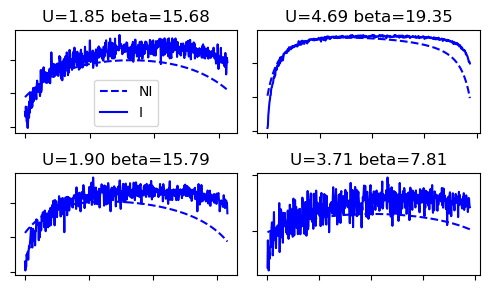

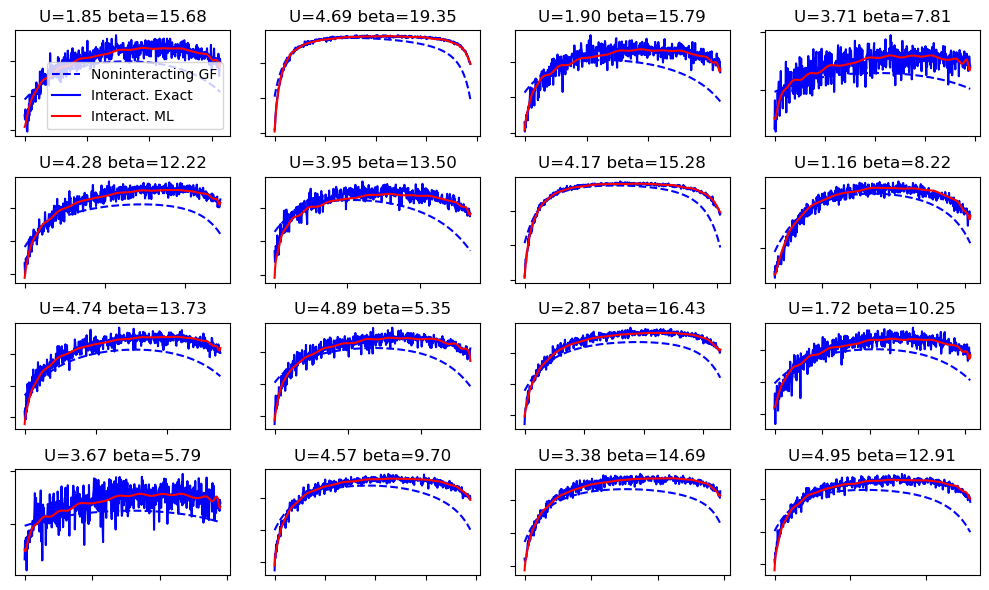

In [6]:
# DB_get.plot_exact_solutions(numV=2, numH=2, what='dens')
# DB.plot_exact_solutions(numV=2, numH=2, what='tau')
DB.plot_ML_solutions(numV=4, numH=4, what='tau')


# Results

In [7]:
filename ='../database_v5.h5'
DB = DataBase.db_DMFT.fromh5(filename)
DB.init_ML(model_path='../model_v1')

model loaded from ../model_v1


In [6]:
# DB.plot_exact_solutions(numV=3, numH=3, what='tau')

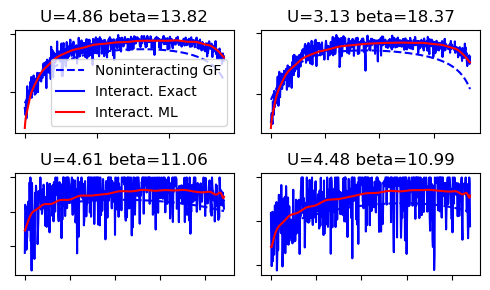

In [8]:
DB.plot_ML_solutions(numV=2, numH=2, what='tau')


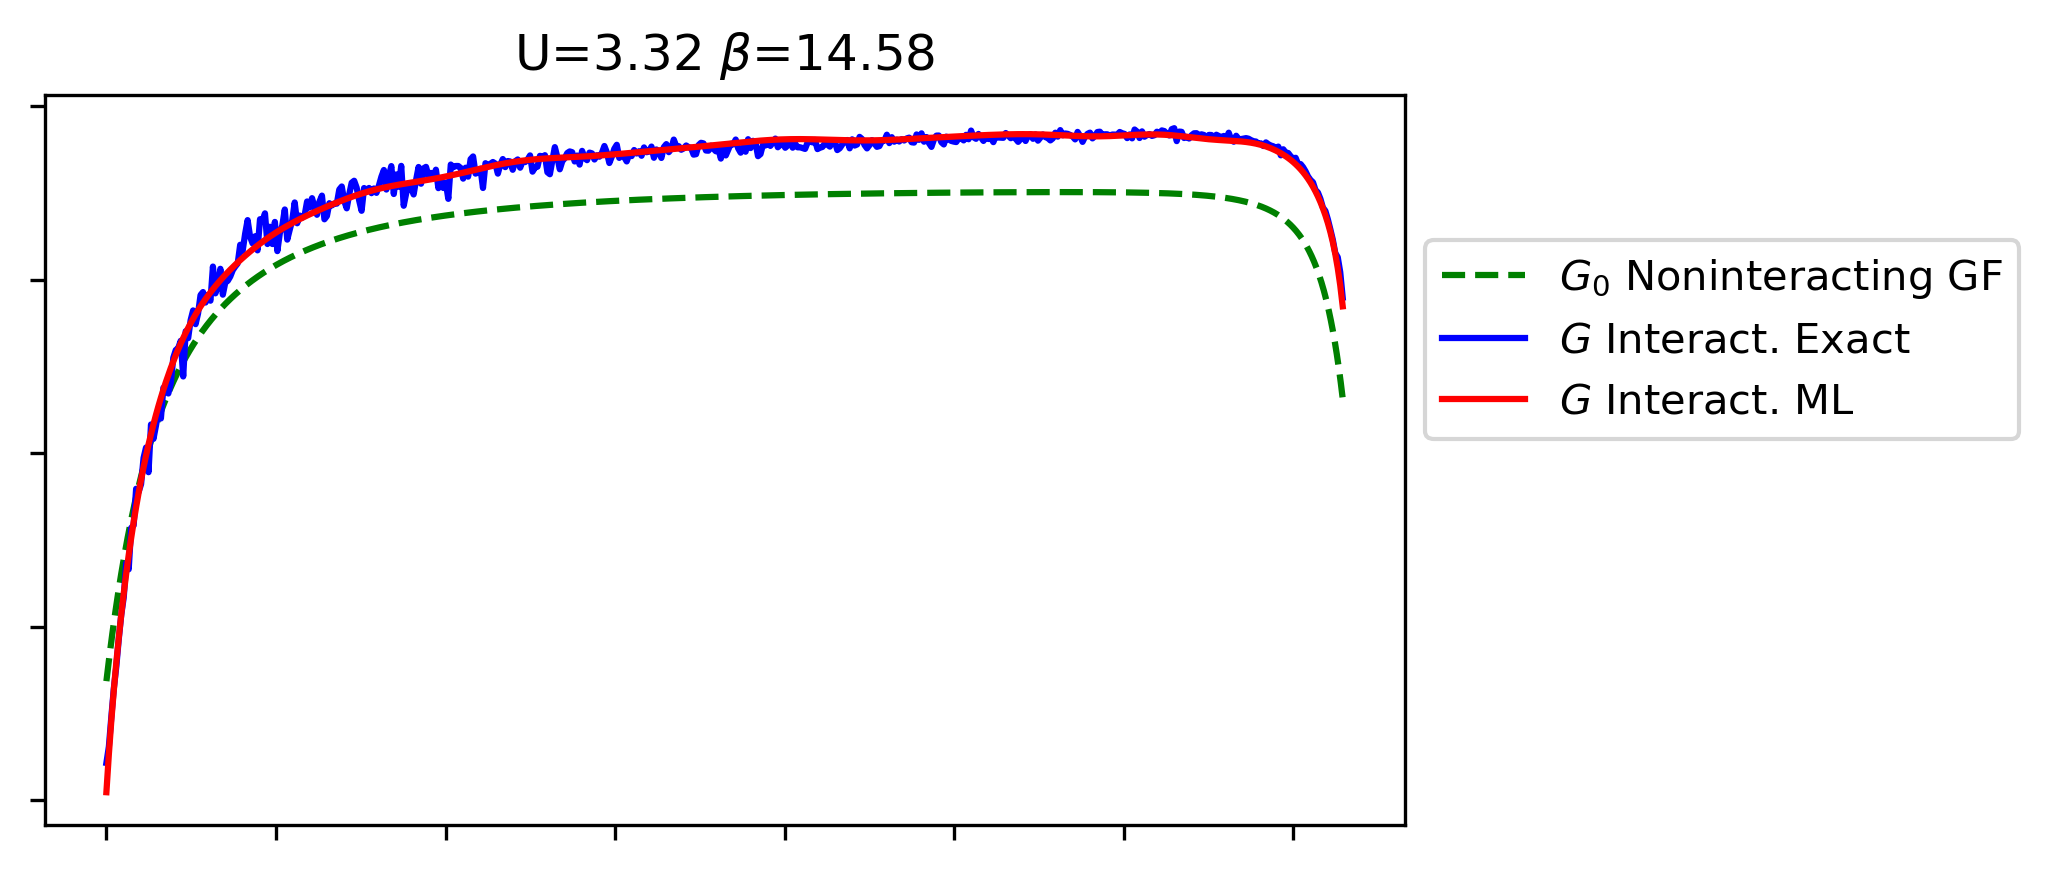

In [38]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sample = DB.data_entries[0]

gl = np.real(sample.G0_legendre.data).flatten()
beta = DB.params[0]['beta']
U = DB.params[0]['U']
features = np.hstack([U, beta, gl])
leg = DB.MLmodel(torch.Tensor(features)).cpu().detach().numpy()

meshQ = MeshLegendre(beta, 'Fermion', 30)
Gpredicted = Gf(mesh=meshQ, target_shape=[1,1])
Gpredicted.data[:] = leg[:, np.newaxis, np.newaxis]

tau_mesh = MeshImTime(beta=beta, statistic='Fermion', n_tau=500)
GtauML = Gf(mesh=tau_mesh, target_shape=[1,1])
GtauML.set_from_legendre(Gpredicted)

iw_mesh = MeshImFreq(beta=beta, S='Fermion', n_iw=sample.n_iw)
G_iw_ML = Gf(mesh=iw_mesh, target_shape=[1,1])
G_iw_ML.set_from_legendre(Gpredicted)
    
# axes[x, y].plot(self.data_entries[sample_num].taumesh, np.real(self.data_entries[sample_num].Gtau.data.flatten()),'-',color='g', label='I')
# ntau = len(self.data_entries[sample_num].Gtau.data.flatten())
ntau = 500
taumesh = np.linspace(0, sample.beta, ntau)
G_imp_rebinned = sample.Gtau.rebinning_tau(new_n_tau=ntau)

ax.plot(sample.taumesh, np.real(sample.G0tau.data.flatten()),
                '--',color='g', label=r'$G_0$ Noninteracting GF')
ax.plot(taumesh, np.real(G_imp_rebinned.data.flatten()),'-',color='b', label=r'$G$ Interact. Exact')
ax.plot(taumesh, np.real(GtauML.data.flatten()),'-',color='r', label=r'$G$ Interact. ML')
ax.set_title(rf'U={DB.params[0]['U']:.2f} $\beta$={DB.params[0]['beta']:.2f}')
# ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height ])

# Put a legend to the right of the current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
fig.tight_layout()
plt.show()

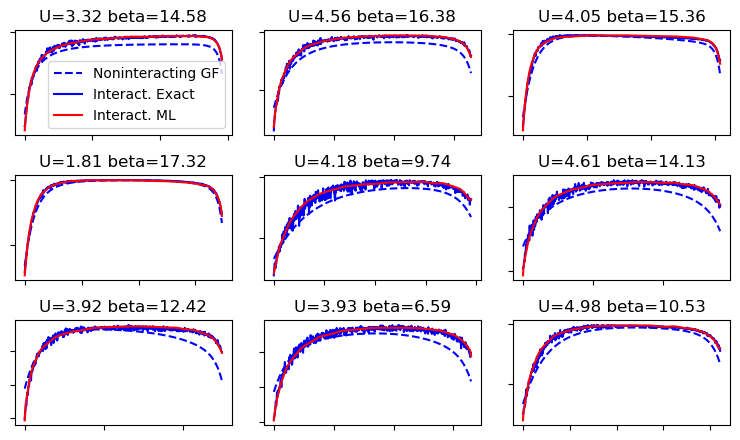

In [29]:
DB.plot_ML_solutions(numV=3, numH=3, what='tau')
